In [21]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [22]:
# read in LRG data

data_raLRG = np.load('/Users/mtownsend/Documents/LRG_Data/ra_LRG.npz')
raLRG = data_raLRG['ra_LRG']

data_decLRG = np.load('/Users/mtownsend/Documents/LRG_Data/dec_LRG.npz')
decLRG = data_decLRG['dec_LRG']

data_zLRG = np.load('/Users/mtownsend/Documents/LRG_Data/z_LRG.npz')
zLRG = data_zLRG['z_LRG']

data_gmagLRG = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_LRG.npz')
gmagLRG = data_gmagLRG['gmag_LRG']

data_rmagLRG = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_LRG.npz')
rmagLRG = data_rmagLRG['rmag_LRG']

data_zmagLRG = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_LRG.npz')
zmagLRG = data_zmagLRG['zmag_LRG']

data_grcolorLRG = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_LRG.npz')
grcolorLRG = data_grcolorLRG['grcolor_LRG']

data_rzcolorLRG = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_LRG.npz')
rzcolorLRG = data_rzcolorLRG['rzcolor_LRG']


# read in BKG data

data_raBKG = np.load('/Users/mtownsend/Documents/LRG_Data/ra_BKG.npz')
raBKG = data_raBKG['ra_BKG']

data_decBKG = np.load('/Users/mtownsend/Documents/LRG_Data/dec_BKG.npz')
decBKG = data_decBKG['dec_BKG']

data_gmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_BKG.npz')
gmagBKG = data_gmagBKG['gmag_BKG']

data_rmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_BKG.npz')
rmagBKG = data_rmagBKG['rmag_BKG']

data_zmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_BKG.npz')
zmagBKG = data_zmagBKG['zmag_BKG']

data_grcolorBKG = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_BKG.npz')
grcolorBKG = data_grcolorBKG['grcolor_BKG']

data_rzcolorBKG = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_BKG.npz')
rzcolorBKG = data_rzcolorBKG['rzcolor_BKG']


# read in combined LRG and BKG data

data_ra = np.load('/Users/mtownsend/Documents/LRG_Data/ra_total.npz')
ra_total = data_ra['ra']

data_dec = np.load('/Users/mtownsend/Documents/LRG_Data/dec_total.npz')
dec_total = data_dec['dec']

data_gmag = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_total.npz')
gmag_total = data_gmag['gmag']

data_rmag = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_total.npz')
rmag_total = data_rmag['rmag']

data_zmag = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_total.npz')
zmag_total = data_zmag['zmag']

data_grcolor = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_total.npz')
grcolor_total = data_grcolor['grcolor']

data_rzcolor = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_total.npz')
rzcolor_total = data_rzcolor['rzcolor']




In [4]:
# read in selection matrices for each luminosity selected sample 

data_smatrix03 = np.load('/Users/mtownsend/Desktop/lowz_smatrix-2matrices.npz')
smatrix03 = data_smatrix03['smatrix_low']
print(smatrix03.shape)

data_smatrix04 = np.load('/Users/mtownsend/Desktop/midz1_smatrix-4matrices.npz')
smatrix04 = data_smatrix04['smatrix_low']
print(smatrix04.shape)

data_smatrix05 = np.load('/Users/mtownsend/Desktop/midz2_smatrix-6matrices.npz')
smatrix05 = data_smatrix05['smatrix_low']
print(smatrix05.shape)

data_smatrix06 = np.load('/Users/mtownsend/Desktop/midz3_smatrix-8matrices.npz')
smatrix06 = data_smatrix06['smatrix_low']
print(smatrix06.shape)

data_smatrix65 = np.load('/Users/mtownsend/Desktop/highz_smatrix-9matrices.npz')
smatrix65 = data_smatrix65['smatrix_low']
print(smatrix65.shape)

(2, 49, 49, 49)
(4, 49, 49, 49)
(6, 49, 49, 49)
(8, 49, 49, 49)
(9, 49, 49, 49)


In [9]:
# read in null results (lowz)

data_Nsat25_low = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat25_low.npz')
low_null_Nsat_25 = data_Nsat25_low['Nsat25']
print(np.asarray(low_null_Nsat_25).shape)

data_Nsat03_low = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat03_low.npz')
low_null_Nsat_03 = data_Nsat03_low['Nsat03']
print(np.asarray(low_null_Nsat_03).shape)


# apply masks

low_masked_null25 = []

for i in range(len(low_null_Nsat_25)):
    low_masked_null25.append(low_null_Nsat_25[i] * smatrix03[0])
        
print(np.asarray(low_masked_null25).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/low_masked_null_25.npz', low_masked_null25=low_masked_null25)


low_masked_null03 = []

for i in range(len(low_null_Nsat_03)):
    low_masked_null03.append(low_null_Nsat_03[i] * smatrix03[1])
    
print(np.asarray(low_masked_null03).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/low_masked_null_03.npz', low_masked_null03=low_masked_null03)




(2522, 49, 49, 49)
(2478, 49, 49, 49)
(2522, 49, 49, 49)
(2478, 49, 49, 49)


In [10]:
# read in null results (mid1)

data_Nsat25_mid1 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat25_mid1.npz')
mid1_null_Nsat_25 = data_Nsat25_mid1['Nsat25']
print(np.asarray(mid1_null_Nsat_25).shape)

data_Nsat03_mid1 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat03_mid1.npz')
mid1_null_Nsat_03 = data_Nsat03_mid1['Nsat03']
print(np.asarray(mid1_null_Nsat_03).shape)

data_Nsat35_mid1 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat35_mid1.npz')
mid1_null_Nsat_35 = data_Nsat35_mid1['Nsat35']
print(np.asarray(mid1_null_Nsat_35).shape)

data_Nsat04_mid1 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat04_mid1.npz')
mid1_null_Nsat_04 = data_Nsat04_mid1['Nsat04']
print(np.asarray(mid1_null_Nsat_04).shape)

print('----')

# apply masks

mid1_masked_null25 = []

for i in range(len(mid1_null_Nsat_25)):
    mid1_masked_null25.append(mid1_null_Nsat_25[i] * smatrix04[0])
    
print(np.asarray(mid1_masked_null25).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid1_masked_null_25.npz', mid1_masked_null25=mid1_masked_null25)


mid1_masked_null03 = []

for i in range(len(mid1_null_Nsat_03)):
    mid1_masked_null03.append(mid1_null_Nsat_03[i] * smatrix04[1])
    
print(np.asarray(mid1_masked_null03).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid1_masked_null_03.npz', mid1_masked_null03=mid1_masked_null03)

mid1_masked_null35 = []

for i in range(len(mid1_null_Nsat_35)):
    mid1_masked_null35.append(mid1_null_Nsat_35[i] * smatrix04[2])
    
print(np.asarray(mid1_masked_null25).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid1_masked_null_35.npz', mid1_masked_null35=mid1_masked_null35)


mid1_masked_null04 = []

for i in range(len(mid1_null_Nsat_04)):
    mid1_masked_null04.append(mid1_null_Nsat_04[i] * smatrix04[3])
    
print(np.asarray(mid1_masked_null04).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid1_masked_null_04.npz', mid1_masked_null04=mid1_masked_null04)


(1268, 49, 49, 49)
(1265, 49, 49, 49)
(1207, 49, 49, 49)
(1260, 49, 49, 49)
----
(1268, 49, 49, 49)
(1265, 49, 49, 49)
(1268, 49, 49, 49)
(1260, 49, 49, 49)


In [12]:
# read in null results (mid2)

data_Nsat25_mid2 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat25_mid2.npz')
mid2_null_Nsat_25 = data_Nsat25_mid2['Nsat25']
print(np.asarray(mid2_null_Nsat_25).shape)

data_Nsat03_mid2 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat03_mid2.npz')
mid2_null_Nsat_03 = data_Nsat03_mid2['Nsat03']
print(np.asarray(mid2_null_Nsat_03).shape)

data_Nsat35_mid2 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat35_mid2.npz')
mid2_null_Nsat_35 = data_Nsat35_mid2['Nsat35']
print(np.asarray(mid2_null_Nsat_35).shape)

data_Nsat04_mid2 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat04_mid2.npz')
mid2_null_Nsat_04 = data_Nsat04_mid2['Nsat04']
print(np.asarray(mid2_null_Nsat_04).shape)

data_Nsat45_mid2 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat45_mid2.npz')
mid2_null_Nsat_45 = data_Nsat45_mid2['Nsat45']
print(np.asarray(mid2_null_Nsat_45).shape)

data_Nsat05_mid2 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat05_mid2.npz')
mid2_null_Nsat_05 = data_Nsat05_mid2['Nsat05']
print(np.asarray(mid2_null_Nsat_05).shape)

print('----')


# apply masks

mid2_masked_null25 = []

for i in range(len(mid2_null_Nsat_25)):
    mid2_masked_null25.append(mid2_null_Nsat_25[i] * smatrix05[0])
    
print(np.asarray(mid2_masked_null25).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid2_masked_null_25.npz', mid2_masked_null25=mid2_masked_null25)


mid2_masked_null03 = []

for i in range(len(mid2_null_Nsat_03)):
    mid2_masked_null03.append(mid2_null_Nsat_03[i] * smatrix05[1])
    
print(np.asarray(mid2_masked_null03).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid2_masked_null_03.npz', mid2_masked_null03=mid2_masked_null03)

mid2_masked_null35 = []

for i in range(len(mid2_null_Nsat_35)):
    mid2_masked_null35.append(mid2_null_Nsat_35[i] * smatrix05[2])
    
print(np.asarray(mid2_masked_null35).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid2_masked_null_35.npz', mid2_masked_null35=mid2_masked_null35)


mid2_masked_null04 = []

for i in range(len(mid2_null_Nsat_04)):
    mid2_masked_null04.append(mid2_null_Nsat_04[i] * smatrix05[3])
    
print(np.asarray(mid2_masked_null04).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid2_masked_null_04.npz', mid2_masked_null04=mid2_masked_null04)

mid2_masked_null45 = []

for i in range(len(mid2_null_Nsat_45)):
    mid2_masked_null45.append(mid2_null_Nsat_45[i] * smatrix05[4])
    
print(np.asarray(mid2_masked_null45).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid2_masked_null_45.npz', mid2_masked_null45=mid2_masked_null45)


mid2_masked_null05 = []

for i in range(len(mid2_null_Nsat_05)):
    mid2_masked_null05.append(mid2_null_Nsat_05[i] * smatrix05[5])
    
print(np.asarray(mid2_masked_null05).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid2_masked_null_05.npz', mid2_masked_null05=mid2_masked_null05)



(871, 49, 49, 49)
(847, 49, 49, 49)
(808, 49, 49, 49)
(876, 49, 49, 49)
(812, 49, 49, 49)
(786, 49, 49, 49)
----
(871, 49, 49, 49)
(847, 49, 49, 49)
(808, 49, 49, 49)
(876, 49, 49, 49)
(812, 49, 49, 49)
(786, 49, 49, 49)


In [14]:
# read in null results (mid3)

data_Nsat25_mid3 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat25_mid3.npz')
mid3_null_Nsat_25 = data_Nsat25_mid3['Nsat25']
print(np.asarray(mid3_null_Nsat_25).shape)

data_Nsat03_mid3 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat03_mid3.npz')
mid3_null_Nsat_03 = data_Nsat03_mid3['Nsat03']
print(np.asarray(mid3_null_Nsat_03).shape)

data_Nsat35_mid3 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat35_mid3.npz')
mid3_null_Nsat_35 = data_Nsat35_mid3['Nsat35']
print(np.asarray(mid3_null_Nsat_35).shape)

data_Nsat04_mid3 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat04_mid3.npz')
mid3_null_Nsat_04 = data_Nsat04_mid3['Nsat04']
print(np.asarray(mid3_null_Nsat_04).shape)

data_Nsat45_mid3 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat45_mid3.npz')
mid3_null_Nsat_45 = data_Nsat45_mid3['Nsat45']
print(np.asarray(mid3_null_Nsat_45).shape)

data_Nsat05_mid3 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat05_mid3.npz')
mid3_null_Nsat_05 = data_Nsat05_mid3['Nsat05']
print(np.asarray(mid3_null_Nsat_05).shape)

data_Nsat55_mid3 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat55_mid3.npz')
mid3_null_Nsat_55 = data_Nsat55_mid3['Nsat55']
print(np.asarray(mid3_null_Nsat_55).shape)

data_Nsat06_mid3 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat06_mid3.npz')
mid3_null_Nsat_06 = data_Nsat06_mid3['Nsat06']
print(np.asarray(mid3_null_Nsat_06).shape)

print('----')


# apply masks

mid3_masked_null25 = []

for i in range(len(mid3_null_Nsat_25)):
    mid3_masked_null25.append(mid3_null_Nsat_25[i] * smatrix06[0])
    
print(np.asarray(mid3_masked_null25).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid3_masked_null_25.npz', mid3_masked_null25=mid3_masked_null25)


mid3_masked_null03 = []

for i in range(len(mid3_null_Nsat_03)):
    mid3_masked_null03.append(mid3_null_Nsat_03[i] * smatrix06[1])
    
print(np.asarray(mid3_masked_null03).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid3_masked_null_03.npz', mid3_masked_null03=mid3_masked_null03)

mid3_masked_null35 = []

for i in range(len(mid3_null_Nsat_35)):
    mid3_masked_null35.append(mid3_null_Nsat_35[i] * smatrix06[2])
    
print(np.asarray(mid3_masked_null35).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid3_masked_null_35.npz', mid3_masked_null35=mid3_masked_null35)


mid3_masked_null04 = []

for i in range(len(mid3_null_Nsat_04)):
    mid3_masked_null04.append(mid3_null_Nsat_04[i] * smatrix06[3])
    
print(np.asarray(mid3_masked_null04).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid3_masked_null_04.npz', mid3_masked_null04=mid3_masked_null04)

mid3_masked_null45 = []

for i in range(len(mid3_null_Nsat_45)):
    mid3_masked_null45.append(mid3_null_Nsat_45[i] * smatrix06[4])
    
print(np.asarray(mid3_masked_null45).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid3_masked_null_45.npz', mid3_masked_null45=mid3_masked_null45)


mid3_masked_null05 = []

for i in range(len(mid3_null_Nsat_05)):
    mid3_masked_null05.append(mid3_null_Nsat_05[i] * smatrix06[5])
    
print(np.asarray(mid3_masked_null05).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid3_masked_null_05.npz', mid3_masked_null05=mid3_masked_null05)

mid3_masked_null55 = []

for i in range(len(mid3_null_Nsat_55)):
    mid3_masked_null55.append(mid3_null_Nsat_55[i] * smatrix06[6])
    
print(np.asarray(mid3_masked_null55).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid3_masked_null_55.npz', mid3_masked_null55=mid3_masked_null55)


mid3_masked_null06 = []

for i in range(len(mid3_null_Nsat_06)):
    mid3_masked_null06.append(mid3_null_Nsat_06[i] * smatrix06[7])
    
print(np.asarray(mid3_masked_null06).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/mid3_masked_null_06.npz', mid3_masked_null06=mid3_masked_null06)




(618, 49, 49, 49)
(584, 49, 49, 49)
(648, 49, 49, 49)
(626, 49, 49, 49)
(603, 49, 49, 49)
(616, 49, 49, 49)
(649, 49, 49, 49)
(656, 49, 49, 49)
----
(618, 49, 49, 49)
(584, 49, 49, 49)
(648, 49, 49, 49)
(626, 49, 49, 49)
(603, 49, 49, 49)
(616, 49, 49, 49)
(649, 49, 49, 49)
(656, 49, 49, 49)


In [15]:
# read in null results (highz)

data_Nsat25_high = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat25_high.npz')
high_null_Nsat_25 = data_Nsat25_high['Nsat25']
print(np.asarray(high_null_Nsat_25).shape)

data_Nsat03_high = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat03_high.npz')
high_null_Nsat_03 = data_Nsat03_high['Nsat03']
print(np.asarray(high_null_Nsat_03).shape)

data_Nsat35_high = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat35_high.npz')
high_null_Nsat_35 = data_Nsat35_high['Nsat35']
print(np.asarray(high_null_Nsat_35).shape)

data_Nsat04_high = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat04_high.npz')
high_null_Nsat_04 = data_Nsat04_high['Nsat04']
print(np.asarray(high_null_Nsat_04).shape)

data_Nsat45_high = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat45_high.npz')
high_null_Nsat_45 = data_Nsat45_high['Nsat45']
print(np.asarray(high_null_Nsat_45).shape)

data_Nsat05_high = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat05_high.npz')
high_null_Nsat_05 = data_Nsat05_high['Nsat05']
print(np.asarray(high_null_Nsat_05).shape)

data_Nsat55_high = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat55_high.npz')
high_null_Nsat_55 = data_Nsat55_high['Nsat55']
print(np.asarray(high_null_Nsat_55).shape)

data_Nsat06_high = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat06_high.npz')
high_null_Nsat_06 = data_Nsat06_high['Nsat06']
print(np.asarray(high_null_Nsat_06).shape)

data_Nsat65_high = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat65_high.npz')
high_null_Nsat_65 = data_Nsat65_high['Nsat65']
print(np.asarray(high_null_Nsat_65).shape)

print('----')


# apply masks

high_masked_null25 = []

for i in range(len(high_null_Nsat_25)):
    high_masked_null25.append(high_null_Nsat_25[i] * smatrix65[0])
    
print(np.asarray(high_masked_null25).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/high_masked_null_25.npz', high_masked_null25=high_masked_null25)


high_masked_null03 = []

for i in range(len(high_null_Nsat_03)):
    high_masked_null03.append(high_null_Nsat_03[i] * smatrix65[1])
    
print(np.asarray(high_masked_null03).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/high_masked_null_03.npz', high_masked_null03=high_masked_null03)

high_masked_null35 = []

for i in range(len(high_null_Nsat_35)):
    high_masked_null35.append(high_null_Nsat_35[i] * smatrix65[2])
    
print(np.asarray(high_masked_null35).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/high_masked_null_35.npz', high_masked_null35=high_masked_null35)


high_masked_null04 = []

for i in range(len(high_null_Nsat_04)):
    high_masked_null04.append(high_null_Nsat_04[i] * smatrix65[3])
    
print(np.asarray(high_masked_null04).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/high_masked_null_04.npz', high_masked_null04=high_masked_null04)

high_masked_null45 = []

for i in range(len(high_null_Nsat_45)):
    high_masked_null45.append(high_null_Nsat_45[i] * smatrix65[4])
    
print(np.asarray(high_masked_null45).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/high_masked_null_45.npz', high_masked_null45=high_masked_null45)


high_masked_null05 = []

for i in range(len(high_null_Nsat_05)):
    high_masked_null05.append(high_null_Nsat_05[i] * smatrix65[5])
    
print(np.asarray(high_masked_null05).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/high_masked_null_05.npz', high_masked_null05=high_masked_null05)

high_masked_null55 = []

for i in range(len(high_null_Nsat_55)):
    high_masked_null55.append(high_null_Nsat_55[i] * smatrix65[6])
    
print(np.asarray(high_masked_null55).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/high_masked_null_55.npz', high_masked_null55=high_masked_null55)


high_masked_null06 = []

for i in range(len(high_null_Nsat_06)):
    high_masked_null06.append(high_null_Nsat_06[i] * smatrix65[7])
    
print(np.asarray(high_masked_null06).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/high_masked_null_06.npz', high_masked_null06=high_masked_null06)


high_masked_null65 = []

for i in range(len(high_null_Nsat_65)):
    high_masked_null65.append(high_null_Nsat_65[i] * smatrix65[8])
    
print(np.asarray(high_masked_null65).shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/high_masked_null_65.npz', high_masked_null65=high_masked_null65)





(630, 49, 49, 49)
(523, 49, 49, 49)
(552, 49, 49, 49)
(557, 49, 49, 49)
(527, 49, 49, 49)
(564, 49, 49, 49)
(539, 49, 49, 49)
(562, 49, 49, 49)
(546, 49, 49, 49)
----
(630, 49, 49, 49)
(523, 49, 49, 49)
(552, 49, 49, 49)
(557, 49, 49, 49)
(527, 49, 49, 49)
(564, 49, 49, 49)
(539, 49, 49, 49)
(562, 49, 49, 49)
(546, 49, 49, 49)


In [16]:
# # read in selection matrices for each luminosity selected sample 

# data_smatrix03 = np.load('/Users/mtownsend/Desktop/lowz_smatrix-2matrices.npz')
# smatrix03 = data_smatrix03['smatrix_low']
# print(smatrix03.shape)

# data_smatrix04 = np.load('/Users/mtownsend/Desktop/midz1_smatrix-4matrices.npz')
# smatrix04 = data_smatrix04['smatrix_low']
# print(smatrix04.shape)

# data_smatrix05 = np.load('/Users/mtownsend/Desktop/midz2_smatrix-6matrices.npz')
# smatrix05 = data_smatrix05['smatrix_low']
# print(smatrix05.shape)

# data_smatrix06 = np.load('/Users/mtownsend/Desktop/midz3_smatrix-8matrices.npz')
# smatrix06 = data_smatrix06['smatrix_low']
# print(smatrix06.shape)

# data_smatrix65 = np.load('/Users/mtownsend/Desktop/highz_smatrix-9matrices.npz')
# smatrix65 = data_smatrix65['smatrix_low']
# print(smatrix65.shape)


In [54]:
# color-color-magnitude bins

rz_edges = np.array([-1.8027077, -1.5527076721191406, -1.3027076721191406, -1.0527076721191406, -0.8027076721191406, -0.5527076721191406, -0.3027076721191406, -0.052707672119140625, 0.19729232788085938, 0.4472923278808594, 0.6972923278808594, 0.9472923278808594, 1.1972923278808594, 1.4472923278808594, 1.6972923278808594, 1.9472923278808594, 2.1972923278808594, 2.4472923278808594, 2.6972923278808594, 2.9472923278808594, 3.1972923278808594, 3.4472923278808594, 3.6972923278808594, 3.9472923278808594, 4.197292327880859, 4.447292327880859, 4.697292327880859, 4.947292327880859, 5.197292327880859, 5.447292327880859, 5.697292327880859, 5.947292327880859, 6.197292327880859, 6.447292327880859, 6.697292327880859, 6.947292327880859, 7.197292327880859, 7.447292327880859, 7.697292327880859, 7.947292327880859, 8.19729232788086, 8.44729232788086, 8.69729232788086, 8.94729232788086, 9.19729232788086, 9.44729232788086, 9.69729232788086, 9.94729232788086, 10.19729232788086, 10.44729232788086])
gr_edges = np.array([-6.5846786, -6.234678649902344, -5.8846786499023445, -5.534678649902345, -5.184678649902345, -4.8346786499023455, -4.484678649902346, -4.134678649902346, -3.784678649902346, -3.434678649902346, -3.084678649902346, -2.734678649902346, -2.384678649902346, -2.0346786499023457, -1.6846786499023456, -1.3346786499023455, -0.9846786499023455, -0.6346786499023456, -0.2846786499023456, 0.06532135009765438, 0.41532135009765436, 0.7653213500976543, 1.1153213500976542, 1.4653213500976543, 1.8153213500976544, 2.1653213500976545, 2.5153213500976546, 2.8653213500976547, 3.2153213500976547, 3.565321350097655, 3.915321350097655, 4.265321350097655, 4.615321350097655, 4.965321350097654, 5.315321350097654, 5.665321350097654, 6.015321350097653, 6.365321350097653, 6.7153213500976525, 7.065321350097652, 7.415321350097652, 7.7653213500976515, 8.115321350097652, 8.465321350097652, 8.815321350097651, 9.165321350097651, 9.51532135009765, 9.86532135009765, 10.21532135009765, 10.56532135009765])

zmaginit = 13.
zmagfin = 23.
interval = 0.2
zmag_num = (zmagfin-zmaginit)/interval
zmag_edges, step = np.linspace(zmaginit, zmagfin, num=int(zmag_num), retstep=True)
print(type(zmag_edges))

print(rz_edges)
print(gr_edges)
print(zmag_edges)


<class 'numpy.ndarray'>
[-1.8027077  -1.55270767 -1.30270767 -1.05270767 -0.80270767 -0.55270767
 -0.30270767 -0.05270767  0.19729233  0.44729233  0.69729233  0.94729233
  1.19729233  1.44729233  1.69729233  1.94729233  2.19729233  2.44729233
  2.69729233  2.94729233  3.19729233  3.44729233  3.69729233  3.94729233
  4.19729233  4.44729233  4.69729233  4.94729233  5.19729233  5.44729233
  5.69729233  5.94729233  6.19729233  6.44729233  6.69729233  6.94729233
  7.19729233  7.44729233  7.69729233  7.94729233  8.19729233  8.44729233
  8.69729233  8.94729233  9.19729233  9.44729233  9.69729233  9.94729233
 10.19729233 10.44729233]
[-6.5846786  -6.23467865 -5.88467865 -5.53467865 -5.18467865 -4.83467865
 -4.48467865 -4.13467865 -3.78467865 -3.43467865 -3.08467865 -2.73467865
 -2.38467865 -2.03467865 -1.68467865 -1.33467865 -0.98467865 -0.63467865
 -0.28467865  0.06532135  0.41532135  0.76532135  1.11532135  1.46532135
  1.81532135  2.16532135  2.51532135  2.86532135  3.21532135  3.56532135
 

In [24]:
# create redshift bins

zinit = 0.2
zfin = 0.65
interval = 0.05
# num = (zfin-zinit)/interval
num = 10. 
zrange, step = np.linspace(zinit, zfin, num=int(num), retstep=True)

In [19]:
# # models to test

# gauss1 = np.random.normal(loc=1., scale=1., size=1)
# print(int(gauss1))

# gauss2 = np.random.normal(loc=2., scale=1., size=1)
# print(int(gauss2))

# gauss3 = np.random.normal(loc=3., scale=1., size=1)
# print(int(gauss3))

# gauss4 = np.random.normal(loc=4., scale=1., size=1)
# print(int(gauss4))

# gauss5 = np.random.normal(loc=5., scale=1., size=1)
# print(int(gauss5))

# gauss6 = np.random.normal(loc=6., scale=1., size=1)
# print(int(gauss6))

# gauss7 = np.random.normal(loc=7., scale=1., size=1)
# print(int(gauss7))

# gauss8 = np.random.normal(loc=8., scale=1., size=1)
# print(int(gauss8))


In [7]:
# create a list of indices that matches ra_BKG

index_array = np.arange(len(raBKG))
print(len(index_array))
print(type(index_array))
# print(type(index_array[0]))

# randomly choose N number of indices (N being the number chosen by the number drawn from a gaussian distribution)

# import random

rand1 = np.random.choice(index_array, size=int(gauss1))
rand2 = np.random.choice(index_array, size=int(gauss2))
rand3 = np.random.choice(index_array, size=int(gauss3))
rand4 = np.random.choice(index_array, size=int(gauss4))
rand5 = np.random.choice(index_array, size=int(gauss5))
rand6 = np.random.choice(index_array, size=int(gauss6))
rand7 = np.random.choice(index_array, size=int(gauss7))
rand8 = np.random.choice(index_array, size=int(gauss8))

print(rand1)
print('----')
print(rand2)
print('----')
print(rand3)
print('----')
print(rand4)
print('----')
print(rand5)
print('----')
print(rand6)
print('----')
print(rand7)
print('----')
print(rand8)
print('----')


# find the colors and zmag for this source

gr_rand1 = grcolorBKG[rand1]
gr_rand2 = grcolorBKG[rand2]
gr_rand3 = grcolorBKG[rand3]
gr_rand4 = grcolorBKG[rand4]
gr_rand5 = grcolorBKG[rand5]
gr_rand6 = grcolorBKG[rand6]
gr_rand7 = grcolorBKG[rand7]
gr_rand8 = grcolorBKG[rand8]

rz_rand1 = rzcolorBKG[rand1]
rz_rand2 = rzcolorBKG[rand2]
rz_rand3 = rzcolorBKG[rand3]
rz_rand4 = rzcolorBKG[rand4]
rz_rand5 = rzcolorBKG[rand5]
rz_rand6 = rzcolorBKG[rand6]
rz_rand7 = rzcolorBKG[rand7]
rz_rand8 = rzcolorBKG[rand8]

zmag_rand1 = zmagBKG[rand1]
zmag_rand2 = zmagBKG[rand2]
zmag_rand3 = zmagBKG[rand3]
zmag_rand4 = zmagBKG[rand4]
zmag_rand5 = zmagBKG[rand5]
zmag_rand6 = zmagBKG[rand6]
zmag_rand7 = zmagBKG[rand7]
zmag_rand8 = zmagBKG[rand8]

# print(gr_rand1)
# print('----')
# print(gr_rand2)
# print('----')
# print(gr_rand3)
# print('----')
# print(gr_rand4)
# print('----')
# print(gr_rand5)
# print('----')
# print(gr_rand6)
# print('----')
# print(gr_rand7)
# print('----')
# print(gr_rand8)



517525
<class 'numpy.ndarray'>
[105071 508344 502400]
----
[77904]
----
[368730 468210  68484 127302]
----
[ 43752 336574 279940  34320]
----
[141273 424016 189702 135981 296165]
----
[164206  10373 464875 321740   5049]
----
[420405 295239 393333 320430 216053 365197 147175]
----
[388107  26533 494381 194602 172600 163022 405098]
----


In [59]:
# rand1 = np.array([105071, 508344, 502400])
# rand2 = np.array([77904])
# rand3 = np.array([368730, 468210,  68484, 127302])
# rand4 = np.array([43752, 336574, 279940,  34320])
# rand5 = np.array([141273, 424016, 189702, 135981, 296165])
# rand6 = np.array([164206,  10373, 464875, 321740,   5049])
# rand7 = np.array([420405, 295239, 393333, 320430, 216053, 365197, 147175])
# rand8 = np.array([388107,  26533, 494381, 194602, 172600, 163022, 405098])

# gr_rand1 = grcolorBKG[rand1]
# gr_rand2 = grcolorBKG[rand2]
# gr_rand3 = grcolorBKG[rand3]
# gr_rand4 = grcolorBKG[rand4]
# gr_rand5 = grcolorBKG[rand5]
# gr_rand6 = grcolorBKG[rand6]
# gr_rand7 = grcolorBKG[rand7]
# gr_rand8 = grcolorBKG[rand8]

# rz_rand1 = rzcolorBKG[rand1]
# rz_rand2 = rzcolorBKG[rand2]
# rz_rand3 = rzcolorBKG[rand3]
# rz_rand4 = rzcolorBKG[rand4]
# rz_rand5 = rzcolorBKG[rand5]
# rz_rand6 = rzcolorBKG[rand6]
# rz_rand7 = rzcolorBKG[rand7]
# rz_rand8 = rzcolorBKG[rand8]

# zmag_rand1 = zmagBKG[rand1]
# zmag_rand2 = zmagBKG[rand2]
# zmag_rand3 = zmagBKG[rand3]
# zmag_rand4 = zmagBKG[rand4]
# zmag_rand5 = zmagBKG[rand5]
# zmag_rand6 = zmagBKG[rand6]
# zmag_rand7 = zmagBKG[rand7]
# zmag_rand8 = zmagBKG[rand8]

# np.savez('/Users/mtownsend/Documents/LRG_Data/random_rzcolor.npz', rz_rand1=rz_rand1, rz_rand2=rz_rand2, rz_rand3=rz_rand3, rz_rand4=rz_rand4, rz_rand5=rz_rand5, rz_rand6=rz_rand6, rz_rand7=rz_rand7, rz_rand8=rz_rand8)
# np.savez('/Users/mtownsend/Documents/LRG_Data/random_grcolor.npz', gr_rand1=gr_rand1, gr_rand2=gr_rand2, gr_rand3=gr_rand3, gr_rand4=gr_rand4, gr_rand5=gr_rand5, gr_rand6=gr_rand6, gr_rand7=gr_rand7, gr_rand8=gr_rand8)
# np.savez('/Users/mtownsend/Documents/LRG_Data/random_zmag.npz', zmag_rand1=zmag_rand1, zmag_rand2=zmag_rand2, zmag_rand3=zmag_rand3, zmag_rand4=zmag_rand4, zmag_rand5=zmag_rand5, zmag_rand6=zmag_rand6, zmag_rand7=zmag_rand7, zmag_rand8=zmag_rand8)

rz = np.load('/Users/mtownsend/Documents/LRG_Data/random_rzcolor.npz')
gr = np.load('/Users/mtownsend/Documents/LRG_Data/random_grcolor.npz')
zmag = np.load('/Users/mtownsend/Documents/LRG_Data/random_zmag.npz')

rz_rand1 = rz['rz_rand1']
rz_rand2 = rz['rz_rand2']
rz_rand3 = rz['rz_rand3']
rz_rand4 = rz['rz_rand4']
rz_rand5 = rz['rz_rand5']
rz_rand6 = rz['rz_rand6']
rz_rand7 = rz['rz_rand7']
rz_rand8 = rz['rz_rand8']
print(rz_rand1)
# print(rz_rand2)
# print(rz_rand3)
# print(rz_rand4)
# print(rz_rand5)
# print(rz_rand6)
# print(rz_rand7)
# print(rz_rand8)
print('----')

gr_rand1 = gr['gr_rand1']
gr_rand2 = gr['gr_rand2']
gr_rand3 = gr['gr_rand3']
gr_rand4 = gr['gr_rand4']
gr_rand5 = gr['gr_rand5']
gr_rand6 = gr['gr_rand6']
gr_rand7 = gr['gr_rand7']
gr_rand8 = gr['gr_rand8']
print(gr_rand1)
# print(gr_rand2)
# print(gr_rand3)
# print(gr_rand4)
# print(gr_rand5)
# print(gr_rand6)
# print(gr_rand7)
# print(gr_rand8)
print('----')

zmag_rand1 = zmag['zmag_rand1']
zmag_rand2 = zmag['zmag_rand2']
zmag_rand3 = zmag['zmag_rand3']
zmag_rand4 = zmag['zmag_rand4']
zmag_rand5 = zmag['zmag_rand5']
zmag_rand6 = zmag['zmag_rand6']
zmag_rand7 = zmag['zmag_rand7']
zmag_rand8 = zmag['zmag_rand8']
print(zmag_rand1)
# print(zmag_rand2)
# print(zmag_rand3)
# print(zmag_rand4)
# print(zmag_rand5)
# print(zmag_rand6)
# print(zmag_rand7)
# print(zmag_rand8)
print('----')
print()
print(rz_edges)
print('----')
print(gr_edges)
print('----')
print(zmag_edges)

import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

arr, idx = find_nearest(rz_edges, rz_rand1[1])
print(arr)
print(idx)

[1.4870415 0.4955387 1.0760574]
----
[0.626112   0.64928055 1.887249  ]
----
[22.244818 16.606707 21.038818]
----

[-1.8027077  -1.55270767 -1.30270767 -1.05270767 -0.80270767 -0.55270767
 -0.30270767 -0.05270767  0.19729233  0.44729233  0.69729233  0.94729233
  1.19729233  1.44729233  1.69729233  1.94729233  2.19729233  2.44729233
  2.69729233  2.94729233  3.19729233  3.44729233  3.69729233  3.94729233
  4.19729233  4.44729233  4.69729233  4.94729233  5.19729233  5.44729233
  5.69729233  5.94729233  6.19729233  6.44729233  6.69729233  6.94729233
  7.19729233  7.44729233  7.69729233  7.94729233  8.19729233  8.44729233
  8.69729233  8.94729233  9.19729233  9.44729233  9.69729233  9.94729233
 10.19729233 10.44729233]
----
[-6.5846786  -6.23467865 -5.88467865 -5.53467865 -5.18467865 -4.83467865
 -4.48467865 -4.13467865 -3.78467865 -3.43467865 -3.08467865 -2.73467865
 -2.38467865 -2.03467865 -1.68467865 -1.33467865 -0.98467865 -0.63467865
 -0.28467865  0.06532135  0.41532135  0.76532135  1

In [26]:
# using colors and zmag, place into null result
# median_zmag.py is similar to what I need for this, but needs to be modified to handle three dimensions

def loop_through_3D_array(arr, xedges, yedges, zedges, rz_rand, gr_rand, zmag_rand):
    # xedges = rz_edges
    # yedges = gr_edges
    # zedges = zmag_edges
    # arr = array to be changed
    # rz_rand, gr_rand, zmag_rand = rz color, gr color, zmag
    

    for i in range(len(rz_edges)-1):
        for j in range(len(gr_edges)-1):
            for k in range(len(zmag_edges)-1):
                for m in range(len(rz_rand)):
                    if ((rz_rand[m] >= rz_edges[i]) & (rz_rand[m] <= rz_edges[i + 1]) & (gr_rand[m] >= gr_edges[j]) & (gr_rand[m] <= gr_edges[j + 1]) & (zmag_rand[m] >= zmag_edges[k]) & (zmag_rand[m] <= zmag_edges[k + 1])):
                        arr[i][j][k] = arr[i][j][k] + 1
                        
    return arr

# for i in range(len(rz_edges)-1):
#     for j in range(len(gr_edges)-1):
#         for k in range(len(zmag_edges)-1):
#             for m in range(len(rz_rand)):
#                 if ((rz_rand[m] >= rz_edges[i]) & (rz_rand[m] <= rz_edges[i + 1]) & (gr_rand[m] >= gr_edges[j]) & (gr_rand[m] <= gr_edges[j + 1]) & (zmag_rand[m] >= zmag_edges[k]) & (zmag_rand[m] <= zmag_edges[k + 1])):
#                     arr[i][j][k] = arr[i][j][k] + 1


# Analysis for lowz bins

(2522, 49, 49, 49)
mean number of satellites is 0.13961287588678517
median number of satellites is -0.06830816472332521
standard deviation of satellites is 1.22615820106839
standard error is 0.024420811106352185


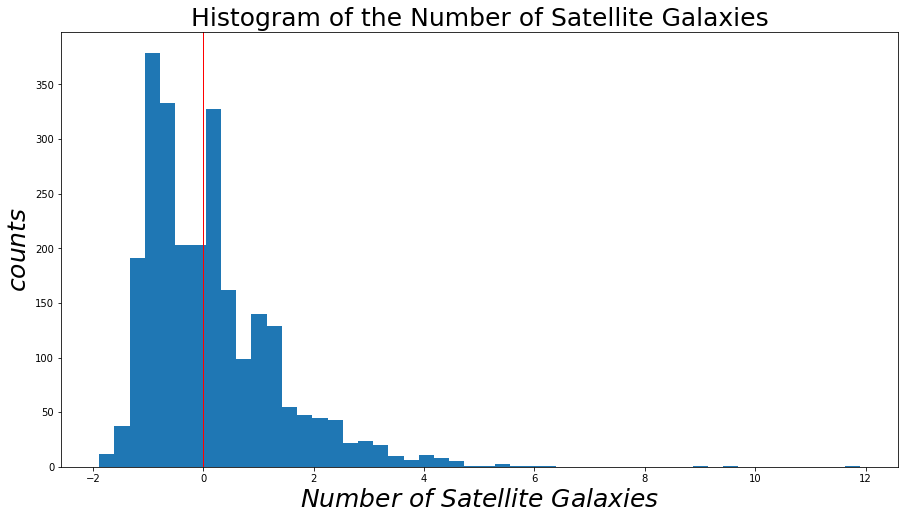

mean number of satellites is 2.139612875886785
median number of satellites is 1.9316918352766748
standard deviation of satellites is 1.22615820106839
standard error is 0.024420811106352185


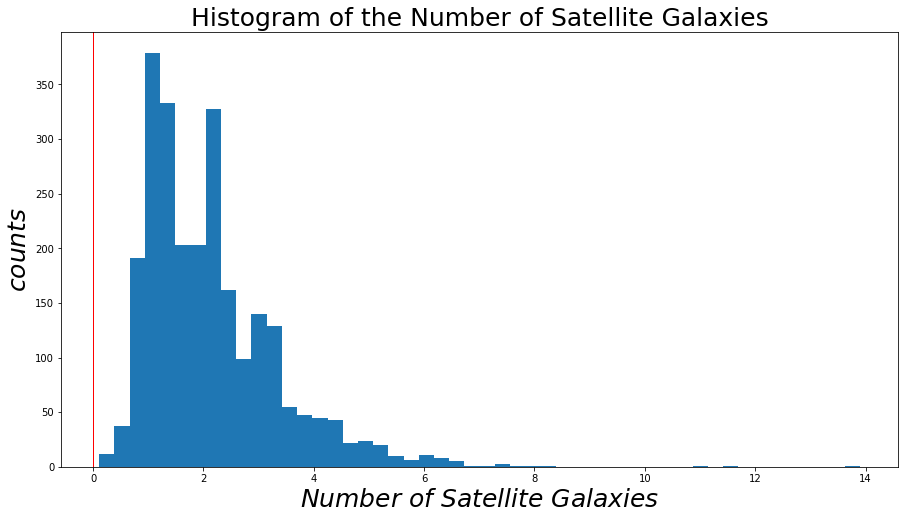

mean number of satellites is 3.139612875886785
median number of satellites is 2.9316918352766748
standard deviation of satellites is 1.22615820106839
standard error is 0.024420811106352185


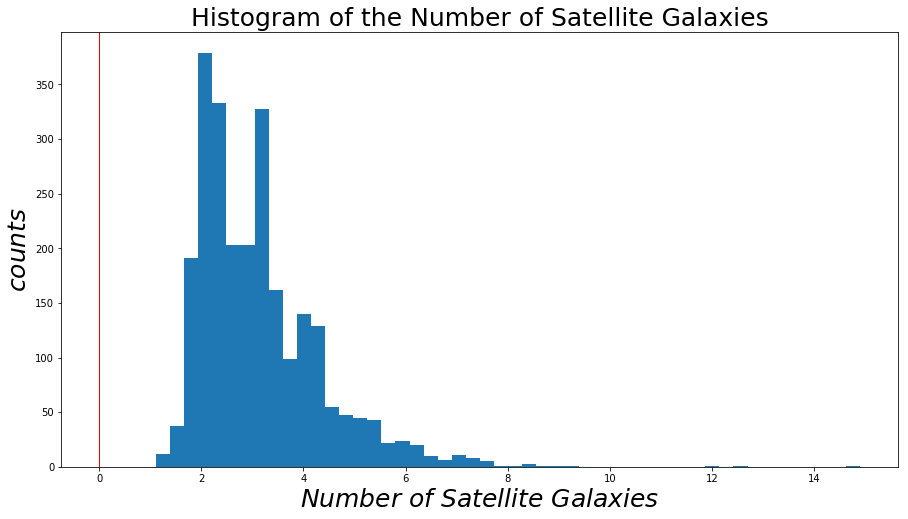

mean number of satellites is 5.139612875886785
median number of satellites is 4.931691835276675
standard deviation of satellites is 1.22615820106839
standard error is 0.024420811106352185


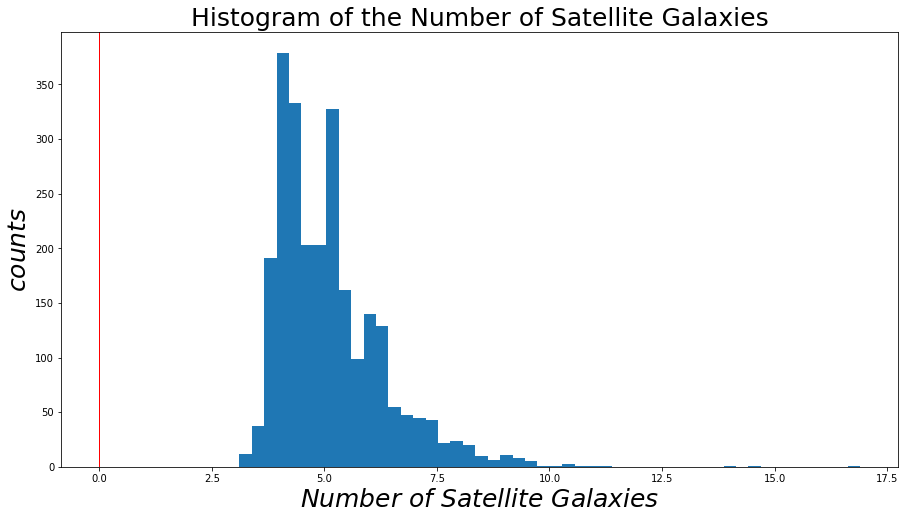

mean number of satellites is 9.139612875886785
median number of satellites is 8.931691835276673
standard deviation of satellites is 1.22615820106839
standard error is 0.024420811106352185


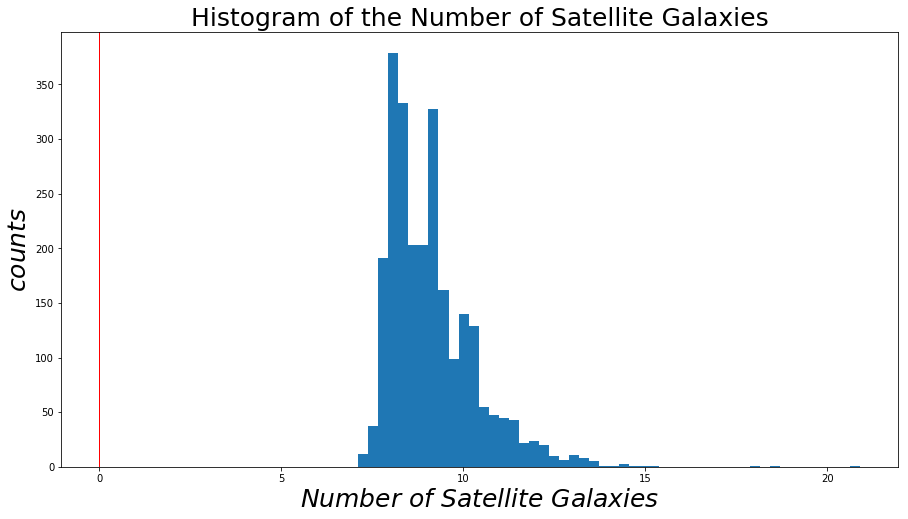

mean number of satellites is 12.139612875886785
median number of satellites is 11.931691835276673
standard deviation of satellites is 1.22615820106839
standard error is 0.024420811106352185


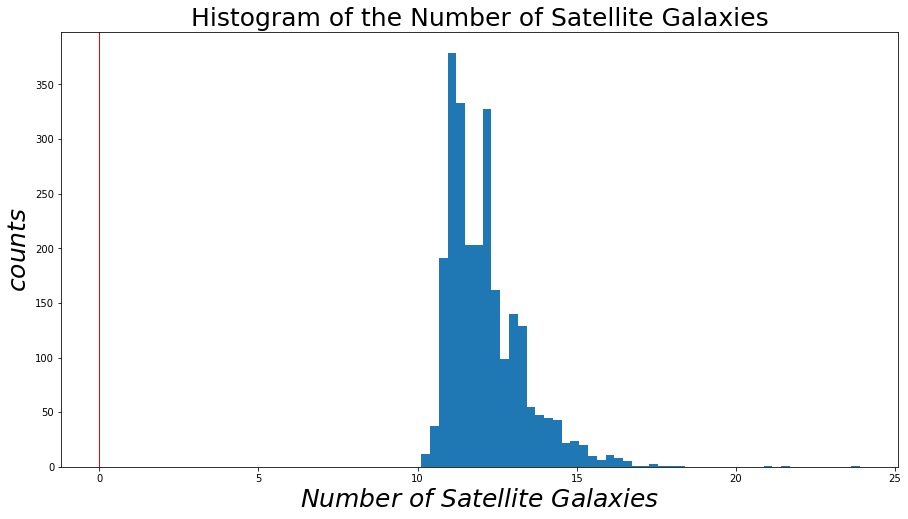

mean number of satellites is 15.139612875886785
median number of satellites is 14.931691835276673
standard deviation of satellites is 1.22615820106839
standard error is 0.024420811106352185


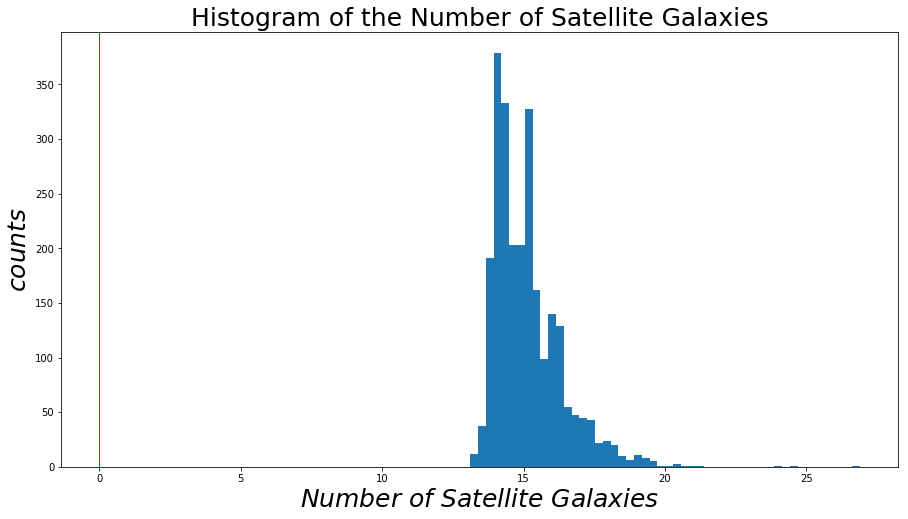

mean number of satellites is 20.139612875886787
median number of satellites is 19.931691835276673
standard deviation of satellites is 1.22615820106839
standard error is 0.024420811106352185


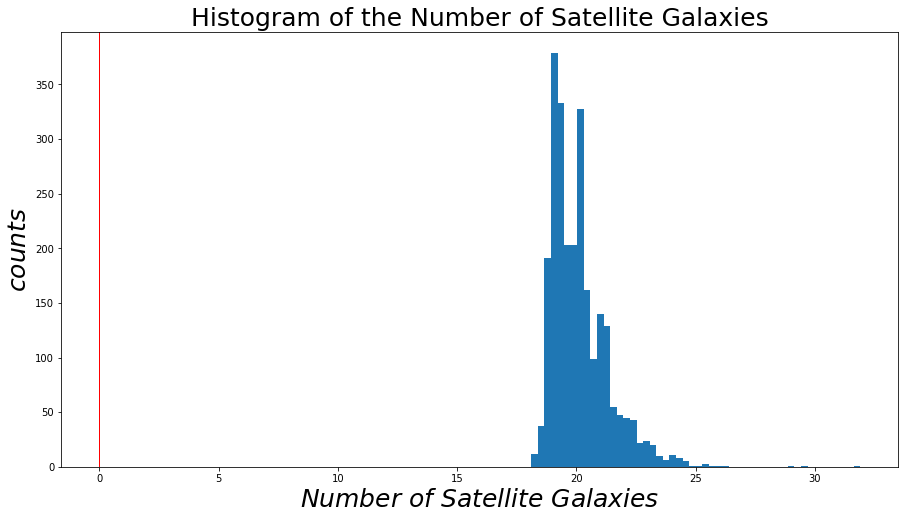

mean number of satellites is 26.139612875886787
median number of satellites is 25.931691835276673
standard deviation of satellites is 1.22615820106839
standard error is 0.024420811106352185


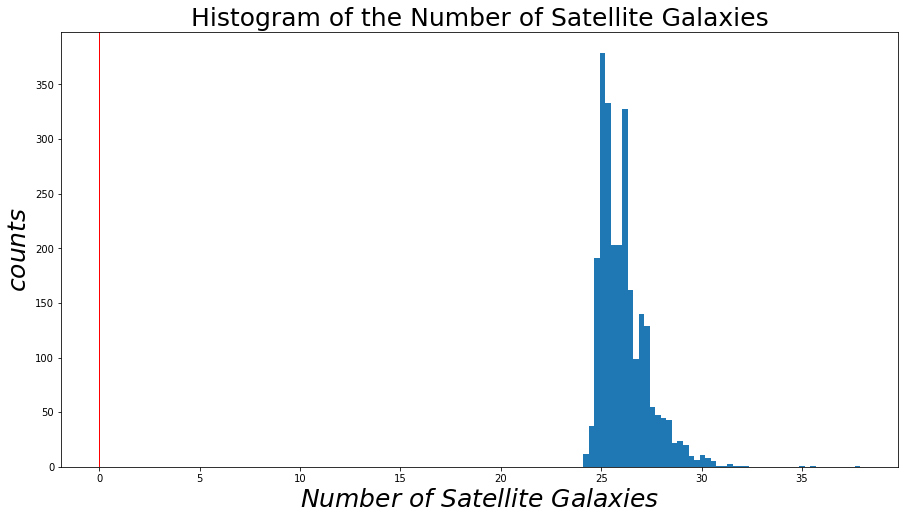

(2522, 49, 49, 49)
(2522, 49, 49, 49)
(2522, 49, 49, 49)
(2522, 49, 49, 49)
(2522, 49, 49, 49)
(2522, 49, 49, 49)
(2522, 49, 49, 49)
(2522, 49, 49, 49)
----
(2522, 49, 49, 49)
----
(2522, 49, 49, 49)
(2522, 49, 49, 49)
(2522, 49, 49, 49)
(2522, 49, 49, 49)
(2522, 49, 49, 49)
(2522, 49, 49, 49)
(2522, 49, 49, 49)
(2522, 49, 49, 49)
done


In [53]:
# lowz, Nsat25

low_masked_null25 = np.load('/Users/mtownsend/Documents/LRG_Data/low_masked_null_25.npz')
low_masked_null25 = low_masked_null25['low_masked_null25']
print(low_masked_null25.shape)

totalNsat(low_masked_null25)
plt.show()

new_low_null_25_1 = []
new_low_null_25_2 = []
new_low_null_25_3 = []
new_low_null_25_4 = []
new_low_null_25_5 = []
new_low_null_25_6 = []
new_low_null_25_7 = []
new_low_null_25_8 = []
for i in range(len(low_masked_null25)):
    new_low_null_25_1.append(loop_through_3D_array(low_masked_null25[i], rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1))
    
totalNsat(new_low_null_25_1)
plt.show()
    
for i in range(len(low_masked_null25)):    
    new_low_null_25_2.append(loop_through_3D_array(low_masked_null25[i], rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2))

totalNsat(new_low_null_25_2)
plt.show()
    
for i in range(len(low_masked_null25)):    
    new_low_null_25_3.append(loop_through_3D_array(low_masked_null25[i], rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3))
    
totalNsat(new_low_null_25_3)
plt.show()
    
for i in range(len(low_masked_null25)):    
    new_low_null_25_4.append(loop_through_3D_array(low_masked_null25[i], rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4))
    
totalNsat(new_low_null_25_4)
plt.show()
    
for i in range(len(low_masked_null25)):    
    new_low_null_25_5.append(loop_through_3D_array(low_masked_null25[i], rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5))
    
totalNsat(new_low_null_25_5)
plt.show()
    
for i in range(len(low_masked_null25)):    
    new_low_null_25_6.append(loop_through_3D_array(low_masked_null25[i], rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6))
    
totalNsat(new_low_null_25_6)
plt.show()
    
for i in range(len(low_masked_null25)):    
    new_low_null_25_7.append(loop_through_3D_array(low_masked_null25[i], rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7))
    
totalNsat(new_low_null_25_7)
plt.show()
    
for i in range(len(low_masked_null25)):    
    new_low_null_25_8.append(loop_through_3D_array(low_masked_null25[i], rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8))

totalNsat(new_low_null_25_8)
plt.show()
    
print(np.asarray(new_low_null_25_1).shape)
print(np.asarray(new_low_null_25_2).shape)
print(np.asarray(new_low_null_25_3).shape)
print(np.asarray(new_low_null_25_4).shape)
print(np.asarray(new_low_null_25_5).shape)
print(np.asarray(new_low_null_25_6).shape)
print(np.asarray(new_low_null_25_7).shape)
print(np.asarray(new_low_null_25_8).shape)

print('----')

print(np.asarray(low_masked_null25).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_low_25.npz', new_low_null_25_1=new_low_null_25_1, new_low_null_25_2=new_low_null_25_2, new_low_null_25_3=new_low_null_25_3, new_low_null_25_4=new_low_null_25_4, new_low_null_25_5=new_low_null_25_5, new_low_null_25_6=new_low_null_25_6, new_low_null_25_7=new_low_null_25_7, new_low_null_25_8=new_low_null_25_8)

low_data25 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_low_25.npz')
low_data25_1 = low_data25['new_low_null_25_1']
low_data25_2 = low_data25['new_low_null_25_2']
low_data25_3 = low_data25['new_low_null_25_3']
low_data25_4 = low_data25['new_low_null_25_4']
low_data25_5 = low_data25['new_low_null_25_5']
low_data25_6 = low_data25['new_low_null_25_6']
low_data25_7 = low_data25['new_low_null_25_7']
low_data25_8 = low_data25['new_low_null_25_8']
print(low_data25_1.shape)
print(low_data25_2.shape)
print(low_data25_3.shape)
print(low_data25_4.shape)
print(low_data25_5.shape)
print(low_data25_6.shape)
print(low_data25_7.shape)
print(low_data25_8.shape)


print('done')

# totalNsat(new_low_null_25_1)
# plt.show()
# totalNsat(new_low_null_25_8)
# plt.show()


mean number of satellites is 2.139612875886785
median number of satellites is 1.9316918352766748
standard deviation of satellites is 1.22615820106839
standard error is 0.024420811106352185


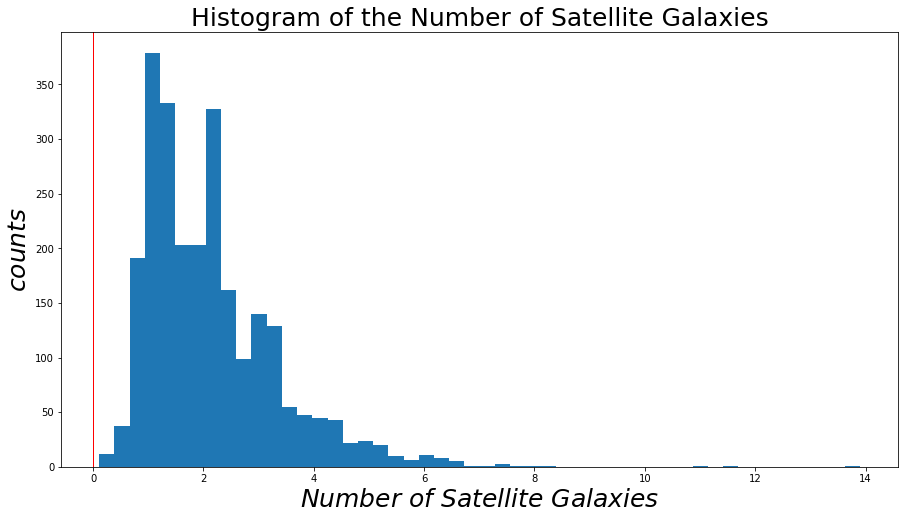

In [45]:
totalNsat(new_low_null_25_1)
plt.show()


In [29]:
# lowz, Nsat03

low_masked_null03 = np.load('/Users/mtownsend/Documents/LRG_Data/low_masked_null_03.npz')
low_masked_null03 = low_masked_null03['low_masked_null03']

new_low_null_03_1 = []
new_low_null_03_1 = []
new_low_null_03_1 = []
new_low_null_03_1 = []
new_low_null_03_1 = []
new_low_null_03_1 = []
new_low_null_03_1 = []
new_low_null_03_1 = []
for i in range(len(low_masked_null03)):
new_low_null_03_1 = loop_through_3D_array(low_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_low_null_03_2 = loop_through_3D_array(low_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_low_null_03_3 = loop_through_3D_array(low_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_low_null_03_4 = loop_through_3D_array(low_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_low_null_03_5 = loop_through_3D_array(low_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_low_null_03_6 = loop_through_3D_array(low_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_low_null_03_7 = loop_through_3D_array(low_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_low_null_03_8 = loop_through_3D_array(low_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_low_null_03_1).shape)
print(np.asarray(new_low_null_03_2).shape)
print(np.asarray(new_low_null_03_3).shape)
print(np.asarray(new_low_null_03_4).shape)
print(np.asarray(new_low_null_03_5).shape)
print(np.asarray(new_low_null_03_6).shape)
print(np.asarray(new_low_null_03_7).shape)
print(np.asarray(new_low_null_03_8).shape)

print('----')

print(np.asarray(low_masked_null03).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_low_03.npz', new_low_null_03_1=new_low_null_03_1, new_low_null_03_2=new_low_null_03_2, new_low_null_03_3=new_low_null_03_3, new_low_null_03_4=new_low_null_03_4, new_low_null_03_5=new_low_null_03_5, new_low_null_03_6=new_low_null_03_6, new_low_null_03_7=new_low_null_03_7, new_low_null_03_8=new_low_null_03_8)

low_data03 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_low_03.npz')
low_data03_1 = low_data03['new_low_null_03_1']
low_data03_2 = low_data03['new_low_null_03_2']
low_data03_3 = low_data03['new_low_null_03_3']
low_data03_4 = low_data03['new_low_null_03_4']
low_data03_5 = low_data03['new_low_null_03_5']
low_data03_6 = low_data03['new_low_null_03_6']
low_data03_7 = low_data03['new_low_null_03_7']
low_data03_8 = low_data03['new_low_null_03_8']
print(low_data03_1.shape)
print(low_data03_2.shape)
print(low_data03_3.shape)
print(low_data03_4.shape)
print(low_data03_5.shape)
print(low_data03_6.shape)
print(low_data03_7.shape)
print(low_data03_8.shape)


print('done')


(2478, 49, 49, 49)
(2478, 49, 49, 49)
(2478, 49, 49, 49)
(2478, 49, 49, 49)
(2478, 49, 49, 49)
(2478, 49, 49, 49)
(2478, 49, 49, 49)
(2478, 49, 49, 49)
----
(2478, 49, 49, 49)
----
(2478, 49, 49, 49)
(2478, 49, 49, 49)
(2478, 49, 49, 49)
(2478, 49, 49, 49)
(2478, 49, 49, 49)
(2478, 49, 49, 49)
(2478, 49, 49, 49)
(2478, 49, 49, 49)
done


In [25]:
# print(low_data25_1.shape)
# # print(low_data03_2.shape)
# # print(low_data03_3.shape)
# # print(low_data03_4.shape)
# # print(low_data03_5.shape)
# # print(low_data03_6.shape)
# # print(low_data03_7.shape)
# # print(low_data03_8.shape)


# # apply masks to new null results

# low_smatrix25 = smatrix03[0]
# low_smatrix03 = smatrix03[1]

# print(low_smatrix25.shape)
# print(low_smatrix03.shape)

# low_masked_null25_1 = []
# low_masked_null25_2 = []
# low_masked_null25_3 = []
# low_masked_null25_4 = []
# low_masked_null25_5 = []
# low_masked_null25_6 = []
# low_masked_null25_7 = []
# low_masked_null25_8 = []

# for i in range(len(low_data25_1)):
#     low_masked_null25_1.append(low_data25_1[i] * low_smatrix25)
#     low_masked_null25_2.append(low_data25_2[i] * low_smatrix25)
#     low_masked_null25_3.append(low_data25_3[i] * low_smatrix25)
#     low_masked_null25_4.append(low_data25_4[i] * low_smatrix25)
#     low_masked_null25_5.append(low_data25_5[i] * low_smatrix25)
#     low_masked_null25_6.append(low_data25_6[i] * low_smatrix25)
#     low_masked_null25_7.append(low_data25_7[i] * low_smatrix25)
#     low_masked_null25_8.append(low_data25_8[i] * low_smatrix25)
    
# print(np.asarray(low_masked_null25_1).shape)
# print(np.asarray(low_masked_null25_2).shape)
# print(np.asarray(low_masked_null25_3).shape)
# print(np.asarray(low_masked_null25_4).shape)
# print(np.asarray(low_masked_null25_5).shape)
# print(np.asarray(low_masked_null25_6).shape)
# print(np.asarray(low_masked_null25_7).shape)
# print(np.asarray(low_masked_null25_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/low_masked_null_gauss_25.npz', low_masked_null25_1=low_masked_null25_1, low_masked_null25_2=low_masked_null25_2, low_masked_null25_3=low_masked_null25_3, low_masked_null25_4=low_masked_null25_4, low_masked_null25_5=low_masked_null25_5, low_masked_null25_6=low_masked_null25_6, low_masked_null25_7=low_masked_null25_7, low_masked_null25_8=low_masked_null25_8)


# low_masked_null03_1 = []
# low_masked_null03_2 = []
# low_masked_null03_3 = []
# low_masked_null03_4 = []
# low_masked_null03_5 = []
# low_masked_null03_6 = []
# low_masked_null03_7 = []
# low_masked_null03_8 = []

# print('----')

# for i in range(len(low_data03_1)):
#     low_masked_null03_1.append(low_data03_1[i] * low_smatrix03)
#     low_masked_null03_2.append(low_data03_2[i] * low_smatrix03)
#     low_masked_null03_3.append(low_data03_3[i] * low_smatrix03)
#     low_masked_null03_4.append(low_data03_4[i] * low_smatrix03)
#     low_masked_null03_5.append(low_data03_5[i] * low_smatrix03)
#     low_masked_null03_6.append(low_data03_6[i] * low_smatrix03)
#     low_masked_null03_7.append(low_data03_7[i] * low_smatrix03)
#     low_masked_null03_8.append(low_data03_8[i] * low_smatrix03)

# print(np.asarray(low_masked_null03_1).shape)
# print(np.asarray(low_masked_null03_2).shape)
# print(np.asarray(low_masked_null03_3).shape)
# print(np.asarray(low_masked_null03_4).shape)
# print(np.asarray(low_masked_null03_5).shape)
# print(np.asarray(low_masked_null03_6).shape)
# print(np.asarray(low_masked_null03_7).shape)
# print(np.asarray(low_masked_null03_8).shape)


# np.savez('/Users/mtownsend/Documents/LRG_Data/low_masked_null_gauss_03.npz', low_masked_null03_1=low_masked_null03_1, low_masked_null03_2=low_masked_null03_2, low_masked_null03_3=low_masked_null03_3, low_masked_null03_4=low_masked_null03_4, low_masked_null03_5=low_masked_null03_5, low_masked_null03_6=low_masked_null03_6, low_masked_null03_7=low_masked_null03_7, low_masked_null03_8=low_masked_null03_8)



(2522, 49, 49, 49)
(49, 49, 49)
(49, 49, 49)
(2522, 49, 49, 49)
(2522, 49, 49, 49)
(2522, 49, 49, 49)
(2522, 49, 49, 49)
(2522, 49, 49, 49)
(2522, 49, 49, 49)
(2522, 49, 49, 49)
(2522, 49, 49, 49)
----
(2478, 49, 49, 49)
(2478, 49, 49, 49)
(2478, 49, 49, 49)
(2478, 49, 49, 49)
(2478, 49, 49, 49)
(2478, 49, 49, 49)
(2478, 49, 49, 49)
(2478, 49, 49, 49)


# Analysis for mid1 bins

In [30]:
# mid1, Nsat25

new_mid1_null_25_1 = loop_through_3D_array(mid1_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_mid1_null_25_2 = loop_through_3D_array(mid1_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_mid1_null_25_3 = loop_through_3D_array(mid1_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_mid1_null_25_4 = loop_through_3D_array(mid1_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_mid1_null_25_5 = loop_through_3D_array(mid1_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_mid1_null_25_6 = loop_through_3D_array(mid1_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_mid1_null_25_7 = loop_through_3D_array(mid1_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_mid1_null_25_8 = loop_through_3D_array(mid1_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_mid1_null_25_1).shape)
print(np.asarray(new_mid1_null_25_2).shape)
print(np.asarray(new_mid1_null_25_3).shape)
print(np.asarray(new_mid1_null_25_4).shape)
print(np.asarray(new_mid1_null_25_5).shape)
print(np.asarray(new_mid1_null_25_6).shape)
print(np.asarray(new_mid1_null_25_7).shape)
print(np.asarray(new_mid1_null_25_8).shape)

print('----')

print(np.asarray(mid1_masked_null25).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_mid1_25.npz', new_mid1_null_25_1=new_mid1_null_25_1, new_mid1_null_25_2=new_mid1_null_25_2, new_mid1_null_25_3=new_mid1_null_25_3, new_mid1_null_25_4=new_mid1_null_25_4, new_mid1_null_25_5=new_mid1_null_25_5, new_mid1_null_25_6=new_mid1_null_25_6, new_mid1_null_25_7=new_mid1_null_25_7, new_mid1_null_25_8=new_mid1_null_25_8)

mid1_data25 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_mid1_25.npz')
mid1_data25_1 = mid1_data25['new_mid1_null_25_1']
mid1_data25_2 = mid1_data25['new_mid1_null_25_2']
mid1_data25_3 = mid1_data25['new_mid1_null_25_3']
mid1_data25_4 = mid1_data25['new_mid1_null_25_4']
mid1_data25_5 = mid1_data25['new_mid1_null_25_5']
mid1_data25_6 = mid1_data25['new_mid1_null_25_6']
mid1_data25_7 = mid1_data25['new_mid1_null_25_7']
mid1_data25_8 = mid1_data25['new_mid1_null_25_8']
print(mid1_data25_1.shape)
print(mid1_data25_2.shape)
print(mid1_data25_3.shape)
print(mid1_data25_4.shape)
print(mid1_data25_5.shape)
print(mid1_data25_6.shape)
print(mid1_data25_7.shape)
print(mid1_data25_8.shape)

# print('----')

# # apply masks to new null results

# mid1_smatrix25 = smatrix04[0]

# print(mid1_smatrix25.shape)

# mid1_masked_null25_1 = []
# mid1_masked_null25_2 = []
# mid1_masked_null25_3 = []
# mid1_masked_null25_4 = []
# mid1_masked_null25_5 = []
# mid1_masked_null25_6 = []
# mid1_masked_null25_7 = []
# mid1_masked_null25_8 = []

# for i in range(len(mid1_data25_1)):
#     mid1_masked_null25_1.append(mid1_data25_1[i] * smatrix04[0])
#     mid1_masked_null25_2.append(mid1_data25_2[i] * smatrix04[0])
#     mid1_masked_null25_3.append(mid1_data25_3[i] * smatrix04[0])
#     mid1_masked_null25_4.append(mid1_data25_4[i] * smatrix04[0])
#     mid1_masked_null25_5.append(mid1_data25_5[i] * smatrix04[0])
#     mid1_masked_null25_6.append(mid1_data25_6[i] * smatrix04[0])
#     mid1_masked_null25_7.append(mid1_data25_7[i] * smatrix04[0])
#     mid1_masked_null25_8.append(mid1_data25_8[i] * smatrix04[0])
    
# print(np.asarray(mid1_masked_null25_1).shape)
# print(np.asarray(mid1_masked_null25_2).shape)
# print(np.asarray(mid1_masked_null25_3).shape)
# print(np.asarray(mid1_masked_null25_4).shape)
# print(np.asarray(mid1_masked_null25_5).shape)
# print(np.asarray(mid1_masked_null25_6).shape)
# print(np.asarray(mid1_masked_null25_7).shape)
# print(np.asarray(mid1_masked_null25_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid1_masked_null_gauss_25.npz', mid1_masked_null25_1=mid1_masked_null25_1, mid1_masked_null25_2=mid1_masked_null25_2, mid1_masked_null25_3=mid1_masked_null25_3, mid1_masked_null25_4=mid1_masked_null25_4, mid1_masked_null25_5=mid1_masked_null25_5, mid1_masked_null25_6=mid1_masked_null25_6, mid1_masked_null25_7=mid1_masked_null25_7, mid1_masked_null25_8=mid1_masked_null25_8)



(1268, 49, 49, 49)
(1268, 49, 49, 49)
(1268, 49, 49, 49)
(1268, 49, 49, 49)
(1268, 49, 49, 49)
(1268, 49, 49, 49)
(1268, 49, 49, 49)
(1268, 49, 49, 49)
----
(1268, 49, 49, 49)
----
(1268, 49, 49, 49)
(1268, 49, 49, 49)
(1268, 49, 49, 49)
(1268, 49, 49, 49)
(1268, 49, 49, 49)
(1268, 49, 49, 49)
(1268, 49, 49, 49)
(1268, 49, 49, 49)


In [31]:
# mid1, Nsat03

new_mid1_null_03_1 = loop_through_3D_array(mid1_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_mid1_null_03_2 = loop_through_3D_array(mid1_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_mid1_null_03_3 = loop_through_3D_array(mid1_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_mid1_null_03_4 = loop_through_3D_array(mid1_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_mid1_null_03_5 = loop_through_3D_array(mid1_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_mid1_null_03_6 = loop_through_3D_array(mid1_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_mid1_null_03_7 = loop_through_3D_array(mid1_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_mid1_null_03_8 = loop_through_3D_array(mid1_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_mid1_null_03_1).shape)
print(np.asarray(new_mid1_null_03_2).shape)
print(np.asarray(new_mid1_null_03_3).shape)
print(np.asarray(new_mid1_null_03_4).shape)
print(np.asarray(new_mid1_null_03_5).shape)
print(np.asarray(new_mid1_null_03_6).shape)
print(np.asarray(new_mid1_null_03_7).shape)
print(np.asarray(new_mid1_null_03_8).shape)

print('----')

print(np.asarray(mid1_masked_null03).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_mid1_03.npz', new_mid1_null_03_1=new_mid1_null_03_1, new_mid1_null_03_2=new_mid1_null_03_2, new_mid1_null_03_3=new_mid1_null_03_3, new_mid1_null_03_4=new_mid1_null_03_4, new_mid1_null_03_5=new_mid1_null_03_5, new_mid1_null_03_6=new_mid1_null_03_6, new_mid1_null_03_7=new_mid1_null_03_7, new_mid1_null_03_8=new_mid1_null_03_8)

mid1_data03 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_mid1_03.npz')
mid1_data03_1 = mid1_data03['new_mid1_null_03_1']
mid1_data03_2 = mid1_data03['new_mid1_null_03_2']
mid1_data03_3 = mid1_data03['new_mid1_null_03_3']
mid1_data03_4 = mid1_data03['new_mid1_null_03_4']
mid1_data03_5 = mid1_data03['new_mid1_null_03_5']
mid1_data03_6 = mid1_data03['new_mid1_null_03_6']
mid1_data03_7 = mid1_data03['new_mid1_null_03_7']
mid1_data03_8 = mid1_data03['new_mid1_null_03_8']
print(mid1_data03_1.shape)
print(mid1_data03_2.shape)
print(mid1_data03_3.shape)
print(mid1_data03_4.shape)
print(mid1_data03_5.shape)
print(mid1_data03_6.shape)
print(mid1_data03_7.shape)
print(mid1_data03_8.shape)

# print('----')

# # apply masks to new null results

# mid1_masked_null03_1 = []
# mid1_masked_null03_2 = []
# mid1_masked_null03_3 = []
# mid1_masked_null03_4 = []
# mid1_masked_null03_5 = []
# mid1_masked_null03_6 = []
# mid1_masked_null03_7 = []
# mid1_masked_null03_8 = []

# for i in range(len(mid1_data03_1)):
#     mid1_masked_null03_1.append(mid1_data03_1[i] * smatrix04[1])
#     mid1_masked_null03_2.append(mid1_data03_2[i] * smatrix04[1])
#     mid1_masked_null03_3.append(mid1_data03_3[i] * smatrix04[1])
#     mid1_masked_null03_4.append(mid1_data03_4[i] * smatrix04[1])
#     mid1_masked_null03_5.append(mid1_data03_5[i] * smatrix04[1])
#     mid1_masked_null03_6.append(mid1_data03_6[i] * smatrix04[1])
#     mid1_masked_null03_7.append(mid1_data03_7[i] * smatrix04[1])
#     mid1_masked_null03_8.append(mid1_data03_8[i] * smatrix04[1])
    
# print(np.asarray(mid1_masked_null03_1).shape)
# print(np.asarray(mid1_masked_null03_2).shape)
# print(np.asarray(mid1_masked_null03_3).shape)
# print(np.asarray(mid1_masked_null03_4).shape)
# print(np.asarray(mid1_masked_null03_5).shape)
# print(np.asarray(mid1_masked_null03_6).shape)
# print(np.asarray(mid1_masked_null03_7).shape)
# print(np.asarray(mid1_masked_null03_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid1_masked_null_gauss_03.npz', mid1_masked_null03_1=mid1_masked_null03_1, mid1_masked_null03_2=mid1_masked_null03_2, mid1_masked_null03_3=mid1_masked_null03_3, mid1_masked_null03_4=mid1_masked_null03_4, mid1_masked_null03_5=mid1_masked_null03_5, mid1_masked_null03_6=mid1_masked_null03_6, mid1_masked_null03_7=mid1_masked_null03_7, mid1_masked_null03_8=mid1_masked_null03_8)



(1265, 49, 49, 49)
(1265, 49, 49, 49)
(1265, 49, 49, 49)
(1265, 49, 49, 49)
(1265, 49, 49, 49)
(1265, 49, 49, 49)
(1265, 49, 49, 49)
(1265, 49, 49, 49)
----
(1265, 49, 49, 49)
----
(1265, 49, 49, 49)
(1265, 49, 49, 49)
(1265, 49, 49, 49)
(1265, 49, 49, 49)
(1265, 49, 49, 49)
(1265, 49, 49, 49)
(1265, 49, 49, 49)
(1265, 49, 49, 49)


In [32]:
# mid1, Nsat35

new_mid1_null_35_1 = loop_through_3D_array(mid1_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_mid1_null_35_2 = loop_through_3D_array(mid1_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_mid1_null_35_3 = loop_through_3D_array(mid1_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_mid1_null_35_4 = loop_through_3D_array(mid1_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_mid1_null_35_5 = loop_through_3D_array(mid1_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_mid1_null_35_6 = loop_through_3D_array(mid1_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_mid1_null_35_7 = loop_through_3D_array(mid1_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_mid1_null_35_8 = loop_through_3D_array(mid1_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_mid1_null_35_1).shape)
print(np.asarray(new_mid1_null_35_2).shape)
print(np.asarray(new_mid1_null_35_3).shape)
print(np.asarray(new_mid1_null_35_4).shape)
print(np.asarray(new_mid1_null_35_5).shape)
print(np.asarray(new_mid1_null_35_6).shape)
print(np.asarray(new_mid1_null_35_7).shape)
print(np.asarray(new_mid1_null_35_8).shape)

print('----')

print(np.asarray(mid1_masked_null35).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_mid1_35.npz', new_mid1_null_35_1=new_mid1_null_35_1, new_mid1_null_35_2=new_mid1_null_35_2, new_mid1_null_35_3=new_mid1_null_35_3, new_mid1_null_35_4=new_mid1_null_35_4, new_mid1_null_35_5=new_mid1_null_35_5, new_mid1_null_35_6=new_mid1_null_35_6, new_mid1_null_35_7=new_mid1_null_35_7, new_mid1_null_35_8=new_mid1_null_35_8)

mid1_data35 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_mid1_35.npz')
mid1_data35_1 = mid1_data35['new_mid1_null_35_1']
mid1_data35_2 = mid1_data35['new_mid1_null_35_2']
mid1_data35_3 = mid1_data35['new_mid1_null_35_3']
mid1_data35_4 = mid1_data35['new_mid1_null_35_4']
mid1_data35_5 = mid1_data35['new_mid1_null_35_5']
mid1_data35_6 = mid1_data35['new_mid1_null_35_6']
mid1_data35_7 = mid1_data35['new_mid1_null_35_7']
mid1_data35_8 = mid1_data35['new_mid1_null_35_8']
print(mid1_data35_1.shape)
print(mid1_data35_2.shape)
print(mid1_data35_3.shape)
print(mid1_data35_4.shape)
print(mid1_data35_5.shape)
print(mid1_data35_6.shape)
print(mid1_data35_7.shape)
print(mid1_data35_8.shape)

# print('----')

# # apply masks to new null results

# mid1_masked_null35_1 = []
# mid1_masked_null35_2 = []
# mid1_masked_null35_3 = []
# mid1_masked_null35_4 = []
# mid1_masked_null35_5 = []
# mid1_masked_null35_6 = []
# mid1_masked_null35_7 = []
# mid1_masked_null35_8 = []

# for i in range(len(mid1_data35_1)):
#     mid1_masked_null35_1.append(mid1_data35_1[i] * smatrix04[2])
#     mid1_masked_null35_2.append(mid1_data35_2[i] * smatrix04[2])
#     mid1_masked_null35_3.append(mid1_data35_3[i] * smatrix04[2])
#     mid1_masked_null35_4.append(mid1_data35_4[i] * smatrix04[2])
#     mid1_masked_null35_5.append(mid1_data35_5[i] * smatrix04[2])
#     mid1_masked_null35_6.append(mid1_data35_6[i] * smatrix04[2])
#     mid1_masked_null35_7.append(mid1_data35_7[i] * smatrix04[2])
#     mid1_masked_null35_8.append(mid1_data35_8[i] * smatrix04[2])
    
# print(np.asarray(mid1_masked_null35_1).shape)
# print(np.asarray(mid1_masked_null35_2).shape)
# print(np.asarray(mid1_masked_null35_3).shape)
# print(np.asarray(mid1_masked_null35_4).shape)
# print(np.asarray(mid1_masked_null35_5).shape)
# print(np.asarray(mid1_masked_null35_6).shape)
# print(np.asarray(mid1_masked_null35_7).shape)
# print(np.asarray(mid1_masked_null35_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid1_masked_null_gauss_35.npz', mid1_masked_null35_1=mid1_masked_null35_1, mid1_masked_null35_2=mid1_masked_null35_2, mid1_masked_null35_3=mid1_masked_null35_3, mid1_masked_null35_4=mid1_masked_null35_4, mid1_masked_null35_5=mid1_masked_null35_5, mid1_masked_null35_6=mid1_masked_null35_6, mid1_masked_null35_7=mid1_masked_null35_7, mid1_masked_null35_8=mid1_masked_null35_8)



(1207, 49, 49, 49)
(1207, 49, 49, 49)
(1207, 49, 49, 49)
(1207, 49, 49, 49)
(1207, 49, 49, 49)
(1207, 49, 49, 49)
(1207, 49, 49, 49)
(1207, 49, 49, 49)
----
(1207, 49, 49, 49)
----
(1207, 49, 49, 49)
(1207, 49, 49, 49)
(1207, 49, 49, 49)
(1207, 49, 49, 49)
(1207, 49, 49, 49)
(1207, 49, 49, 49)
(1207, 49, 49, 49)
(1207, 49, 49, 49)


In [34]:
# mid1, Nsat04

new_mid1_null_04_1 = loop_through_3D_array(mid1_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_mid1_null_04_2 = loop_through_3D_array(mid1_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_mid1_null_04_3 = loop_through_3D_array(mid1_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_mid1_null_04_4 = loop_through_3D_array(mid1_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_mid1_null_04_5 = loop_through_3D_array(mid1_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_mid1_null_04_6 = loop_through_3D_array(mid1_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_mid1_null_04_7 = loop_through_3D_array(mid1_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_mid1_null_04_8 = loop_through_3D_array(mid1_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_mid1_null_04_1).shape)
print(np.asarray(new_mid1_null_04_2).shape)
print(np.asarray(new_mid1_null_04_3).shape)
print(np.asarray(new_mid1_null_04_4).shape)
print(np.asarray(new_mid1_null_04_5).shape)
print(np.asarray(new_mid1_null_04_6).shape)
print(np.asarray(new_mid1_null_04_7).shape)
print(np.asarray(new_mid1_null_04_8).shape)

print('----')

print(np.asarray(mid1_masked_null04).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_mid1_04.npz', new_mid1_null_04_1=new_mid1_null_04_1, new_mid1_null_04_2=new_mid1_null_04_2, new_mid1_null_04_3=new_mid1_null_04_3, new_mid1_null_04_4=new_mid1_null_04_4, new_mid1_null_04_5=new_mid1_null_04_5, new_mid1_null_04_6=new_mid1_null_04_6, new_mid1_null_04_7=new_mid1_null_04_7, new_mid1_null_04_8=new_mid1_null_04_8)

mid1_data04 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_mid1_04.npz')
mid1_data04_1 = mid1_data04['new_mid1_null_04_1']
mid1_data04_2 = mid1_data04['new_mid1_null_04_2']
mid1_data04_3 = mid1_data04['new_mid1_null_04_3']
mid1_data04_4 = mid1_data04['new_mid1_null_04_4']
mid1_data04_5 = mid1_data04['new_mid1_null_04_5']
mid1_data04_6 = mid1_data04['new_mid1_null_04_6']
mid1_data04_7 = mid1_data04['new_mid1_null_04_7']
mid1_data04_8 = mid1_data04['new_mid1_null_04_8']
print(mid1_data04_1.shape)
print(mid1_data04_2.shape)
print(mid1_data04_3.shape)
print(mid1_data04_4.shape)
print(mid1_data04_5.shape)
print(mid1_data04_6.shape)
print(mid1_data04_7.shape)
print(mid1_data04_8.shape)

# print('----')

# # apply masks to new null results

# mid1_masked_null04_1 = []
# mid1_masked_null04_2 = []
# mid1_masked_null04_3 = []
# mid1_masked_null04_4 = []
# mid1_masked_null04_5 = []
# mid1_masked_null04_6 = []
# mid1_masked_null04_7 = []
# mid1_masked_null04_8 = []

# for i in range(len(mid1_data04_1)):
#     mid1_masked_null04_1.append(mid1_data04_1[i] * smatrix04[3])
#     mid1_masked_null04_2.append(mid1_data04_2[i] * smatrix04[3])
#     mid1_masked_null04_3.append(mid1_data04_3[i] * smatrix04[3])
#     mid1_masked_null04_4.append(mid1_data04_4[i] * smatrix04[3])
#     mid1_masked_null04_5.append(mid1_data04_5[i] * smatrix04[3])
#     mid1_masked_null04_6.append(mid1_data04_6[i] * smatrix04[3])
#     mid1_masked_null04_7.append(mid1_data04_7[i] * smatrix04[3])
#     mid1_masked_null04_8.append(mid1_data04_8[i] * smatrix04[3])
    
# print(np.asarray(mid1_masked_null04_1).shape)
# print(np.asarray(mid1_masked_null04_2).shape)
# print(np.asarray(mid1_masked_null04_3).shape)
# print(np.asarray(mid1_masked_null04_4).shape)
# print(np.asarray(mid1_masked_null04_5).shape)
# print(np.asarray(mid1_masked_null04_6).shape)
# print(np.asarray(mid1_masked_null04_7).shape)
# print(np.asarray(mid1_masked_null04_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid1_masked_null_gauss_04.npz', mid1_masked_null04_1=mid1_masked_null04_1, mid1_masked_null04_2=mid1_masked_null04_2, mid1_masked_null04_3=mid1_masked_null04_3, mid1_masked_null04_4=mid1_masked_null04_4, mid1_masked_null04_5=mid1_masked_null04_5, mid1_masked_null04_6=mid1_masked_null04_6, mid1_masked_null04_7=mid1_masked_null04_7, mid1_masked_null04_8=mid1_masked_null04_8)



(1260, 49, 49, 49)
(1260, 49, 49, 49)
(1260, 49, 49, 49)
(1260, 49, 49, 49)
(1260, 49, 49, 49)
(1260, 49, 49, 49)
(1260, 49, 49, 49)
(1260, 49, 49, 49)
----
(1260, 49, 49, 49)
----
(1260, 49, 49, 49)
(1260, 49, 49, 49)
(1260, 49, 49, 49)
(1260, 49, 49, 49)
(1260, 49, 49, 49)
(1260, 49, 49, 49)
(1260, 49, 49, 49)
(1260, 49, 49, 49)


# Analysis for mid2 bins

In [35]:
# mid2, Nsat25

new_mid2_null_25_1 = loop_through_3D_array(mid2_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_mid2_null_25_2 = loop_through_3D_array(mid2_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_mid2_null_25_3 = loop_through_3D_array(mid2_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_mid2_null_25_4 = loop_through_3D_array(mid2_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_mid2_null_25_5 = loop_through_3D_array(mid2_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_mid2_null_25_6 = loop_through_3D_array(mid2_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_mid2_null_25_7 = loop_through_3D_array(mid2_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_mid2_null_25_8 = loop_through_3D_array(mid2_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_mid2_null_25_1).shape)
print(np.asarray(new_mid2_null_25_2).shape)
print(np.asarray(new_mid2_null_25_3).shape)
print(np.asarray(new_mid2_null_25_4).shape)
print(np.asarray(new_mid2_null_25_5).shape)
print(np.asarray(new_mid2_null_25_6).shape)
print(np.asarray(new_mid2_null_25_7).shape)
print(np.asarray(new_mid2_null_25_8).shape)

print('----')

print(np.asarray(mid2_masked_null25).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_mid2_25.npz', new_mid2_null_25_1=new_mid2_null_25_1, new_mid2_null_25_2=new_mid2_null_25_2, new_mid2_null_25_3=new_mid2_null_25_3, new_mid2_null_25_4=new_mid2_null_25_4, new_mid2_null_25_5=new_mid2_null_25_5, new_mid2_null_25_6=new_mid2_null_25_6, new_mid2_null_25_7=new_mid2_null_25_7, new_mid2_null_25_8=new_mid2_null_25_8)

mid2_data25 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_mid2_25.npz')
mid2_data25_1 = mid2_data25['new_mid2_null_25_1']
mid2_data25_2 = mid2_data25['new_mid2_null_25_2']
mid2_data25_3 = mid2_data25['new_mid2_null_25_3']
mid2_data25_4 = mid2_data25['new_mid2_null_25_4']
mid2_data25_5 = mid2_data25['new_mid2_null_25_5']
mid2_data25_6 = mid2_data25['new_mid2_null_25_6']
mid2_data25_7 = mid2_data25['new_mid2_null_25_7']
mid2_data25_8 = mid2_data25['new_mid2_null_25_8']
print(mid2_data25_1.shape)
print(mid2_data25_2.shape)
print(mid2_data25_3.shape)
print(mid2_data25_4.shape)
print(mid2_data25_5.shape)
print(mid2_data25_6.shape)
print(mid2_data25_7.shape)
print(mid2_data25_8.shape)

# print('----')

# # apply masks to new null results

# mid2_masked_null25_1 = []
# mid2_masked_null25_2 = []
# mid2_masked_null25_3 = []
# mid2_masked_null25_4 = []
# mid2_masked_null25_5 = []
# mid2_masked_null25_6 = []
# mid2_masked_null25_7 = []
# mid2_masked_null25_8 = []

# for i in range(len(mid2_data25_1)):
#     mid2_masked_null25_1.append(mid2_data25_1[i] * smatrix05[0])
#     mid2_masked_null25_2.append(mid2_data25_2[i] * smatrix05[0])
#     mid2_masked_null25_3.append(mid2_data25_3[i] * smatrix05[0])
#     mid2_masked_null25_4.append(mid2_data25_4[i] * smatrix05[0])
#     mid2_masked_null25_5.append(mid2_data25_5[i] * smatrix05[0])
#     mid2_masked_null25_6.append(mid2_data25_6[i] * smatrix05[0])
#     mid2_masked_null25_7.append(mid2_data25_7[i] * smatrix05[0])
#     mid2_masked_null25_8.append(mid2_data25_8[i] * smatrix05[0])
    
# print(np.asarray(mid2_masked_null25_1).shape)
# print(np.asarray(mid2_masked_null25_2).shape)
# print(np.asarray(mid2_masked_null25_3).shape)
# print(np.asarray(mid2_masked_null25_4).shape)
# print(np.asarray(mid2_masked_null25_5).shape)
# print(np.asarray(mid2_masked_null25_6).shape)
# print(np.asarray(mid2_masked_null25_7).shape)
# print(np.asarray(mid2_masked_null25_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid2_masked_null_gauss_25.npz', mid2_masked_null25_1=mid2_masked_null25_1, mid2_masked_null25_2=mid2_masked_null25_2, mid2_masked_null25_3=mid2_masked_null25_3, mid2_masked_null25_4=mid2_masked_null25_4, mid2_masked_null25_5=mid2_masked_null25_5, mid2_masked_null25_6=mid2_masked_null25_6, mid2_masked_null25_7=mid2_masked_null25_7, mid2_masked_null25_8=mid2_masked_null25_8)



(871, 49, 49, 49)
(871, 49, 49, 49)
(871, 49, 49, 49)
(871, 49, 49, 49)
(871, 49, 49, 49)
(871, 49, 49, 49)
(871, 49, 49, 49)
(871, 49, 49, 49)
----
(871, 49, 49, 49)
----
(871, 49, 49, 49)
(871, 49, 49, 49)
(871, 49, 49, 49)
(871, 49, 49, 49)
(871, 49, 49, 49)
(871, 49, 49, 49)
(871, 49, 49, 49)
(871, 49, 49, 49)


In [36]:
# mid2, Nsat03

new_mid2_null_03_1 = loop_through_3D_array(mid2_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_mid2_null_03_2 = loop_through_3D_array(mid2_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_mid2_null_03_3 = loop_through_3D_array(mid2_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_mid2_null_03_4 = loop_through_3D_array(mid2_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_mid2_null_03_5 = loop_through_3D_array(mid2_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_mid2_null_03_6 = loop_through_3D_array(mid2_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_mid2_null_03_7 = loop_through_3D_array(mid2_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_mid2_null_03_8 = loop_through_3D_array(mid2_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_mid2_null_03_1).shape)
print(np.asarray(new_mid2_null_03_2).shape)
print(np.asarray(new_mid2_null_03_3).shape)
print(np.asarray(new_mid2_null_03_4).shape)
print(np.asarray(new_mid2_null_03_5).shape)
print(np.asarray(new_mid2_null_03_6).shape)
print(np.asarray(new_mid2_null_03_7).shape)
print(np.asarray(new_mid2_null_03_8).shape)

print('----')

print(np.asarray(mid2_masked_null03).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_mid2_03.npz', new_mid2_null_03_1=new_mid2_null_03_1, new_mid2_null_03_2=new_mid2_null_03_2, new_mid2_null_03_3=new_mid2_null_03_3, new_mid2_null_03_4=new_mid2_null_03_4, new_mid2_null_03_5=new_mid2_null_03_5, new_mid2_null_03_6=new_mid2_null_03_6, new_mid2_null_03_7=new_mid2_null_03_7, new_mid2_null_03_8=new_mid2_null_03_8)

mid2_data03 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_mid2_03.npz')
mid2_data03_1 = mid2_data03['new_mid2_null_03_1']
mid2_data03_2 = mid2_data03['new_mid2_null_03_2']
mid2_data03_3 = mid2_data03['new_mid2_null_03_3']
mid2_data03_4 = mid2_data03['new_mid2_null_03_4']
mid2_data03_5 = mid2_data03['new_mid2_null_03_5']
mid2_data03_6 = mid2_data03['new_mid2_null_03_6']
mid2_data03_7 = mid2_data03['new_mid2_null_03_7']
mid2_data03_8 = mid2_data03['new_mid2_null_03_8']
print(mid2_data03_1.shape)
print(mid2_data03_2.shape)
print(mid2_data03_3.shape)
print(mid2_data03_4.shape)
print(mid2_data03_5.shape)
print(mid2_data03_6.shape)
print(mid2_data03_7.shape)
print(mid2_data03_8.shape)

# print('----')

# # apply masks to new null results

# mid2_masked_null03_1 = []
# mid2_masked_null03_2 = []
# mid2_masked_null03_3 = []
# mid2_masked_null03_4 = []
# mid2_masked_null03_5 = []
# mid2_masked_null03_6 = []
# mid2_masked_null03_7 = []
# mid2_masked_null03_8 = []

# for i in range(len(mid2_data03_1)):
#     mid2_masked_null03_1.append(mid2_data03_1[i] * smatrix05[1])
#     mid2_masked_null03_2.append(mid2_data03_2[i] * smatrix05[1])
#     mid2_masked_null03_3.append(mid2_data03_3[i] * smatrix05[1])
#     mid2_masked_null03_4.append(mid2_data03_4[i] * smatrix05[1])
#     mid2_masked_null03_5.append(mid2_data03_5[i] * smatrix05[1])
#     mid2_masked_null03_6.append(mid2_data03_6[i] * smatrix05[1])
#     mid2_masked_null03_7.append(mid2_data03_7[i] * smatrix05[1])
#     mid2_masked_null03_8.append(mid2_data03_8[i] * smatrix05[1])
    
# print(np.asarray(mid2_masked_null03_1).shape)
# print(np.asarray(mid2_masked_null03_2).shape)
# print(np.asarray(mid2_masked_null03_3).shape)
# print(np.asarray(mid2_masked_null03_4).shape)
# print(np.asarray(mid2_masked_null03_5).shape)
# print(np.asarray(mid2_masked_null03_6).shape)
# print(np.asarray(mid2_masked_null03_7).shape)
# print(np.asarray(mid2_masked_null03_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid2_masked_null_gauss_03.npz', mid2_masked_null03_1=mid2_masked_null03_1, mid2_masked_null03_2=mid2_masked_null03_2, mid2_masked_null03_3=mid2_masked_null03_3, mid2_masked_null03_4=mid2_masked_null03_4, mid2_masked_null03_5=mid2_masked_null03_5, mid2_masked_null03_6=mid2_masked_null03_6, mid2_masked_null03_7=mid2_masked_null03_7, mid2_masked_null03_8=mid2_masked_null03_8)



(847, 49, 49, 49)
(847, 49, 49, 49)
(847, 49, 49, 49)
(847, 49, 49, 49)
(847, 49, 49, 49)
(847, 49, 49, 49)
(847, 49, 49, 49)
(847, 49, 49, 49)
----
(847, 49, 49, 49)
----
(847, 49, 49, 49)
(847, 49, 49, 49)
(847, 49, 49, 49)
(847, 49, 49, 49)
(847, 49, 49, 49)
(847, 49, 49, 49)
(847, 49, 49, 49)
(847, 49, 49, 49)


In [37]:
# mid2, Nsat35

new_mid2_null_35_1 = loop_through_3D_array(mid2_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_mid2_null_35_2 = loop_through_3D_array(mid2_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_mid2_null_35_3 = loop_through_3D_array(mid2_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_mid2_null_35_4 = loop_through_3D_array(mid2_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_mid2_null_35_5 = loop_through_3D_array(mid2_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_mid2_null_35_6 = loop_through_3D_array(mid2_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_mid2_null_35_7 = loop_through_3D_array(mid2_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_mid2_null_35_8 = loop_through_3D_array(mid2_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_mid2_null_35_1).shape)
print(np.asarray(new_mid2_null_35_2).shape)
print(np.asarray(new_mid2_null_35_3).shape)
print(np.asarray(new_mid2_null_35_4).shape)
print(np.asarray(new_mid2_null_35_5).shape)
print(np.asarray(new_mid2_null_35_6).shape)
print(np.asarray(new_mid2_null_35_7).shape)
print(np.asarray(new_mid2_null_35_8).shape)

print('----')

print(np.asarray(mid2_masked_null35).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_mid2_35.npz', new_mid2_null_35_1=new_mid2_null_35_1, new_mid2_null_35_2=new_mid2_null_35_2, new_mid2_null_35_3=new_mid2_null_35_3, new_mid2_null_35_4=new_mid2_null_35_4, new_mid2_null_35_5=new_mid2_null_35_5, new_mid2_null_35_6=new_mid2_null_35_6, new_mid2_null_35_7=new_mid2_null_35_7, new_mid2_null_35_8=new_mid2_null_35_8)

mid2_data35 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_mid2_35.npz')
mid2_data35_1 = mid2_data35['new_mid2_null_35_1']
mid2_data35_2 = mid2_data35['new_mid2_null_35_2']
mid2_data35_3 = mid2_data35['new_mid2_null_35_3']
mid2_data35_4 = mid2_data35['new_mid2_null_35_4']
mid2_data35_5 = mid2_data35['new_mid2_null_35_5']
mid2_data35_6 = mid2_data35['new_mid2_null_35_6']
mid2_data35_7 = mid2_data35['new_mid2_null_35_7']
mid2_data35_8 = mid2_data35['new_mid2_null_35_8']
print(mid2_data35_1.shape)
print(mid2_data35_2.shape)
print(mid2_data35_3.shape)
print(mid2_data35_4.shape)
print(mid2_data35_5.shape)
print(mid2_data35_6.shape)
print(mid2_data35_7.shape)
print(mid2_data35_8.shape)

# print('----')

# # apply masks to new null results

# mid2_masked_null35_1 = []
# mid2_masked_null35_2 = []
# mid2_masked_null35_3 = []
# mid2_masked_null35_4 = []
# mid2_masked_null35_5 = []
# mid2_masked_null35_6 = []
# mid2_masked_null35_7 = []
# mid2_masked_null35_8 = []

# for i in range(len(mid2_data35_1)):
#     mid2_masked_null35_1.append(mid2_data35_1[i] * smatrix05[2])
#     mid2_masked_null35_2.append(mid2_data35_2[i] * smatrix05[2])
#     mid2_masked_null35_3.append(mid2_data35_3[i] * smatrix05[2])
#     mid2_masked_null35_4.append(mid2_data35_4[i] * smatrix05[2])
#     mid2_masked_null35_5.append(mid2_data35_5[i] * smatrix05[2])
#     mid2_masked_null35_6.append(mid2_data35_6[i] * smatrix05[2])
#     mid2_masked_null35_7.append(mid2_data35_7[i] * smatrix05[2])
#     mid2_masked_null35_8.append(mid2_data35_8[i] * smatrix05[2])
    
# print(np.asarray(mid2_masked_null35_1).shape)
# print(np.asarray(mid2_masked_null35_2).shape)
# print(np.asarray(mid2_masked_null35_3).shape)
# print(np.asarray(mid2_masked_null35_4).shape)
# print(np.asarray(mid2_masked_null35_5).shape)
# print(np.asarray(mid2_masked_null35_6).shape)
# print(np.asarray(mid2_masked_null35_7).shape)
# print(np.asarray(mid2_masked_null35_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid2_masked_null_gauss_35.npz', mid2_masked_null35_1=mid2_masked_null35_1, mid2_masked_null35_2=mid2_masked_null35_2, mid2_masked_null35_3=mid2_masked_null35_3, mid2_masked_null35_4=mid2_masked_null35_4, mid2_masked_null35_5=mid2_masked_null35_5, mid2_masked_null35_6=mid2_masked_null35_6, mid2_masked_null35_7=mid2_masked_null35_7, mid2_masked_null35_8=mid2_masked_null35_8)



(808, 49, 49, 49)
(808, 49, 49, 49)
(808, 49, 49, 49)
(808, 49, 49, 49)
(808, 49, 49, 49)
(808, 49, 49, 49)
(808, 49, 49, 49)
(808, 49, 49, 49)
----
(808, 49, 49, 49)
----
(808, 49, 49, 49)
(808, 49, 49, 49)
(808, 49, 49, 49)
(808, 49, 49, 49)
(808, 49, 49, 49)
(808, 49, 49, 49)
(808, 49, 49, 49)
(808, 49, 49, 49)


In [38]:
# mid2, Nsat04

new_mid2_null_04_1 = loop_through_3D_array(mid2_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_mid2_null_04_2 = loop_through_3D_array(mid2_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_mid2_null_04_3 = loop_through_3D_array(mid2_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_mid2_null_04_4 = loop_through_3D_array(mid2_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_mid2_null_04_5 = loop_through_3D_array(mid2_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_mid2_null_04_6 = loop_through_3D_array(mid2_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_mid2_null_04_7 = loop_through_3D_array(mid2_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_mid2_null_04_8 = loop_through_3D_array(mid2_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_mid2_null_04_1).shape)
print(np.asarray(new_mid2_null_04_2).shape)
print(np.asarray(new_mid2_null_04_3).shape)
print(np.asarray(new_mid2_null_04_4).shape)
print(np.asarray(new_mid2_null_04_5).shape)
print(np.asarray(new_mid2_null_04_6).shape)
print(np.asarray(new_mid2_null_04_7).shape)
print(np.asarray(new_mid2_null_04_8).shape)

print('----')

print(np.asarray(mid2_masked_null04).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_mid2_04.npz', new_mid2_null_04_1=new_mid2_null_04_1, new_mid2_null_04_2=new_mid2_null_04_2, new_mid2_null_04_3=new_mid2_null_04_3, new_mid2_null_04_4=new_mid2_null_04_4, new_mid2_null_04_5=new_mid2_null_04_5, new_mid2_null_04_6=new_mid2_null_04_6, new_mid2_null_04_7=new_mid2_null_04_7, new_mid2_null_04_8=new_mid2_null_04_8)

mid2_data04 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_mid2_04.npz')
mid2_data04_1 = mid2_data04['new_mid2_null_04_1']
mid2_data04_2 = mid2_data04['new_mid2_null_04_2']
mid2_data04_3 = mid2_data04['new_mid2_null_04_3']
mid2_data04_4 = mid2_data04['new_mid2_null_04_4']
mid2_data04_5 = mid2_data04['new_mid2_null_04_5']
mid2_data04_6 = mid2_data04['new_mid2_null_04_6']
mid2_data04_7 = mid2_data04['new_mid2_null_04_7']
mid2_data04_8 = mid2_data04['new_mid2_null_04_8']
print(mid2_data04_1.shape)
print(mid2_data04_2.shape)
print(mid2_data04_3.shape)
print(mid2_data04_4.shape)
print(mid2_data04_5.shape)
print(mid2_data04_6.shape)
print(mid2_data04_7.shape)
print(mid2_data04_8.shape)

# print('----')

# # apply masks to new null results

# mid2_masked_null04_1 = []
# mid2_masked_null04_2 = []
# mid2_masked_null04_3 = []
# mid2_masked_null04_4 = []
# mid2_masked_null04_5 = []
# mid2_masked_null04_6 = []
# mid2_masked_null04_7 = []
# mid2_masked_null04_8 = []

# for i in range(len(mid2_data04_1)):
#     mid2_masked_null04_1.append(mid2_data04_1[i] * smatrix05[3])
#     mid2_masked_null04_2.append(mid2_data04_2[i] * smatrix05[3])
#     mid2_masked_null04_3.append(mid2_data04_3[i] * smatrix05[3])
#     mid2_masked_null04_4.append(mid2_data04_4[i] * smatrix05[3])
#     mid2_masked_null04_5.append(mid2_data04_5[i] * smatrix05[3])
#     mid2_masked_null04_6.append(mid2_data04_6[i] * smatrix05[3])
#     mid2_masked_null04_7.append(mid2_data04_7[i] * smatrix05[3])
#     mid2_masked_null04_8.append(mid2_data04_8[i] * smatrix05[3])
    
# print(np.asarray(mid2_masked_null04_1).shape)
# print(np.asarray(mid2_masked_null04_2).shape)
# print(np.asarray(mid2_masked_null04_3).shape)
# print(np.asarray(mid2_masked_null04_4).shape)
# print(np.asarray(mid2_masked_null04_5).shape)
# print(np.asarray(mid2_masked_null04_6).shape)
# print(np.asarray(mid2_masked_null04_7).shape)
# print(np.asarray(mid2_masked_null04_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid2_masked_null_gauss_04.npz', mid2_masked_null04_1=mid2_masked_null04_1, mid2_masked_null04_2=mid2_masked_null04_2, mid2_masked_null04_3=mid2_masked_null04_3, mid2_masked_null04_4=mid2_masked_null04_4, mid2_masked_null04_5=mid2_masked_null04_5, mid2_masked_null04_6=mid2_masked_null04_6, mid2_masked_null04_7=mid2_masked_null04_7, mid2_masked_null04_8=mid2_masked_null04_8)



(876, 49, 49, 49)
(876, 49, 49, 49)
(876, 49, 49, 49)
(876, 49, 49, 49)
(876, 49, 49, 49)
(876, 49, 49, 49)
(876, 49, 49, 49)
(876, 49, 49, 49)
----
(876, 49, 49, 49)
----
(876, 49, 49, 49)
(876, 49, 49, 49)
(876, 49, 49, 49)
(876, 49, 49, 49)
(876, 49, 49, 49)
(876, 49, 49, 49)
(876, 49, 49, 49)
(876, 49, 49, 49)


In [39]:
# mid2, Nsat45

new_mid2_null_45_1 = loop_through_3D_array(mid2_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_mid2_null_45_2 = loop_through_3D_array(mid2_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_mid2_null_45_3 = loop_through_3D_array(mid2_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_mid2_null_45_4 = loop_through_3D_array(mid2_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_mid2_null_45_5 = loop_through_3D_array(mid2_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_mid2_null_45_6 = loop_through_3D_array(mid2_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_mid2_null_45_7 = loop_through_3D_array(mid2_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_mid2_null_45_8 = loop_through_3D_array(mid2_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_mid2_null_45_1).shape)
print(np.asarray(new_mid2_null_45_2).shape)
print(np.asarray(new_mid2_null_45_3).shape)
print(np.asarray(new_mid2_null_45_4).shape)
print(np.asarray(new_mid2_null_45_5).shape)
print(np.asarray(new_mid2_null_45_6).shape)
print(np.asarray(new_mid2_null_45_7).shape)
print(np.asarray(new_mid2_null_45_8).shape)

print('----')

print(np.asarray(mid2_masked_null45).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_mid2_45.npz', new_mid2_null_45_1=new_mid2_null_45_1, new_mid2_null_45_2=new_mid2_null_45_2, new_mid2_null_45_3=new_mid2_null_45_3, new_mid2_null_45_4=new_mid2_null_45_4, new_mid2_null_45_5=new_mid2_null_45_5, new_mid2_null_45_6=new_mid2_null_45_6, new_mid2_null_45_7=new_mid2_null_45_7, new_mid2_null_45_8=new_mid2_null_45_8)

mid2_data45 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_mid2_45.npz')
mid2_data45_1 = mid2_data45['new_mid2_null_45_1']
mid2_data45_2 = mid2_data45['new_mid2_null_45_2']
mid2_data45_3 = mid2_data45['new_mid2_null_45_3']
mid2_data45_4 = mid2_data45['new_mid2_null_45_4']
mid2_data45_5 = mid2_data45['new_mid2_null_45_5']
mid2_data45_6 = mid2_data45['new_mid2_null_45_6']
mid2_data45_7 = mid2_data45['new_mid2_null_45_7']
mid2_data45_8 = mid2_data45['new_mid2_null_45_8']
print(mid2_data45_1.shape)
print(mid2_data45_2.shape)
print(mid2_data45_3.shape)
print(mid2_data45_4.shape)
print(mid2_data45_5.shape)
print(mid2_data45_6.shape)
print(mid2_data45_7.shape)
print(mid2_data45_8.shape)

# print('----')

# # apply masks to new null results

# mid2_masked_null45_1 = []
# mid2_masked_null45_2 = []
# mid2_masked_null45_3 = []
# mid2_masked_null45_4 = []
# mid2_masked_null45_5 = []
# mid2_masked_null45_6 = []
# mid2_masked_null45_7 = []
# mid2_masked_null45_8 = []

# for i in range(len(mid2_data45_1)):
#     mid2_masked_null45_1.append(mid2_data45_1[i] * smatrix05[4])
#     mid2_masked_null45_2.append(mid2_data45_2[i] * smatrix05[4])
#     mid2_masked_null45_3.append(mid2_data45_3[i] * smatrix05[4])
#     mid2_masked_null45_4.append(mid2_data45_4[i] * smatrix05[4])
#     mid2_masked_null45_5.append(mid2_data45_5[i] * smatrix05[4])
#     mid2_masked_null45_6.append(mid2_data45_6[i] * smatrix05[4])
#     mid2_masked_null45_7.append(mid2_data45_7[i] * smatrix05[4])
#     mid2_masked_null45_8.append(mid2_data45_8[i] * smatrix05[4])
    
# print(np.asarray(mid2_masked_null45_1).shape)
# print(np.asarray(mid2_masked_null45_2).shape)
# print(np.asarray(mid2_masked_null45_3).shape)
# print(np.asarray(mid2_masked_null45_4).shape)
# print(np.asarray(mid2_masked_null45_5).shape)
# print(np.asarray(mid2_masked_null45_6).shape)
# print(np.asarray(mid2_masked_null45_7).shape)
# print(np.asarray(mid2_masked_null45_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid2_masked_null_gauss_45.npz', mid2_masked_null45_1=mid2_masked_null45_1, mid2_masked_null45_2=mid2_masked_null45_2, mid2_masked_null45_3=mid2_masked_null45_3, mid2_masked_null45_4=mid2_masked_null45_4, mid2_masked_null45_5=mid2_masked_null45_5, mid2_masked_null45_6=mid2_masked_null45_6, mid2_masked_null45_7=mid2_masked_null45_7, mid2_masked_null45_8=mid2_masked_null45_8)



(812, 49, 49, 49)
(812, 49, 49, 49)
(812, 49, 49, 49)
(812, 49, 49, 49)
(812, 49, 49, 49)
(812, 49, 49, 49)
(812, 49, 49, 49)
(812, 49, 49, 49)
----
(812, 49, 49, 49)
----
(812, 49, 49, 49)
(812, 49, 49, 49)
(812, 49, 49, 49)
(812, 49, 49, 49)
(812, 49, 49, 49)
(812, 49, 49, 49)
(812, 49, 49, 49)
(812, 49, 49, 49)


In [40]:
# mid2, Nsat05

new_mid2_null_05_1 = loop_through_3D_array(mid2_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_mid2_null_05_2 = loop_through_3D_array(mid2_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_mid2_null_05_3 = loop_through_3D_array(mid2_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_mid2_null_05_4 = loop_through_3D_array(mid2_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_mid2_null_05_5 = loop_through_3D_array(mid2_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_mid2_null_05_6 = loop_through_3D_array(mid2_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_mid2_null_05_7 = loop_through_3D_array(mid2_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_mid2_null_05_8 = loop_through_3D_array(mid2_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_mid2_null_05_1).shape)
print(np.asarray(new_mid2_null_05_2).shape)
print(np.asarray(new_mid2_null_05_3).shape)
print(np.asarray(new_mid2_null_05_4).shape)
print(np.asarray(new_mid2_null_05_5).shape)
print(np.asarray(new_mid2_null_05_6).shape)
print(np.asarray(new_mid2_null_05_7).shape)
print(np.asarray(new_mid2_null_05_8).shape)

print('----')

print(np.asarray(mid2_masked_null05).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_mid2_05.npz', new_mid2_null_05_1=new_mid2_null_05_1, new_mid2_null_05_2=new_mid2_null_05_2, new_mid2_null_05_3=new_mid2_null_05_3, new_mid2_null_05_4=new_mid2_null_05_4, new_mid2_null_05_5=new_mid2_null_05_5, new_mid2_null_05_6=new_mid2_null_05_6, new_mid2_null_05_7=new_mid2_null_05_7, new_mid2_null_05_8=new_mid2_null_05_8)

mid2_data05 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_mid2_05.npz')
mid2_data05_1 = mid2_data05['new_mid2_null_05_1']
mid2_data05_2 = mid2_data05['new_mid2_null_05_2']
mid2_data05_3 = mid2_data05['new_mid2_null_05_3']
mid2_data05_4 = mid2_data05['new_mid2_null_05_4']
mid2_data05_5 = mid2_data05['new_mid2_null_05_5']
mid2_data05_6 = mid2_data05['new_mid2_null_05_6']
mid2_data05_7 = mid2_data05['new_mid2_null_05_7']
mid2_data05_8 = mid2_data05['new_mid2_null_05_8']
print(mid2_data05_1.shape)
print(mid2_data05_2.shape)
print(mid2_data05_3.shape)
print(mid2_data05_4.shape)
print(mid2_data05_5.shape)
print(mid2_data05_6.shape)
print(mid2_data05_7.shape)
print(mid2_data05_8.shape)

# print('----')

# # apply masks to new null results

# mid2_masked_null05_1 = []
# mid2_masked_null05_2 = []
# mid2_masked_null05_3 = []
# mid2_masked_null05_4 = []
# mid2_masked_null05_5 = []
# mid2_masked_null05_6 = []
# mid2_masked_null05_7 = []
# mid2_masked_null05_8 = []

# for i in range(len(mid2_data05_1)):
#     mid2_masked_null05_1.append(mid2_data05_1[i] * smatrix05[5])
#     mid2_masked_null05_2.append(mid2_data05_2[i] * smatrix05[5])
#     mid2_masked_null05_3.append(mid2_data05_3[i] * smatrix05[5])
#     mid2_masked_null05_4.append(mid2_data05_4[i] * smatrix05[5])
#     mid2_masked_null05_5.append(mid2_data05_5[i] * smatrix05[5])
#     mid2_masked_null05_6.append(mid2_data05_6[i] * smatrix05[5])
#     mid2_masked_null05_7.append(mid2_data05_7[i] * smatrix05[5])
#     mid2_masked_null05_8.append(mid2_data05_8[i] * smatrix05[5])
    
# print(np.asarray(mid2_masked_null05_1).shape)
# print(np.asarray(mid2_masked_null05_2).shape)
# print(np.asarray(mid2_masked_null05_3).shape)
# print(np.asarray(mid2_masked_null05_4).shape)
# print(np.asarray(mid2_masked_null05_5).shape)
# print(np.asarray(mid2_masked_null05_6).shape)
# print(np.asarray(mid2_masked_null05_7).shape)
# print(np.asarray(mid2_masked_null05_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid2_masked_null_gauss_05.npz', mid2_masked_null05_1=mid2_masked_null05_1, mid2_masked_null05_2=mid2_masked_null05_2, mid2_masked_null05_3=mid2_masked_null05_3, mid2_masked_null05_4=mid2_masked_null05_4, mid2_masked_null05_5=mid2_masked_null05_5, mid2_masked_null05_6=mid2_masked_null05_6, mid2_masked_null05_7=mid2_masked_null05_7, mid2_masked_null05_8=mid2_masked_null05_8)




(786, 49, 49, 49)
(786, 49, 49, 49)
(786, 49, 49, 49)
(786, 49, 49, 49)
(786, 49, 49, 49)
(786, 49, 49, 49)
(786, 49, 49, 49)
(786, 49, 49, 49)
----
(786, 49, 49, 49)
----
(786, 49, 49, 49)
(786, 49, 49, 49)
(786, 49, 49, 49)
(786, 49, 49, 49)
(786, 49, 49, 49)
(786, 49, 49, 49)
(786, 49, 49, 49)
(786, 49, 49, 49)


# Analysis for mid3 bins

In [41]:
# mid3, Nsat25

new_mid3_null_25_1 = loop_through_3D_array(mid3_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_mid3_null_25_2 = loop_through_3D_array(mid3_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_mid3_null_25_3 = loop_through_3D_array(mid3_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_mid3_null_25_4 = loop_through_3D_array(mid3_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_mid3_null_25_5 = loop_through_3D_array(mid3_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_mid3_null_25_6 = loop_through_3D_array(mid3_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_mid3_null_25_7 = loop_through_3D_array(mid3_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_mid3_null_25_8 = loop_through_3D_array(mid3_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_mid3_null_25_1).shape)
print(np.asarray(new_mid3_null_25_2).shape)
print(np.asarray(new_mid3_null_25_3).shape)
print(np.asarray(new_mid3_null_25_4).shape)
print(np.asarray(new_mid3_null_25_5).shape)
print(np.asarray(new_mid3_null_25_6).shape)
print(np.asarray(new_mid3_null_25_7).shape)
print(np.asarray(new_mid3_null_25_8).shape)

print('----')

print(np.asarray(mid3_masked_null25).shape)

print('---')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_mid3_25.npz', new_mid3_null_25_1=new_mid3_null_25_1, new_mid3_null_25_2=new_mid3_null_25_2, new_mid3_null_25_3=new_mid3_null_25_3, new_mid3_null_25_4=new_mid3_null_25_4, new_mid3_null_25_5=new_mid3_null_25_5, new_mid3_null_25_6=new_mid3_null_25_6, new_mid3_null_25_7=new_mid3_null_25_7, new_mid3_null_25_8=new_mid3_null_25_8)

mid3_data25 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_mid3_25.npz')
mid3_data25_1 = mid3_data25['new_mid3_null_25_1']
mid3_data25_2 = mid3_data25['new_mid3_null_25_2']
mid3_data25_3 = mid3_data25['new_mid3_null_25_3']
mid3_data25_4 = mid3_data25['new_mid3_null_25_4']
mid3_data25_5 = mid3_data25['new_mid3_null_25_5']
mid3_data25_6 = mid3_data25['new_mid3_null_25_6']
mid3_data25_7 = mid3_data25['new_mid3_null_25_7']
mid3_data25_8 = mid3_data25['new_mid3_null_25_8']
print(mid3_data25_1.shape)
print(mid3_data25_2.shape)
print(mid3_data25_3.shape)
print(mid3_data25_4.shape)
print(mid3_data25_5.shape)
print(mid3_data25_6.shape)
print(mid3_data25_7.shape)
print(mid3_data25_8.shape)

# print('----')

# # apply masks to new null results

# mid3_masked_null25_1 = []
# mid3_masked_null25_2 = []
# mid3_masked_null25_3 = []
# mid3_masked_null25_4 = []
# mid3_masked_null25_5 = []
# mid3_masked_null25_6 = []
# mid3_masked_null25_7 = []
# mid3_masked_null25_8 = []

# for i in range(len(mid3_data25_1)):
#     mid3_masked_null05_1.append(mid3_data25_1[i] * smatrix06[0])
#     mid3_masked_null05_2.append(mid3_data25_2[i] * smatrix06[0])
#     mid3_masked_null05_3.append(mid3_data25_3[i] * smatrix06[0])
#     mid3_masked_null05_4.append(mid3_data25_4[i] * smatrix06[0])
#     mid3_masked_null05_5.append(mid3_data25_5[i] * smatrix06[0])
#     mid3_masked_null05_6.append(mid3_data25_6[i] * smatrix06[0])
#     mid3_masked_null05_7.append(mid3_data25_7[i] * smatrix06[0])
#     mid3_masked_null05_8.append(mid3_data25_8[i] * smatrix06[0])
    
# print(np.asarray(mid3_masked_null25_1).shape)
# print(np.asarray(mid3_masked_null25_2).shape)
# print(np.asarray(mid3_masked_null25_3).shape)
# print(np.asarray(mid3_masked_null25_4).shape)
# print(np.asarray(mid3_masked_null25_5).shape)
# print(np.asarray(mid3_masked_null25_6).shape)
# print(np.asarray(mid3_masked_null25_7).shape)
# print(np.asarray(mid3_masked_null25_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid2_masked_null_gauss_05.npz', mid3_masked_null25_1=mid3_masked_null25_1, mid3_masked_null25_2=mid3_masked_null25_2, mid3_masked_null25_3=mid3_masked_null25_3, mid3_masked_null25_4=mid3_masked_null25_4, mid3_masked_null25_5=mid3_masked_null25_5, mid3_masked_null25_6=mid3_masked_null25_6, mid3_masked_null25_7=mid3_masked_null25_7, mid3_masked_null25_8=mid3_masked_null25_8)




(618, 49, 49, 49)
(618, 49, 49, 49)
(618, 49, 49, 49)
(618, 49, 49, 49)
(618, 49, 49, 49)
(618, 49, 49, 49)
(618, 49, 49, 49)
(618, 49, 49, 49)
----
(618, 49, 49, 49)
---
(618, 49, 49, 49)
(618, 49, 49, 49)
(618, 49, 49, 49)
(618, 49, 49, 49)
(618, 49, 49, 49)
(618, 49, 49, 49)
(618, 49, 49, 49)
(618, 49, 49, 49)


In [42]:
# mid3, Nsat03

new_mid3_null_03_1 = loop_through_3D_array(mid3_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_mid3_null_03_2 = loop_through_3D_array(mid3_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_mid3_null_03_3 = loop_through_3D_array(mid3_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_mid3_null_03_4 = loop_through_3D_array(mid3_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_mid3_null_03_5 = loop_through_3D_array(mid3_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_mid3_null_03_6 = loop_through_3D_array(mid3_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_mid3_null_03_7 = loop_through_3D_array(mid3_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_mid3_null_03_8 = loop_through_3D_array(mid3_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_mid3_null_03_1).shape)
print(np.asarray(new_mid3_null_03_2).shape)
print(np.asarray(new_mid3_null_03_3).shape)
print(np.asarray(new_mid3_null_03_4).shape)
print(np.asarray(new_mid3_null_03_5).shape)
print(np.asarray(new_mid3_null_03_6).shape)
print(np.asarray(new_mid3_null_03_7).shape)
print(np.asarray(new_mid3_null_03_8).shape)

print('----')

print(np.asarray(mid3_masked_null03).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_mid3_03.npz', new_mid3_null_03_1=new_mid3_null_03_1, new_mid3_null_03_2=new_mid3_null_03_2, new_mid3_null_03_3=new_mid3_null_03_3, new_mid3_null_03_4=new_mid3_null_03_4, new_mid3_null_03_5=new_mid3_null_03_5, new_mid3_null_03_6=new_mid3_null_03_6, new_mid3_null_03_7=new_mid3_null_03_7, new_mid3_null_03_8=new_mid3_null_03_8)

mid3_data03 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_mid3_03.npz')
mid3_data03_1 = mid3_data03['new_mid3_null_03_1']
mid3_data03_2 = mid3_data03['new_mid3_null_03_2']
mid3_data03_3 = mid3_data03['new_mid3_null_03_3']
mid3_data03_4 = mid3_data03['new_mid3_null_03_4']
mid3_data03_5 = mid3_data03['new_mid3_null_03_5']
mid3_data03_6 = mid3_data03['new_mid3_null_03_6']
mid3_data03_7 = mid3_data03['new_mid3_null_03_7']
mid3_data03_8 = mid3_data03['new_mid3_null_03_8']
print(mid3_data03_1.shape)
print(mid3_data03_2.shape)
print(mid3_data03_3.shape)
print(mid3_data03_4.shape)
print(mid3_data03_5.shape)
print(mid3_data03_6.shape)
print(mid3_data03_7.shape)
print(mid3_data03_8.shape)

# print('----')

# # apply masks to new null results

# mid3_masked_null03_1 = []
# mid3_masked_null03_2 = []
# mid3_masked_null03_3 = []
# mid3_masked_null03_4 = []
# mid3_masked_null03_5 = []
# mid3_masked_null03_6 = []
# mid3_masked_null03_7 = []
# mid3_masked_null03_8 = []

# for i in range(len(mid3_data03_1)):
#     mid3_masked_null03_1.append(mid3_data03_1[i] * smatrix06[1])
#     mid3_masked_null03_2.append(mid3_data03_2[i] * smatrix06[1])
#     mid3_masked_null03_3.append(mid3_data03_3[i] * smatrix06[1])
#     mid3_masked_null03_4.append(mid3_data03_4[i] * smatrix06[1])
#     mid3_masked_null03_5.append(mid3_data03_5[i] * smatrix06[1])
#     mid3_masked_null03_6.append(mid3_data03_6[i] * smatrix06[1])
#     mid3_masked_null03_7.append(mid3_data03_7[i] * smatrix06[1])
#     mid3_masked_null03_8.append(mid3_data03_8[i] * smatrix06[1])
    
# print(np.asarray(mid3_masked_null03_1).shape)
# print(np.asarray(mid3_masked_null03_2).shape)
# print(np.asarray(mid3_masked_null03_3).shape)
# print(np.asarray(mid3_masked_null03_4).shape)
# print(np.asarray(mid3_masked_null03_5).shape)
# print(np.asarray(mid3_masked_null03_6).shape)
# print(np.asarray(mid3_masked_null03_7).shape)
# print(np.asarray(mid3_masked_null03_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid3_masked_null_gauss_03.npz', mid3_masked_null03_1=mid3_masked_null03_1, mid3_masked_null03_2=mid3_masked_null03_2, mid3_masked_null03_3=mid3_masked_null03_3, mid3_masked_null03_4=mid3_masked_null03_4, mid3_masked_null03_5=mid3_masked_null03_5, mid3_masked_null03_6=mid3_masked_null03_6, mid3_masked_null03_7=mid3_masked_null03_7, mid3_masked_null03_8=mid3_masked_null03_8)




(584, 49, 49, 49)
(584, 49, 49, 49)
(584, 49, 49, 49)
(584, 49, 49, 49)
(584, 49, 49, 49)
(584, 49, 49, 49)
(584, 49, 49, 49)
(584, 49, 49, 49)
----
(584, 49, 49, 49)
----
(584, 49, 49, 49)
(584, 49, 49, 49)
(584, 49, 49, 49)
(584, 49, 49, 49)
(584, 49, 49, 49)
(584, 49, 49, 49)
(584, 49, 49, 49)
(584, 49, 49, 49)


In [43]:
# mid3, Nsat35

new_mid3_null_35_1 = loop_through_3D_array(mid3_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_mid3_null_35_2 = loop_through_3D_array(mid3_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_mid3_null_35_3 = loop_through_3D_array(mid3_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_mid3_null_35_4 = loop_through_3D_array(mid3_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_mid3_null_35_5 = loop_through_3D_array(mid3_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_mid3_null_35_6 = loop_through_3D_array(mid3_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_mid3_null_35_7 = loop_through_3D_array(mid3_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_mid3_null_35_8 = loop_through_3D_array(mid3_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_mid3_null_35_1).shape)
print(np.asarray(new_mid3_null_35_2).shape)
print(np.asarray(new_mid3_null_35_3).shape)
print(np.asarray(new_mid3_null_35_4).shape)
print(np.asarray(new_mid3_null_35_5).shape)
print(np.asarray(new_mid3_null_35_6).shape)
print(np.asarray(new_mid3_null_35_7).shape)
print(np.asarray(new_mid3_null_35_8).shape)

print('----')

print(np.asarray(mid3_masked_null35).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_mid3_35.npz', new_mid3_null_35_1=new_mid3_null_35_1, new_mid3_null_35_2=new_mid3_null_35_2, new_mid3_null_35_3=new_mid3_null_35_3, new_mid3_null_35_4=new_mid3_null_35_4, new_mid3_null_35_5=new_mid3_null_35_5, new_mid3_null_35_6=new_mid3_null_35_6, new_mid3_null_35_7=new_mid3_null_35_7, new_mid3_null_35_8=new_mid3_null_35_8)

mid3_data35 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_mid3_35.npz')
mid3_data35_1 = mid3_data35['new_mid3_null_35_1']
mid3_data35_2 = mid3_data35['new_mid3_null_35_2']
mid3_data35_3 = mid3_data35['new_mid3_null_35_3']
mid3_data35_4 = mid3_data35['new_mid3_null_35_4']
mid3_data35_5 = mid3_data35['new_mid3_null_35_5']
mid3_data35_6 = mid3_data35['new_mid3_null_35_6']
mid3_data35_7 = mid3_data35['new_mid3_null_35_7']
mid3_data35_8 = mid3_data35['new_mid3_null_35_8']
print(mid3_data35_1.shape)
print(mid3_data35_2.shape)
print(mid3_data35_3.shape)
print(mid3_data35_4.shape)
print(mid3_data35_5.shape)
print(mid3_data35_6.shape)
print(mid3_data35_7.shape)
print(mid3_data35_8.shape)

# print('----')

# # apply masks to new null results

# mid3_masked_null35_1 = []
# mid3_masked_null35_2 = []
# mid3_masked_null35_3 = []
# mid3_masked_null35_4 = []
# mid3_masked_null35_5 = []
# mid3_masked_null35_6 = []
# mid3_masked_null35_7 = []
# mid3_masked_null35_8 = []

# for i in range(len(mid3_data35_1)):
#     mid3_masked_null35_1.append(mid3_data35_1[i] * smatrix06[2])
#     mid3_masked_null35_2.append(mid3_data35_2[i] * smatrix06[2])
#     mid3_masked_null35_3.append(mid3_data35_3[i] * smatrix06[2])
#     mid3_masked_null35_4.append(mid3_data35_4[i] * smatrix06[2])
#     mid3_masked_null35_5.append(mid3_data35_5[i] * smatrix06[2])
#     mid3_masked_null35_6.append(mid3_data35_6[i] * smatrix06[2])
#     mid3_masked_null35_7.append(mid3_data35_7[i] * smatrix06[2])
#     mid3_masked_null35_8.append(mid3_data35_8[i] * smatrix06[2])
    
# print(np.asarray(mid3_masked_null35_1).shape)
# print(np.asarray(mid3_masked_null35_2).shape)
# print(np.asarray(mid3_masked_null35_3).shape)
# print(np.asarray(mid3_masked_null35_4).shape)
# print(np.asarray(mid3_masked_null35_5).shape)
# print(np.asarray(mid3_masked_null35_6).shape)
# print(np.asarray(mid3_masked_null35_7).shape)
# print(np.asarray(mid3_masked_null35_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid3_masked_null_gauss_35.npz', mid3_masked_null35_1=mid3_masked_null35_1, mid3_masked_null35_2=mid3_masked_null35_2, mid3_masked_null35_3=mid3_masked_null35_3, mid3_masked_null35_4=mid3_masked_null35_4, mid3_masked_null35_5=mid3_masked_null35_5, mid3_masked_null35_6=mid3_masked_null35_6, mid3_masked_null35_7=mid3_masked_null35_7, mid3_masked_null35_8=mid3_masked_null35_8)



(648, 49, 49, 49)
(648, 49, 49, 49)
(648, 49, 49, 49)
(648, 49, 49, 49)
(648, 49, 49, 49)
(648, 49, 49, 49)
(648, 49, 49, 49)
(648, 49, 49, 49)
----
(648, 49, 49, 49)
----
(648, 49, 49, 49)
(648, 49, 49, 49)
(648, 49, 49, 49)
(648, 49, 49, 49)
(648, 49, 49, 49)
(648, 49, 49, 49)
(648, 49, 49, 49)
(648, 49, 49, 49)


In [44]:
# mid3, Nsat04

new_mid3_null_04_1 = loop_through_3D_array(mid3_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_mid3_null_04_2 = loop_through_3D_array(mid3_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_mid3_null_04_3 = loop_through_3D_array(mid3_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_mid3_null_04_4 = loop_through_3D_array(mid3_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_mid3_null_04_5 = loop_through_3D_array(mid3_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_mid3_null_04_6 = loop_through_3D_array(mid3_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_mid3_null_04_7 = loop_through_3D_array(mid3_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_mid3_null_04_8 = loop_through_3D_array(mid3_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_mid3_null_04_1).shape)
print(np.asarray(new_mid3_null_04_2).shape)
print(np.asarray(new_mid3_null_04_3).shape)
print(np.asarray(new_mid3_null_04_4).shape)
print(np.asarray(new_mid3_null_04_5).shape)
print(np.asarray(new_mid3_null_04_6).shape)
print(np.asarray(new_mid3_null_04_7).shape)
print(np.asarray(new_mid3_null_04_8).shape)

print('----')

print(np.asarray(mid3_null_Nsat_04).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_mid3_04.npz', new_mid3_null_04_1=new_mid3_null_04_1, new_mid3_null_04_2=new_mid3_null_04_2, new_mid3_null_04_3=new_mid3_null_04_3, new_mid3_null_04_4=new_mid3_null_04_4, new_mid3_null_04_5=new_mid3_null_04_5, new_mid3_null_04_6=new_mid3_null_04_6, new_mid3_null_04_7=new_mid3_null_04_7, new_mid3_null_04_8=new_mid3_null_04_8)

mid3_data04 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_mid3_04.npz')
mid3_data04_1 = mid3_data04['new_mid3_null_04_1']
mid3_data04_2 = mid3_data04['new_mid3_null_04_2']
mid3_data04_3 = mid3_data04['new_mid3_null_04_3']
mid3_data04_4 = mid3_data04['new_mid3_null_04_4']
mid3_data04_5 = mid3_data04['new_mid3_null_04_5']
mid3_data04_6 = mid3_data04['new_mid3_null_04_6']
mid3_data04_7 = mid3_data04['new_mid3_null_04_7']
mid3_data04_8 = mid3_data04['new_mid3_null_04_8']
print(mid3_data04_1.shape)
print(mid3_data04_2.shape)
print(mid3_data04_3.shape)
print(mid3_data04_4.shape)
print(mid3_data04_5.shape)
print(mid3_data04_6.shape)
print(mid3_data04_7.shape)
print(mid3_data04_8.shape)

# print('----')

# # apply masks to new null results

# mid3_masked_null04_1 = []
# mid3_masked_null04_2 = []
# mid3_masked_null04_3 = []
# mid3_masked_null04_4 = []
# mid3_masked_null04_5 = []
# mid3_masked_null04_6 = []
# mid3_masked_null04_7 = []
# mid3_masked_null04_8 = []

# for i in range(len(mid3_data04_1)):
#     mid3_masked_null04_1.append(mid3_data04_1[i] * smatrix06[3])
#     mid3_masked_null04_2.append(mid3_data04_2[i] * smatrix06[3])
#     mid3_masked_null04_3.append(mid3_data04_3[i] * smatrix06[3])
#     mid3_masked_null04_4.append(mid3_data04_4[i] * smatrix06[3])
#     mid3_masked_null04_5.append(mid3_data04_5[i] * smatrix06[3])
#     mid3_masked_null04_6.append(mid3_data04_6[i] * smatrix06[3])
#     mid3_masked_null04_7.append(mid3_data04_7[i] * smatrix06[3])
#     mid3_masked_null04_8.append(mid3_data04_8[i] * smatrix06[3])
    
# print(np.asarray(mid3_masked_null04_1).shape)
# print(np.asarray(mid3_masked_null04_2).shape)
# print(np.asarray(mid3_masked_null04_3).shape)
# print(np.asarray(mid3_masked_null04_4).shape)
# print(np.asarray(mid3_masked_null04_5).shape)
# print(np.asarray(mid3_masked_null04_6).shape)
# print(np.asarray(mid3_masked_null04_7).shape)
# print(np.asarray(mid3_masked_null04_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid3_masked_null_gauss_04.npz', mid3_masked_null04_1=mid3_masked_null04_1, mid3_masked_null04_2=mid3_masked_null04_2, mid3_masked_null04_3=mid3_masked_null04_3, mid3_masked_null04_4=mid3_masked_null04_4, mid3_masked_null04_5=mid3_masked_null04_5, mid3_masked_null04_6=mid3_masked_null04_6, mid3_masked_null04_7=mid3_masked_null04_7, mid3_masked_null04_8=mid3_masked_null04_8)



(626, 49, 49, 49)
(626, 49, 49, 49)
(626, 49, 49, 49)
(626, 49, 49, 49)
(626, 49, 49, 49)
(626, 49, 49, 49)
(626, 49, 49, 49)
(626, 49, 49, 49)
----
(626, 49, 49, 49)
----
(626, 49, 49, 49)
(626, 49, 49, 49)
(626, 49, 49, 49)
(626, 49, 49, 49)
(626, 49, 49, 49)
(626, 49, 49, 49)
(626, 49, 49, 49)
(626, 49, 49, 49)


In [45]:
# mid3, Nsat45

new_mid3_null_45_1 = loop_through_3D_array(mid3_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_mid3_null_45_2 = loop_through_3D_array(mid3_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_mid3_null_45_3 = loop_through_3D_array(mid3_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_mid3_null_45_4 = loop_through_3D_array(mid3_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_mid3_null_45_5 = loop_through_3D_array(mid3_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_mid3_null_45_6 = loop_through_3D_array(mid3_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_mid3_null_45_7 = loop_through_3D_array(mid3_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_mid3_null_45_8 = loop_through_3D_array(mid3_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_mid3_null_45_1).shape)
print(np.asarray(new_mid3_null_45_2).shape)
print(np.asarray(new_mid3_null_45_3).shape)
print(np.asarray(new_mid3_null_45_4).shape)
print(np.asarray(new_mid3_null_45_5).shape)
print(np.asarray(new_mid3_null_45_6).shape)
print(np.asarray(new_mid3_null_45_7).shape)
print(np.asarray(new_mid3_null_45_8).shape)

print('----')

print(np.asarray(mid3_masked_null45).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_mid3_45.npz', new_mid3_null_45_1=new_mid3_null_45_1, new_mid3_null_45_2=new_mid3_null_45_2, new_mid3_null_45_3=new_mid3_null_45_3, new_mid3_null_45_4=new_mid3_null_45_4, new_mid3_null_45_5=new_mid3_null_45_5, new_mid3_null_45_6=new_mid3_null_45_6, new_mid3_null_45_7=new_mid3_null_45_7, new_mid3_null_45_8=new_mid3_null_45_8)

mid3_data45 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_mid3_45.npz')
mid3_data45_1 = mid3_data45['new_mid3_null_45_1']
mid3_data45_2 = mid3_data45['new_mid3_null_45_2']
mid3_data45_3 = mid3_data45['new_mid3_null_45_3']
mid3_data45_4 = mid3_data45['new_mid3_null_45_4']
mid3_data45_5 = mid3_data45['new_mid3_null_45_5']
mid3_data45_6 = mid3_data45['new_mid3_null_45_6']
mid3_data45_7 = mid3_data45['new_mid3_null_45_7']
mid3_data45_8 = mid3_data45['new_mid3_null_45_8']
print(mid3_data45_1.shape)
print(mid3_data45_2.shape)
print(mid3_data45_3.shape)
print(mid3_data45_4.shape)
print(mid3_data45_5.shape)
print(mid3_data45_6.shape)
print(mid3_data45_7.shape)
print(mid3_data45_8.shape)

# print('----')

# # apply masks to new null results

# mid3_masked_null45_1 = []
# mid3_masked_null45_2 = []
# mid3_masked_null45_3 = []
# mid3_masked_null45_4 = []
# mid3_masked_null45_5 = []
# mid3_masked_null45_6 = []
# mid3_masked_null45_7 = []
# mid3_masked_null45_8 = []

# for i in range(len(mid3_data45_1)):
#     mid3_masked_null45_1.append(mid3_data45_1[i] * smatrix06[4])
#     mid3_masked_null45_2.append(mid3_data45_2[i] * smatrix06[4])
#     mid3_masked_null45_3.append(mid3_data45_3[i] * smatrix06[4])
#     mid3_masked_null45_4.append(mid3_data45_4[i] * smatrix06[4])
#     mid3_masked_null45_5.append(mid3_data45_5[i] * smatrix06[4])
#     mid3_masked_null45_6.append(mid3_data45_6[i] * smatrix06[4])
#     mid3_masked_null45_7.append(mid3_data45_7[i] * smatrix06[4])
#     mid3_masked_null45_8.append(mid3_data45_8[i] * smatrix06[4])
    
# print(np.asarray(mid3_masked_null45_1).shape)
# print(np.asarray(mid3_masked_null45_2).shape)
# print(np.asarray(mid3_masked_null45_3).shape)
# print(np.asarray(mid3_masked_null45_4).shape)
# print(np.asarray(mid3_masked_null45_5).shape)
# print(np.asarray(mid3_masked_null45_6).shape)
# print(np.asarray(mid3_masked_null45_7).shape)
# print(np.asarray(mid3_masked_null45_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid3_masked_null_gauss_45.npz', mid3_masked_null45_1=mid3_masked_null45_1, mid3_masked_null45_2=mid3_masked_null45_2, mid3_masked_null45_3=mid3_masked_null45_3, mid3_masked_null45_4=mid3_masked_null45_4, mid3_masked_null45_5=mid3_masked_null45_5, mid3_masked_null45_6=mid3_masked_null45_6, mid3_masked_null45_7=mid3_masked_null45_7, mid3_masked_null45_8=mid3_masked_null45_8)




(603, 49, 49, 49)
(603, 49, 49, 49)
(603, 49, 49, 49)
(603, 49, 49, 49)
(603, 49, 49, 49)
(603, 49, 49, 49)
(603, 49, 49, 49)
(603, 49, 49, 49)
----
(603, 49, 49, 49)
----
(603, 49, 49, 49)
(603, 49, 49, 49)
(603, 49, 49, 49)
(603, 49, 49, 49)
(603, 49, 49, 49)
(603, 49, 49, 49)
(603, 49, 49, 49)
(603, 49, 49, 49)


In [46]:
# mid3, Nsat05

new_mid3_null_05_1 = loop_through_3D_array(mid3_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_mid3_null_05_2 = loop_through_3D_array(mid3_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_mid3_null_05_3 = loop_through_3D_array(mid3_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_mid3_null_05_4 = loop_through_3D_array(mid3_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_mid3_null_05_5 = loop_through_3D_array(mid3_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_mid3_null_05_6 = loop_through_3D_array(mid3_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_mid3_null_05_7 = loop_through_3D_array(mid3_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_mid3_null_05_8 = loop_through_3D_array(mid3_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_mid3_null_05_1).shape)
print(np.asarray(new_mid3_null_05_2).shape)
print(np.asarray(new_mid3_null_05_3).shape)
print(np.asarray(new_mid3_null_05_4).shape)
print(np.asarray(new_mid3_null_05_5).shape)
print(np.asarray(new_mid3_null_05_6).shape)
print(np.asarray(new_mid3_null_05_7).shape)
print(np.asarray(new_mid3_null_05_8).shape)

print('----')

print(np.asarray(mid3_masked_null05).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_mid3_05.npz', new_mid3_null_05_1=new_mid3_null_05_1, new_mid3_null_05_2=new_mid3_null_05_2, new_mid3_null_05_3=new_mid3_null_05_3, new_mid3_null_05_4=new_mid3_null_05_4, new_mid3_null_05_5=new_mid3_null_05_5, new_mid3_null_05_6=new_mid3_null_05_6, new_mid3_null_05_7=new_mid3_null_05_7, new_mid3_null_05_8=new_mid3_null_05_8)

mid3_data05 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_mid3_05.npz')
mid3_data05_1 = mid3_data05['new_mid3_null_05_1']
mid3_data05_2 = mid3_data05['new_mid3_null_05_2']
mid3_data05_3 = mid3_data05['new_mid3_null_05_3']
mid3_data05_4 = mid3_data05['new_mid3_null_05_4']
mid3_data05_5 = mid3_data05['new_mid3_null_05_5']
mid3_data05_6 = mid3_data05['new_mid3_null_05_6']
mid3_data05_7 = mid3_data05['new_mid3_null_05_7']
mid3_data05_8 = mid3_data05['new_mid3_null_05_8']
print(mid3_data05_1.shape)
print(mid3_data05_2.shape)
print(mid3_data05_3.shape)
print(mid3_data05_4.shape)
print(mid3_data05_5.shape)
print(mid3_data05_6.shape)
print(mid3_data05_7.shape)
print(mid3_data05_8.shape)

# print('----')

# # apply masks to new null results

# mid3_masked_null05_1 = []
# mid3_masked_null05_2 = []
# mid3_masked_null05_3 = []
# mid3_masked_null05_4 = []
# mid3_masked_null05_5 = []
# mid3_masked_null05_6 = []
# mid3_masked_null05_7 = []
# mid3_masked_null05_8 = []

# for i in range(len(mid3_data05_1)):
#     mid3_masked_null05_1.append(mid3_data05_1[i] * smatrix06[5])
#     mid3_masked_null05_2.append(mid3_data05_2[i] * smatrix06[5])
#     mid3_masked_null05_3.append(mid3_data05_3[i] * smatrix06[5])
#     mid3_masked_null05_4.append(mid3_data05_4[i] * smatrix06[5])
#     mid3_masked_null05_5.append(mid3_data05_5[i] * smatrix06[5])
#     mid3_masked_null05_6.append(mid3_data05_6[i] * smatrix06[5])
#     mid3_masked_null05_7.append(mid3_data05_7[i] * smatrix06[5])
#     mid3_masked_null05_8.append(mid3_data05_8[i] * smatrix06[5])
    
# print(np.asarray(mid3_masked_null05_1).shape)
# print(np.asarray(mid3_masked_null05_2).shape)
# print(np.asarray(mid3_masked_null05_3).shape)
# print(np.asarray(mid3_masked_null05_4).shape)
# print(np.asarray(mid3_masked_null05_5).shape)
# print(np.asarray(mid3_masked_null05_6).shape)
# print(np.asarray(mid3_masked_null05_7).shape)
# print(np.asarray(mid3_masked_null05_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid3_masked_null_gauss_05.npz', mid3_masked_null05_1=mid3_masked_null05_1, mid3_masked_null05_2=mid3_masked_null05_2, mid3_masked_null05_3=mid3_masked_null05_3, mid3_masked_null05_4=mid3_masked_null05_4, mid3_masked_null05_5=mid3_masked_null05_5, mid3_masked_null05_6=mid3_masked_null05_6, mid3_masked_null05_7=mid3_masked_null05_7, mid3_masked_null05_8=mid3_masked_null05_8)



(616, 49, 49, 49)
(616, 49, 49, 49)
(616, 49, 49, 49)
(616, 49, 49, 49)
(616, 49, 49, 49)
(616, 49, 49, 49)
(616, 49, 49, 49)
(616, 49, 49, 49)
----
(616, 49, 49, 49)
----
(616, 49, 49, 49)
(616, 49, 49, 49)
(616, 49, 49, 49)
(616, 49, 49, 49)
(616, 49, 49, 49)
(616, 49, 49, 49)
(616, 49, 49, 49)
(616, 49, 49, 49)


In [48]:
# mid3, Nsat55

new_mid3_null_55_1 = loop_through_3D_array(mid3_masked_null55, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_mid3_null_55_2 = loop_through_3D_array(mid3_masked_null55, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_mid3_null_55_3 = loop_through_3D_array(mid3_masked_null55, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_mid3_null_55_4 = loop_through_3D_array(mid3_masked_null55, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_mid3_null_55_5 = loop_through_3D_array(mid3_masked_null55, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_mid3_null_55_6 = loop_through_3D_array(mid3_masked_null55, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_mid3_null_55_7 = loop_through_3D_array(mid3_masked_null55, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_mid3_null_55_8 = loop_through_3D_array(mid3_masked_null55, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_mid3_null_55_1).shape)
print(np.asarray(new_mid3_null_55_2).shape)
print(np.asarray(new_mid3_null_55_3).shape)
print(np.asarray(new_mid3_null_55_4).shape)
print(np.asarray(new_mid3_null_55_5).shape)
print(np.asarray(new_mid3_null_55_6).shape)
print(np.asarray(new_mid3_null_55_7).shape)
print(np.asarray(new_mid3_null_55_8).shape)

print('----')

print(np.asarray(mid3_masked_null55).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_mid3_55.npz', new_mid3_null_55_1=new_mid3_null_55_1, new_mid3_null_55_2=new_mid3_null_55_2, new_mid3_null_55_3=new_mid3_null_55_3, new_mid3_null_55_4=new_mid3_null_55_4, new_mid3_null_55_5=new_mid3_null_55_5, new_mid3_null_55_6=new_mid3_null_55_6, new_mid3_null_55_7=new_mid3_null_55_7, new_mid3_null_55_8=new_mid3_null_55_8)

mid3_data55 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_mid3_55.npz')
mid3_data55_1 = mid3_data55['new_mid3_null_55_1']
mid3_data55_2 = mid3_data55['new_mid3_null_55_2']
mid3_data55_3 = mid3_data55['new_mid3_null_55_3']
mid3_data55_4 = mid3_data55['new_mid3_null_55_4']
mid3_data55_5 = mid3_data55['new_mid3_null_55_5']
mid3_data55_6 = mid3_data55['new_mid3_null_55_6']
mid3_data55_7 = mid3_data55['new_mid3_null_55_7']
mid3_data55_8 = mid3_data55['new_mid3_null_55_8']
print(mid3_data55_1.shape)
print(mid3_data55_2.shape)
print(mid3_data55_3.shape)
print(mid3_data55_4.shape)
print(mid3_data55_5.shape)
print(mid3_data55_6.shape)
print(mid3_data55_7.shape)
print(mid3_data55_8.shape)

# print('----')

# # apply masks to new null results

# mid3_masked_null55_1 = []
# mid3_masked_null55_2 = []
# mid3_masked_null55_3 = []
# mid3_masked_null55_4 = []
# mid3_masked_null55_5 = []
# mid3_masked_null55_6 = []
# mid3_masked_null55_7 = []
# mid3_masked_null55_8 = []

# for i in range(len(mid3_data55_1)):
#     mid3_masked_null55_1.append(mid3_data55_1[i] * smatrix06[6])
#     mid3_masked_null55_2.append(mid3_data55_2[i] * smatrix06[6])
#     mid3_masked_null55_3.append(mid3_data55_3[i] * smatrix06[6])
#     mid3_masked_null55_4.append(mid3_data55_4[i] * smatrix06[6])
#     mid3_masked_null55_5.append(mid3_data55_5[i] * smatrix06[6])
#     mid3_masked_null55_6.append(mid3_data55_6[i] * smatrix06[6])
#     mid3_masked_null55_7.append(mid3_data55_7[i] * smatrix06[6])
#     mid3_masked_null55_8.append(mid3_data55_8[i] * smatrix06[6])
    
# print(np.asarray(mid3_masked_null55_1).shape)
# print(np.asarray(mid3_masked_null55_2).shape)
# print(np.asarray(mid3_masked_null55_3).shape)
# print(np.asarray(mid3_masked_null55_4).shape)
# print(np.asarray(mid3_masked_null55_5).shape)
# print(np.asarray(mid3_masked_null55_6).shape)
# print(np.asarray(mid3_masked_null55_7).shape)
# print(np.asarray(mid3_masked_null55_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid3_masked_null_gauss_55.npz', mid3_masked_null55_1=mid3_masked_null55_1, mid3_masked_null55_2=mid3_masked_null55_2, mid3_masked_null55_3=mid3_masked_null55_3, mid3_masked_null55_4=mid3_masked_null55_4, mid3_masked_null55_5=mid3_masked_null55_5, mid3_masked_null55_6=mid3_masked_null55_6, mid3_masked_null55_7=mid3_masked_null55_7, mid3_masked_null55_8=mid3_masked_null55_8)



(649, 49, 49, 49)
(649, 49, 49, 49)
(649, 49, 49, 49)
(649, 49, 49, 49)
(649, 49, 49, 49)
(649, 49, 49, 49)
(649, 49, 49, 49)
(649, 49, 49, 49)
----
(649, 49, 49, 49)
----
(649, 49, 49, 49)
(649, 49, 49, 49)
(649, 49, 49, 49)
(649, 49, 49, 49)
(649, 49, 49, 49)
(649, 49, 49, 49)
(649, 49, 49, 49)
(649, 49, 49, 49)


In [49]:
# mid3, Nsat06

new_mid3_null_06_1 = loop_through_3D_array(mid3_masked_null06, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_mid3_null_06_2 = loop_through_3D_array(mid3_masked_null06, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_mid3_null_06_3 = loop_through_3D_array(mid3_masked_null06, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_mid3_null_06_4 = loop_through_3D_array(mid3_masked_null06, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_mid3_null_06_5 = loop_through_3D_array(mid3_masked_null06, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_mid3_null_06_6 = loop_through_3D_array(mid3_masked_null06, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_mid3_null_06_7 = loop_through_3D_array(mid3_masked_null06, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_mid3_null_06_8 = loop_through_3D_array(mid3_masked_null06, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_mid3_null_06_1).shape)
print(np.asarray(new_mid3_null_06_2).shape)
print(np.asarray(new_mid3_null_06_3).shape)
print(np.asarray(new_mid3_null_06_4).shape)
print(np.asarray(new_mid3_null_06_5).shape)
print(np.asarray(new_mid3_null_06_6).shape)
print(np.asarray(new_mid3_null_06_7).shape)
print(np.asarray(new_mid3_null_06_8).shape)

print('----')

print(np.asarray(mid3_masked_null06).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_mid3_06.npz', new_mid3_null_06_1=new_mid3_null_06_1, new_mid3_null_06_2=new_mid3_null_06_2, new_mid3_null_06_3=new_mid3_null_06_3, new_mid3_null_06_4=new_mid3_null_06_4, new_mid3_null_06_5=new_mid3_null_06_5, new_mid3_null_06_6=new_mid3_null_06_6, new_mid3_null_06_7=new_mid3_null_06_7, new_mid3_null_06_8=new_mid3_null_06_8)

mid3_data06 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_mid3_06.npz')
mid3_data06_1 = mid3_data06['new_mid3_null_06_1']
mid3_data06_2 = mid3_data06['new_mid3_null_06_2']
mid3_data06_3 = mid3_data06['new_mid3_null_06_3']
mid3_data06_4 = mid3_data06['new_mid3_null_06_4']
mid3_data06_5 = mid3_data06['new_mid3_null_06_5']
mid3_data06_6 = mid3_data06['new_mid3_null_06_6']
mid3_data06_7 = mid3_data06['new_mid3_null_06_7']
mid3_data06_8 = mid3_data06['new_mid3_null_06_8']
print(mid3_data06_1.shape)
print(mid3_data06_2.shape)
print(mid3_data06_3.shape)
print(mid3_data06_4.shape)
print(mid3_data06_5.shape)
print(mid3_data06_6.shape)
print(mid3_data06_7.shape)
print(mid3_data06_8.shape)

# print('----')

# # apply masks to new null results

# mid3_masked_null06_1 = []
# mid3_masked_null06_2 = []
# mid3_masked_null06_3 = []
# mid3_masked_null06_4 = []
# mid3_masked_null06_5 = []
# mid3_masked_null06_6 = []
# mid3_masked_null06_7 = []
# mid3_masked_null06_8 = []

# for i in range(len(mid3_data06_1)):
#     mid3_masked_null06_1.append(mid3_data06_1[i] * smatrix06[7])
#     mid3_masked_null06_2.append(mid3_data06_2[i] * smatrix06[7])
#     mid3_masked_null06_3.append(mid3_data06_3[i] * smatrix06[7])
#     mid3_masked_null06_4.append(mid3_data06_4[i] * smatrix06[7])
#     mid3_masked_null06_5.append(mid3_data06_5[i] * smatrix06[7])
#     mid3_masked_null06_6.append(mid3_data06_6[i] * smatrix06[7])
#     mid3_masked_null06_7.append(mid3_data06_7[i] * smatrix06[7])
#     mid3_masked_null06_8.append(mid3_data06_8[i] * smatrix06[7])
    
# print(np.asarray(mid3_masked_null06_1).shape)
# print(np.asarray(mid3_masked_null06_2).shape)
# print(np.asarray(mid3_masked_null06_3).shape)
# print(np.asarray(mid3_masked_null06_4).shape)
# print(np.asarray(mid3_masked_null06_5).shape)
# print(np.asarray(mid3_masked_null06_6).shape)
# print(np.asarray(mid3_masked_null06_7).shape)
# print(np.asarray(mid3_masked_null06_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/mid3_masked_null_gauss_06.npz', mid3_masked_null06_1=mid3_masked_null06_1, mid3_masked_null06_2=mid3_masked_null06_2, mid3_masked_null06_3=mid3_masked_null06_3, mid3_masked_null06_4=mid3_masked_null06_4, mid3_masked_null06_5=mid3_masked_null06_5, mid3_masked_null06_6=mid3_masked_null06_6, mid3_masked_null06_7=mid3_masked_null06_7, mid3_masked_null06_8=mid3_masked_null06_8)



(656, 49, 49, 49)
(656, 49, 49, 49)
(656, 49, 49, 49)
(656, 49, 49, 49)
(656, 49, 49, 49)
(656, 49, 49, 49)
(656, 49, 49, 49)
(656, 49, 49, 49)
----
(656, 49, 49, 49)
----
(656, 49, 49, 49)
(656, 49, 49, 49)
(656, 49, 49, 49)
(656, 49, 49, 49)
(656, 49, 49, 49)
(656, 49, 49, 49)
(656, 49, 49, 49)
(656, 49, 49, 49)


# Analysis of highz bins

In [50]:
# highz, Nsat25

new_high_null_25_1 = loop_through_3D_array(high_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_high_null_25_2 = loop_through_3D_array(high_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_high_null_25_3 = loop_through_3D_array(high_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_high_null_25_4 = loop_through_3D_array(high_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_high_null_25_5 = loop_through_3D_array(high_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_high_null_25_6 = loop_through_3D_array(high_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_high_null_25_7 = loop_through_3D_array(high_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_high_null_25_8 = loop_through_3D_array(high_masked_null25, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_high_null_25_1).shape)
print(np.asarray(new_high_null_25_2).shape)
print(np.asarray(new_high_null_25_3).shape)
print(np.asarray(new_high_null_25_4).shape)
print(np.asarray(new_high_null_25_5).shape)
print(np.asarray(new_high_null_25_6).shape)
print(np.asarray(new_high_null_25_7).shape)
print(np.asarray(new_high_null_25_8).shape)

print('----')

print(np.asarray(high_masked_null25).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_high_25.npz', new_high_null_25_1=new_high_null_25_1, new_high_null_25_2=new_high_null_25_2, new_high_null_25_3=new_high_null_25_3, new_high_null_25_4=new_high_null_25_4, new_high_null_25_5=new_high_null_25_5, new_high_null_25_6=new_high_null_25_6, new_high_null_25_7=new_high_null_25_7, new_high_null_25_8=new_high_null_25_8)

high_data25 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_high_25.npz')
high_data25_1 = high_data25['new_high_null_25_1']
high_data25_2 = high_data25['new_high_null_25_2']
high_data25_3 = high_data25['new_high_null_25_3']
high_data25_4 = high_data25['new_high_null_25_4']
high_data25_5 = high_data25['new_high_null_25_5']
high_data25_6 = high_data25['new_high_null_25_6']
high_data25_7 = high_data25['new_high_null_25_7']
high_data25_8 = high_data25['new_high_null_25_8']
print(high_data25_1.shape)
print(high_data25_2.shape)
print(high_data25_3.shape)
print(high_data25_4.shape)
print(high_data25_5.shape)
print(high_data25_6.shape)
print(high_data25_7.shape)
print(high_data25_8.shape)

# print('----')

# # apply masks to new null results

# high_masked_null25_1 = []
# high_masked_null25_2 = []
# high_masked_null25_3 = []
# high_masked_null25_4 = []
# high_masked_null25_5 = []
# high_masked_null25_6 = []
# high_masked_null25_7 = []
# high_masked_null25_8 = []

# for i in range(len(high_data25_1)):
#     high_masked_null25_1.append(high_data25_1[i] * smatrix65[0])
#     high_masked_null25_2.append(high_data25_2[i] * smatrix65[0])
#     high_masked_null25_3.append(high_data25_3[i] * smatrix65[0])
#     high_masked_null25_4.append(high_data25_4[i] * smatrix65[0])
#     high_masked_null25_5.append(high_data25_5[i] * smatrix65[0])
#     high_masked_null25_6.append(high_data25_6[i] * smatrix65[0])
#     high_masked_null25_7.append(high_data25_7[i] * smatrix65[0])
#     high_masked_null25_8.append(high_data25_8[i] * smatrix65[0])
    
# print(np.asarray(high_masked_null25_1).shape)
# print(np.asarray(high_masked_null25_2).shape)
# print(np.asarray(high_masked_null25_3).shape)
# print(np.asarray(high_masked_null25_4).shape)
# print(np.asarray(high_masked_null25_5).shape)
# print(np.asarray(high_masked_null25_6).shape)
# print(np.asarray(high_masked_null25_7).shape)
# print(np.asarray(high_masked_null25_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/high_masked_null_gauss_25.npz', high_masked_null25_1=high_masked_null25_1, high_masked_null25_2=high_masked_null25_2, high_masked_null25_3=high_masked_null25_3, high_masked_null25_4=high_masked_null25_4, high_masked_null25_5=high_masked_null25_5, high_masked_null25_6=high_masked_null25_6, high_masked_null25_7=high_masked_null25_7, high_masked_null25_8=high_masked_null25_8)




(630, 49, 49, 49)
(630, 49, 49, 49)
(630, 49, 49, 49)
(630, 49, 49, 49)
(630, 49, 49, 49)
(630, 49, 49, 49)
(630, 49, 49, 49)
(630, 49, 49, 49)
----
(630, 49, 49, 49)
----
(630, 49, 49, 49)
(630, 49, 49, 49)
(630, 49, 49, 49)
(630, 49, 49, 49)
(630, 49, 49, 49)
(630, 49, 49, 49)
(630, 49, 49, 49)
(630, 49, 49, 49)


In [52]:
# highz, Nsat03

new_high_null_03_1 = loop_through_3D_array(high_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_high_null_03_2 = loop_through_3D_array(high_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_high_null_03_3 = loop_through_3D_array(high_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_high_null_03_4 = loop_through_3D_array(high_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_high_null_03_5 = loop_through_3D_array(high_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_high_null_03_6 = loop_through_3D_array(high_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_high_null_03_7 = loop_through_3D_array(high_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_high_null_03_8 = loop_through_3D_array(high_masked_null03, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_high_null_03_1).shape)
print(np.asarray(new_high_null_03_2).shape)
print(np.asarray(new_high_null_03_3).shape)
print(np.asarray(new_high_null_03_4).shape)
print(np.asarray(new_high_null_03_5).shape)
print(np.asarray(new_high_null_03_6).shape)
print(np.asarray(new_high_null_03_7).shape)
print(np.asarray(new_high_null_03_8).shape)

print('----')

print(np.asarray(high_masked_null03).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_high_03.npz', new_high_null_03_1=new_high_null_03_1, new_high_null_03_2=new_high_null_03_2, new_high_null_03_3=new_high_null_03_3, new_high_null_03_4=new_high_null_03_4, new_high_null_03_5=new_high_null_03_5, new_high_null_03_6=new_high_null_03_6, new_high_null_03_7=new_high_null_03_7, new_high_null_03_8=new_high_null_03_8)

high_data03 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_high_03.npz')
high_data03_1 = high_data03['new_high_null_03_1']
high_data03_2 = high_data03['new_high_null_03_2']
high_data03_3 = high_data03['new_high_null_03_3']
high_data03_4 = high_data03['new_high_null_03_4']
high_data03_5 = high_data03['new_high_null_03_5']
high_data03_6 = high_data03['new_high_null_03_6']
high_data03_7 = high_data03['new_high_null_03_7']
high_data03_8 = high_data03['new_high_null_03_8']
print(high_data03_1.shape)
print(high_data03_2.shape)
print(high_data03_3.shape)
print(high_data03_4.shape)
print(high_data03_5.shape)
print(high_data03_6.shape)
print(high_data03_7.shape)
print(high_data03_8.shape)

# print('----')

# # apply masks to new null results

# high_masked_null03_1 = []
# high_masked_null03_2 = []
# high_masked_null03_3 = []
# high_masked_null03_4 = []
# high_masked_null03_5 = []
# high_masked_null03_6 = []
# high_masked_null03_7 = []
# high_masked_null03_8 = []

# for i in range(len(high_data03_1)):
#     high_masked_null03_1.append(high_data03_1[i] * smatrix65[1])
#     high_masked_null03_2.append(high_data03_2[i] * smatrix65[1])
#     high_masked_null03_3.append(high_data03_3[i] * smatrix65[1])
#     high_masked_null03_4.append(high_data03_4[i] * smatrix65[1])
#     high_masked_null03_5.append(high_data03_5[i] * smatrix65[1])
#     high_masked_null03_6.append(high_data03_6[i] * smatrix65[1])
#     high_masked_null03_7.append(high_data03_7[i] * smatrix65[1])
#     high_masked_null03_8.append(high_data03_8[i] * smatrix65[1])
    
# print(np.asarray(high_masked_null03_1).shape)
# print(np.asarray(high_masked_null03_2).shape)
# print(np.asarray(high_masked_null03_3).shape)
# print(np.asarray(high_masked_null03_4).shape)
# print(np.asarray(high_masked_null03_5).shape)
# print(np.asarray(high_masked_null03_6).shape)
# print(np.asarray(high_masked_null03_7).shape)
# print(np.asarray(high_masked_null03_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/high_masked_null_gauss_03.npz', high_masked_null03_1=high_masked_null03_1, high_masked_null03_2=high_masked_null03_2, high_masked_null03_3=high_masked_null03_3, high_masked_null03_4=high_masked_null03_4, high_masked_null03_5=high_masked_null03_5, high_masked_null03_6=high_masked_null03_6, high_masked_null03_7=high_masked_null03_7, high_masked_null03_8=high_masked_null03_8)




(523, 49, 49, 49)
(523, 49, 49, 49)
(523, 49, 49, 49)
(523, 49, 49, 49)
(523, 49, 49, 49)
(523, 49, 49, 49)
(523, 49, 49, 49)
(523, 49, 49, 49)
----
(523, 49, 49, 49)
----
(523, 49, 49, 49)
(523, 49, 49, 49)
(523, 49, 49, 49)
(523, 49, 49, 49)
(523, 49, 49, 49)
(523, 49, 49, 49)
(523, 49, 49, 49)
(523, 49, 49, 49)


In [53]:
# highz, Nsat35

new_high_null_35_1 = loop_through_3D_array(high_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_high_null_35_2 = loop_through_3D_array(high_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_high_null_35_3 = loop_through_3D_array(high_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_high_null_35_4 = loop_through_3D_array(high_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_high_null_35_5 = loop_through_3D_array(high_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_high_null_35_6 = loop_through_3D_array(high_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_high_null_35_7 = loop_through_3D_array(high_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_high_null_35_8 = loop_through_3D_array(high_masked_null35, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_high_null_35_1).shape)
print(np.asarray(new_high_null_35_2).shape)
print(np.asarray(new_high_null_35_3).shape)
print(np.asarray(new_high_null_35_4).shape)
print(np.asarray(new_high_null_35_5).shape)
print(np.asarray(new_high_null_35_6).shape)
print(np.asarray(new_high_null_35_7).shape)
print(np.asarray(new_high_null_35_8).shape)

print('----')

print(np.asarray(high_masked_null35).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_high_35.npz', new_high_null_35_1=new_high_null_35_1, new_high_null_35_2=new_high_null_35_2, new_high_null_35_3=new_high_null_35_3, new_high_null_35_4=new_high_null_35_4, new_high_null_35_5=new_high_null_35_5, new_high_null_35_6=new_high_null_35_6, new_high_null_35_7=new_high_null_35_7, new_high_null_35_8=new_high_null_35_8)

high_data35 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_high_35.npz')
high_data35_1 = high_data35['new_high_null_35_1']
high_data35_2 = high_data35['new_high_null_35_2']
high_data35_3 = high_data35['new_high_null_35_3']
high_data35_4 = high_data35['new_high_null_35_4']
high_data35_5 = high_data35['new_high_null_35_5']
high_data35_6 = high_data35['new_high_null_35_6']
high_data35_7 = high_data35['new_high_null_35_7']
high_data35_8 = high_data35['new_high_null_35_8']
print(high_data35_1.shape)
print(high_data35_2.shape)
print(high_data35_3.shape)
print(high_data35_4.shape)
print(high_data35_5.shape)
print(high_data35_6.shape)
print(high_data35_7.shape)
print(high_data35_8.shape)

# print('----')

# # apply masks to new null results

# high_masked_null35_1 = []
# high_masked_null35_2 = []
# high_masked_null35_3 = []
# high_masked_null35_4 = []
# high_masked_null35_5 = []
# high_masked_null35_6 = []
# high_masked_null35_7 = []
# high_masked_null35_8 = []

# for i in range(len(high_data35_1)):
#     high_masked_null35_1.append(high_data35_1[i] * smatrix65[2])
#     high_masked_null35_2.append(high_data35_2[i] * smatrix65[2])
#     high_masked_null35_3.append(high_data35_3[i] * smatrix65[2])
#     high_masked_null35_4.append(high_data35_4[i] * smatrix65[2])
#     high_masked_null35_5.append(high_data35_5[i] * smatrix65[2])
#     high_masked_null35_6.append(high_data35_6[i] * smatrix65[2])
#     high_masked_null35_7.append(high_data35_7[i] * smatrix65[2])
#     high_masked_null35_8.append(high_data35_8[i] * smatrix65[2])
    
# print(np.asarray(high_masked_null35_1).shape)
# print(np.asarray(high_masked_null35_2).shape)
# print(np.asarray(high_masked_null35_3).shape)
# print(np.asarray(high_masked_null35_4).shape)
# print(np.asarray(high_masked_null35_5).shape)
# print(np.asarray(high_masked_null35_6).shape)
# print(np.asarray(high_masked_null35_7).shape)
# print(np.asarray(high_masked_null35_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/high_masked_null_gauss_35.npz', high_masked_null35_1=high_masked_null35_1, high_masked_null35_2=high_masked_null35_2, high_masked_null35_3=high_masked_null35_3, high_masked_null35_4=high_masked_null35_4, high_masked_null35_5=high_masked_null35_5, high_masked_null35_6=high_masked_null35_6, high_masked_null35_7=high_masked_null35_7, high_masked_null35_8=high_masked_null35_8)



(552, 49, 49, 49)
(552, 49, 49, 49)
(552, 49, 49, 49)
(552, 49, 49, 49)
(552, 49, 49, 49)
(552, 49, 49, 49)
(552, 49, 49, 49)
(552, 49, 49, 49)
----
(552, 49, 49, 49)
----
(552, 49, 49, 49)
(552, 49, 49, 49)
(552, 49, 49, 49)
(552, 49, 49, 49)
(552, 49, 49, 49)
(552, 49, 49, 49)
(552, 49, 49, 49)
(552, 49, 49, 49)


In [54]:
# highz, Nsat04

new_high_null_04_1 = loop_through_3D_array(high_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_high_null_04_2 = loop_through_3D_array(high_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_high_null_04_3 = loop_through_3D_array(high_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_high_null_04_4 = loop_through_3D_array(high_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_high_null_04_5 = loop_through_3D_array(high_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_high_null_04_6 = loop_through_3D_array(high_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_high_null_04_7 = loop_through_3D_array(high_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_high_null_04_8 = loop_through_3D_array(high_masked_null04, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_high_null_04_1).shape)
print(np.asarray(new_high_null_04_2).shape)
print(np.asarray(new_high_null_04_3).shape)
print(np.asarray(new_high_null_04_4).shape)
print(np.asarray(new_high_null_04_5).shape)
print(np.asarray(new_high_null_04_6).shape)
print(np.asarray(new_high_null_04_7).shape)
print(np.asarray(new_high_null_04_8).shape)

print('----')

print(np.asarray(high_masked_null04).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_high_04.npz', new_high_null_04_1=new_high_null_04_1, new_high_null_04_2=new_high_null_04_2, new_high_null_04_3=new_high_null_04_3, new_high_null_04_4=new_high_null_04_4, new_high_null_04_5=new_high_null_04_5, new_high_null_04_6=new_high_null_04_6, new_high_null_04_7=new_high_null_04_7, new_high_null_04_8=new_high_null_04_8)

high_data04 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_high_04.npz')
high_data04_1 = high_data04['new_high_null_04_1']
high_data04_2 = high_data04['new_high_null_04_2']
high_data04_3 = high_data04['new_high_null_04_3']
high_data04_4 = high_data04['new_high_null_04_4']
high_data04_5 = high_data04['new_high_null_04_5']
high_data04_6 = high_data04['new_high_null_04_6']
high_data04_7 = high_data04['new_high_null_04_7']
high_data04_8 = high_data04['new_high_null_04_8']
print(high_data04_1.shape)
print(high_data04_2.shape)
print(high_data04_3.shape)
print(high_data04_4.shape)
print(high_data04_5.shape)
print(high_data04_6.shape)
print(high_data04_7.shape)
print(high_data04_8.shape)

# print('----')

# # apply masks to new null results

# high_masked_null04_1 = []
# high_masked_null04_2 = []
# high_masked_null04_3 = []
# high_masked_null04_4 = []
# high_masked_null04_5 = []
# high_masked_null04_6 = []
# high_masked_null04_7 = []
# high_masked_null04_8 = []

# for i in range(len(high_data04_1)):
#     high_masked_null04_1.append(high_data04_1[i] * smatrix65[3])
#     high_masked_null04_2.append(high_data04_2[i] * smatrix65[3])
#     high_masked_null04_3.append(high_data04_3[i] * smatrix65[3])
#     high_masked_null04_4.append(high_data04_4[i] * smatrix65[3])
#     high_masked_null04_5.append(high_data04_5[i] * smatrix65[3])
#     high_masked_null04_6.append(high_data04_6[i] * smatrix65[3])
#     high_masked_null04_7.append(high_data04_7[i] * smatrix65[3])
#     high_masked_null04_8.append(high_data04_8[i] * smatrix65[3])
    
# print(np.asarray(high_masked_null04_1).shape)
# print(np.asarray(high_masked_null04_2).shape)
# print(np.asarray(high_masked_null04_3).shape)
# print(np.asarray(high_masked_null04_4).shape)
# print(np.asarray(high_masked_null04_5).shape)
# print(np.asarray(high_masked_null04_6).shape)
# print(np.asarray(high_masked_null04_7).shape)
# print(np.asarray(high_masked_null04_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/high_masked_null_gauss_04.npz', high_masked_null04_1=high_masked_null04_1, high_masked_null04_2=high_masked_null04_2, high_masked_null04_3=high_masked_null04_3, high_masked_null04_4=high_masked_null04_4, high_masked_null04_5=high_masked_null04_5, high_masked_null04_6=high_masked_null04_6, high_masked_null04_7=high_masked_null04_7, high_masked_null04_8=high_masked_null04_8)



(557, 49, 49, 49)
(557, 49, 49, 49)
(557, 49, 49, 49)
(557, 49, 49, 49)
(557, 49, 49, 49)
(557, 49, 49, 49)
(557, 49, 49, 49)
(557, 49, 49, 49)
----
(557, 49, 49, 49)
----
(557, 49, 49, 49)
(557, 49, 49, 49)
(557, 49, 49, 49)
(557, 49, 49, 49)
(557, 49, 49, 49)
(557, 49, 49, 49)
(557, 49, 49, 49)
(557, 49, 49, 49)


In [55]:
# highz, Nsat45

new_high_null_45_1 = loop_through_3D_array(high_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_high_null_45_2 = loop_through_3D_array(high_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_high_null_45_3 = loop_through_3D_array(high_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_high_null_45_4 = loop_through_3D_array(high_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_high_null_45_5 = loop_through_3D_array(high_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_high_null_45_6 = loop_through_3D_array(high_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_high_null_45_7 = loop_through_3D_array(high_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_high_null_45_8 = loop_through_3D_array(high_masked_null45, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_high_null_45_1).shape)
print(np.asarray(new_high_null_45_2).shape)
print(np.asarray(new_high_null_45_3).shape)
print(np.asarray(new_high_null_45_4).shape)
print(np.asarray(new_high_null_45_5).shape)
print(np.asarray(new_high_null_45_6).shape)
print(np.asarray(new_high_null_45_7).shape)
print(np.asarray(new_high_null_45_8).shape)

print('----')

print(np.asarray(high_masked_null45).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_high_45.npz', new_high_null_45_1=new_high_null_45_1, new_high_null_45_2=new_high_null_45_2, new_high_null_45_3=new_high_null_45_3, new_high_null_45_4=new_high_null_45_4, new_high_null_45_5=new_high_null_45_5, new_high_null_45_6=new_high_null_45_6, new_high_null_45_7=new_high_null_45_7, new_high_null_45_8=new_high_null_45_8)

high_data45 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_high_45.npz')
high_data45_1 = high_data45['new_high_null_45_1']
high_data45_2 = high_data45['new_high_null_45_2']
high_data45_3 = high_data45['new_high_null_45_3']
high_data45_4 = high_data45['new_high_null_45_4']
high_data45_5 = high_data45['new_high_null_45_5']
high_data45_6 = high_data45['new_high_null_45_6']
high_data45_7 = high_data45['new_high_null_45_7']
high_data45_8 = high_data45['new_high_null_45_8']
print(high_data45_1.shape)
print(high_data45_2.shape)
print(high_data45_3.shape)
print(high_data45_4.shape)
print(high_data45_5.shape)
print(high_data45_6.shape)
print(high_data45_7.shape)
print(high_data45_8.shape)

# print('----')

# # apply masks to new null results

# high_masked_null45_1 = []
# high_masked_null45_2 = []
# high_masked_null45_3 = []
# high_masked_null45_4 = []
# high_masked_null45_5 = []
# high_masked_null45_6 = []
# high_masked_null45_7 = []
# high_masked_null45_8 = []

# for i in range(len(high_data45_1)):
#     high_masked_null45_1.append(high_data45_1[i] * smatrix65[4])
#     high_masked_null45_2.append(high_data45_2[i] * smatrix65[4])
#     high_masked_null45_3.append(high_data45_3[i] * smatrix65[4])
#     high_masked_null45_4.append(high_data45_4[i] * smatrix65[4])
#     high_masked_null45_5.append(high_data45_5[i] * smatrix65[4])
#     high_masked_null45_6.append(high_data45_6[i] * smatrix65[4])
#     high_masked_null45_7.append(high_data45_7[i] * smatrix65[4])
#     high_masked_null45_8.append(high_data45_8[i] * smatrix65[4])
    
# print(np.asarray(high_masked_null45_1).shape)
# print(np.asarray(high_masked_null45_2).shape)
# print(np.asarray(high_masked_null45_3).shape)
# print(np.asarray(high_masked_null45_4).shape)
# print(np.asarray(high_masked_null45_5).shape)
# print(np.asarray(high_masked_null45_6).shape)
# print(np.asarray(high_masked_null45_7).shape)
# print(np.asarray(high_masked_null45_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/high_masked_null_gauss_45.npz', high_masked_null45_1=high_masked_null45_1, high_masked_null45_2=high_masked_null45_2, high_masked_null45_3=high_masked_null45_3, high_masked_null45_4=high_masked_null45_4, high_masked_null45_5=high_masked_null45_5, high_masked_null45_6=high_masked_null45_6, high_masked_null45_7=high_masked_null45_7, high_masked_null45_8=high_masked_null45_8)



(527, 49, 49, 49)
(527, 49, 49, 49)
(527, 49, 49, 49)
(527, 49, 49, 49)
(527, 49, 49, 49)
(527, 49, 49, 49)
(527, 49, 49, 49)
(527, 49, 49, 49)
----
(527, 49, 49, 49)
----
(527, 49, 49, 49)
(527, 49, 49, 49)
(527, 49, 49, 49)
(527, 49, 49, 49)
(527, 49, 49, 49)
(527, 49, 49, 49)
(527, 49, 49, 49)
(527, 49, 49, 49)


In [56]:
# highz, Nsat05

new_high_null_05_1 = loop_through_3D_array(high_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_high_null_05_2 = loop_through_3D_array(high_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_high_null_05_3 = loop_through_3D_array(high_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_high_null_05_4 = loop_through_3D_array(high_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_high_null_05_5 = loop_through_3D_array(high_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_high_null_05_6 = loop_through_3D_array(high_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_high_null_05_7 = loop_through_3D_array(high_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_high_null_05_8 = loop_through_3D_array(high_masked_null05, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_high_null_05_1).shape)
print(np.asarray(new_high_null_05_2).shape)
print(np.asarray(new_high_null_05_3).shape)
print(np.asarray(new_high_null_05_4).shape)
print(np.asarray(new_high_null_05_5).shape)
print(np.asarray(new_high_null_05_6).shape)
print(np.asarray(new_high_null_05_7).shape)
print(np.asarray(new_high_null_05_8).shape)

print('----')

print(np.asarray(high_masked_null05).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_high_05.npz', new_high_null_05_1=new_high_null_05_1, new_high_null_05_2=new_high_null_05_2, new_high_null_05_3=new_high_null_05_3, new_high_null_05_4=new_high_null_05_4, new_high_null_05_5=new_high_null_05_5, new_high_null_05_6=new_high_null_05_6, new_high_null_05_7=new_high_null_05_7, new_high_null_05_8=new_high_null_05_8)

high_data05 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_high_05.npz')
high_data05_1 = high_data05['new_high_null_05_1']
high_data05_2 = high_data05['new_high_null_05_2']
high_data05_3 = high_data05['new_high_null_05_3']
high_data05_4 = high_data05['new_high_null_05_4']
high_data05_5 = high_data05['new_high_null_05_5']
high_data05_6 = high_data05['new_high_null_05_6']
high_data05_7 = high_data05['new_high_null_05_7']
high_data05_8 = high_data05['new_high_null_05_8']
print(high_data05_1.shape)
print(high_data05_2.shape)
print(high_data05_3.shape)
print(high_data05_4.shape)
print(high_data05_5.shape)
print(high_data05_6.shape)
print(high_data05_7.shape)
print(high_data05_8.shape)

# print('----')

# # apply masks to new null results

# high_masked_null05_1 = []
# high_masked_null05_2 = []
# high_masked_null05_3 = []
# high_masked_null05_4 = []
# high_masked_null05_5 = []
# high_masked_null05_6 = []
# high_masked_null05_7 = []
# high_masked_null05_8 = []

# for i in range(len(high_data05_1)):
#     high_masked_null05_1.append(high_data05_1[i] * smatrix65[5])
#     high_masked_null05_2.append(high_data05_2[i] * smatrix65[5])
#     high_masked_null05_3.append(high_data05_3[i] * smatrix65[5])
#     high_masked_null05_4.append(high_data05_4[i] * smatrix65[5])
#     high_masked_null05_5.append(high_data05_5[i] * smatrix65[5])
#     high_masked_null05_6.append(high_data05_6[i] * smatrix65[5])
#     high_masked_null05_7.append(high_data05_7[i] * smatrix65[5])
#     high_masked_null05_8.append(high_data05_8[i] * smatrix65[5])
    
# print(np.asarray(high_masked_null05_1).shape)
# print(np.asarray(high_masked_null05_2).shape)
# print(np.asarray(high_masked_null05_3).shape)
# print(np.asarray(high_masked_null05_4).shape)
# print(np.asarray(high_masked_null05_5).shape)
# print(np.asarray(high_masked_null05_6).shape)
# print(np.asarray(high_masked_null05_7).shape)
# print(np.asarray(high_masked_null05_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/high_masked_null_gauss_05.npz', high_masked_null05_1=high_masked_null05_1, high_masked_null05_2=high_masked_null05_2, high_masked_null05_3=high_masked_null05_3, high_masked_null05_4=high_masked_null05_4, high_masked_null05_5=high_masked_null05_5, high_masked_null05_6=high_masked_null05_6, high_masked_null05_7=high_masked_null05_7, high_masked_null05_8=high_masked_null05_8)



(564, 49, 49, 49)
(564, 49, 49, 49)
(564, 49, 49, 49)
(564, 49, 49, 49)
(564, 49, 49, 49)
(564, 49, 49, 49)
(564, 49, 49, 49)
(564, 49, 49, 49)
----
(564, 49, 49, 49)
----
(564, 49, 49, 49)
(564, 49, 49, 49)
(564, 49, 49, 49)
(564, 49, 49, 49)
(564, 49, 49, 49)
(564, 49, 49, 49)
(564, 49, 49, 49)
(564, 49, 49, 49)


In [57]:
# highz, Nsat55

new_high_null_55_1 = loop_through_3D_array(high_masked_null55, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_high_null_55_2 = loop_through_3D_array(high_masked_null55, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_high_null_55_3 = loop_through_3D_array(high_masked_null55, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_high_null_55_4 = loop_through_3D_array(high_masked_null55, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_high_null_55_5 = loop_through_3D_array(high_masked_null55, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_high_null_55_6 = loop_through_3D_array(high_masked_null55, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_high_null_55_7 = loop_through_3D_array(high_masked_null55, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_high_null_55_8 = loop_through_3D_array(high_masked_null55, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_high_null_55_1).shape)
print(np.asarray(new_high_null_55_2).shape)
print(np.asarray(new_high_null_55_3).shape)
print(np.asarray(new_high_null_55_4).shape)
print(np.asarray(new_high_null_55_5).shape)
print(np.asarray(new_high_null_55_6).shape)
print(np.asarray(new_high_null_55_7).shape)
print(np.asarray(new_high_null_55_8).shape)

print('----')

print(np.asarray(high_masked_null55).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_high_55.npz', new_high_null_55_1=new_high_null_55_1, new_high_null_55_2=new_high_null_55_2, new_high_null_55_3=new_high_null_55_3, new_high_null_55_4=new_high_null_55_4, new_high_null_55_5=new_high_null_55_5, new_high_null_55_6=new_high_null_55_6, new_high_null_55_7=new_high_null_55_7, new_high_null_55_8=new_high_null_55_8)

high_data55 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_high_55.npz')
high_data55_1 = high_data55['new_high_null_55_1']
high_data55_2 = high_data55['new_high_null_55_2']
high_data55_3 = high_data55['new_high_null_55_3']
high_data55_4 = high_data55['new_high_null_55_4']
high_data55_5 = high_data55['new_high_null_55_5']
high_data55_6 = high_data55['new_high_null_55_6']
high_data55_7 = high_data55['new_high_null_55_7']
high_data55_8 = high_data55['new_high_null_55_8']
print(high_data55_1.shape)
print(high_data55_2.shape)
print(high_data55_3.shape)
print(high_data55_4.shape)
print(high_data55_5.shape)
print(high_data55_6.shape)
print(high_data55_7.shape)
print(high_data55_8.shape)

# print('----')

# # apply masks to new null results

# high_masked_null55_1 = []
# high_masked_null55_2 = []
# high_masked_null55_3 = []
# high_masked_null55_4 = []
# high_masked_null55_5 = []
# high_masked_null55_6 = []
# high_masked_null55_7 = []
# high_masked_null55_8 = []

# for i in range(len(high_data55_1)):
#     high_masked_null55_1.append(high_data55_1[i] * smatrix65[6])
#     high_masked_null55_2.append(high_data55_2[i] * smatrix65[6])
#     high_masked_null55_3.append(high_data55_3[i] * smatrix65[6])
#     high_masked_null55_4.append(high_data55_4[i] * smatrix65[6])
#     high_masked_null55_5.append(high_data55_5[i] * smatrix65[6])
#     high_masked_null55_6.append(high_data55_6[i] * smatrix65[6])
#     high_masked_null55_7.append(high_data55_7[i] * smatrix65[6])
#     high_masked_null55_8.append(high_data55_8[i] * smatrix65[6])
    
# print(np.asarray(high_masked_null55_1).shape)
# print(np.asarray(high_masked_null55_2).shape)
# print(np.asarray(high_masked_null55_3).shape)
# print(np.asarray(high_masked_null55_4).shape)
# print(np.asarray(high_masked_null55_5).shape)
# print(np.asarray(high_masked_null55_6).shape)
# print(np.asarray(high_masked_null55_7).shape)
# print(np.asarray(high_masked_null55_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/high_masked_null_gauss_55.npz', high_masked_null55_1=high_masked_null55_1, high_masked_null55_2=high_masked_null55_2, high_masked_null55_3=high_masked_null55_3, high_masked_null55_4=high_masked_null55_4, high_masked_null55_5=high_masked_null55_5, high_masked_null55_6=high_masked_null55_6, high_masked_null55_7=high_masked_null55_7, high_masked_null55_8=high_masked_null55_8)



(539, 49, 49, 49)
(539, 49, 49, 49)
(539, 49, 49, 49)
(539, 49, 49, 49)
(539, 49, 49, 49)
(539, 49, 49, 49)
(539, 49, 49, 49)
(539, 49, 49, 49)
----
(539, 49, 49, 49)
----
(539, 49, 49, 49)
(539, 49, 49, 49)
(539, 49, 49, 49)
(539, 49, 49, 49)
(539, 49, 49, 49)
(539, 49, 49, 49)
(539, 49, 49, 49)
(539, 49, 49, 49)


In [58]:
# highz, Nsat06

new_high_null_06_1 = loop_through_3D_array(high_masked_null06, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_high_null_06_2 = loop_through_3D_array(high_masked_null06, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_high_null_06_3 = loop_through_3D_array(high_masked_null06, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_high_null_06_4 = loop_through_3D_array(high_masked_null06, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_high_null_06_5 = loop_through_3D_array(high_masked_null06, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_high_null_06_6 = loop_through_3D_array(high_masked_null06, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_high_null_06_7 = loop_through_3D_array(high_masked_null06, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_high_null_06_8 = loop_through_3D_array(high_masked_null06, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_high_null_06_1).shape)
print(np.asarray(new_high_null_06_2).shape)
print(np.asarray(new_high_null_06_3).shape)
print(np.asarray(new_high_null_06_4).shape)
print(np.asarray(new_high_null_06_5).shape)
print(np.asarray(new_high_null_06_6).shape)
print(np.asarray(new_high_null_06_7).shape)
print(np.asarray(new_high_null_06_8).shape)

print('----')

print(np.asarray(high_masked_null06).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_high_06.npz', new_high_null_06_1=new_high_null_06_1, new_high_null_06_2=new_high_null_06_2, new_high_null_06_3=new_high_null_06_3, new_high_null_06_4=new_high_null_06_4, new_high_null_06_5=new_high_null_06_5, new_high_null_06_6=new_high_null_06_6, new_high_null_06_7=new_high_null_06_7, new_high_null_06_8=new_high_null_06_8)

high_data06 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_high_06.npz')
high_data06_1 = high_data06['new_high_null_06_1']
high_data06_2 = high_data06['new_high_null_06_2']
high_data06_3 = high_data06['new_high_null_06_3']
high_data06_4 = high_data06['new_high_null_06_4']
high_data06_5 = high_data06['new_high_null_06_5']
high_data06_6 = high_data06['new_high_null_06_6']
high_data06_7 = high_data06['new_high_null_06_7']
high_data06_8 = high_data06['new_high_null_06_8']
print(high_data06_1.shape)
print(high_data06_2.shape)
print(high_data06_3.shape)
print(high_data06_4.shape)
print(high_data06_5.shape)
print(high_data06_6.shape)
print(high_data06_7.shape)
print(high_data06_8.shape)

# print('----')

# # apply masks to new null results

# high_masked_null06_1 = []
# high_masked_null06_2 = []
# high_masked_null06_3 = []
# high_masked_null06_4 = []
# high_masked_null06_5 = []
# high_masked_null06_6 = []
# high_masked_null06_7 = []
# high_masked_null06_8 = []

# for i in range(len(high_data06_1)):
#     high_masked_null06_1.append(high_data06_1[i] * smatrix65[7])
#     high_masked_null06_2.append(high_data06_2[i] * smatrix65[7])
#     high_masked_null06_3.append(high_data06_3[i] * smatrix65[7])
#     high_masked_null06_4.append(high_data06_4[i] * smatrix65[7])
#     high_masked_null06_5.append(high_data06_5[i] * smatrix65[7])
#     high_masked_null06_6.append(high_data06_6[i] * smatrix65[7])
#     high_masked_null06_7.append(high_data06_7[i] * smatrix65[7])
#     high_masked_null06_8.append(high_data06_8[i] * smatrix65[7])
    
# print(np.asarray(high_masked_null06_1).shape)
# print(np.asarray(high_masked_null06_2).shape)
# print(np.asarray(high_masked_null06_3).shape)
# print(np.asarray(high_masked_null06_4).shape)
# print(np.asarray(high_masked_null06_5).shape)
# print(np.asarray(high_masked_null06_6).shape)
# print(np.asarray(high_masked_null06_7).shape)
# print(np.asarray(high_masked_null06_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/high_masked_null_gauss_06.npz', high_masked_null06_1=high_masked_null06_1, high_masked_null06_2=high_masked_null06_2, high_masked_null06_3=high_masked_null06_3, high_masked_null06_4=high_masked_null06_4, high_masked_null06_5=high_masked_null06_5, high_masked_null06_6=high_masked_null06_6, high_masked_null06_7=high_masked_null06_7, high_masked_null06_8=high_masked_null06_8)



(562, 49, 49, 49)
(562, 49, 49, 49)
(562, 49, 49, 49)
(562, 49, 49, 49)
(562, 49, 49, 49)
(562, 49, 49, 49)
(562, 49, 49, 49)
(562, 49, 49, 49)
----
(562, 49, 49, 49)
----
(562, 49, 49, 49)
(562, 49, 49, 49)
(562, 49, 49, 49)
(562, 49, 49, 49)
(562, 49, 49, 49)
(562, 49, 49, 49)
(562, 49, 49, 49)
(562, 49, 49, 49)


In [59]:
# highz, Nsat65

new_high_null_65_1 = loop_through_3D_array(high_masked_null65, rz_edges, gr_edges, zmag_edges, rz_rand1, gr_rand1, zmag_rand1)
new_high_null_65_2 = loop_through_3D_array(high_masked_null65, rz_edges, gr_edges, zmag_edges, rz_rand2, gr_rand2, zmag_rand2)
new_high_null_65_3 = loop_through_3D_array(high_masked_null65, rz_edges, gr_edges, zmag_edges, rz_rand3, gr_rand3, zmag_rand3)
new_high_null_65_4 = loop_through_3D_array(high_masked_null65, rz_edges, gr_edges, zmag_edges, rz_rand4, gr_rand4, zmag_rand4)
new_high_null_65_5 = loop_through_3D_array(high_masked_null65, rz_edges, gr_edges, zmag_edges, rz_rand5, gr_rand5, zmag_rand5)
new_high_null_65_6 = loop_through_3D_array(high_masked_null65, rz_edges, gr_edges, zmag_edges, rz_rand6, gr_rand6, zmag_rand6)
new_high_null_65_7 = loop_through_3D_array(high_masked_null65, rz_edges, gr_edges, zmag_edges, rz_rand7, gr_rand7, zmag_rand7)
new_high_null_65_8 = loop_through_3D_array(high_masked_null65, rz_edges, gr_edges, zmag_edges, rz_rand8, gr_rand8, zmag_rand8)

print(np.asarray(new_high_null_65_1).shape)
print(np.asarray(new_high_null_65_2).shape)
print(np.asarray(new_high_null_65_3).shape)
print(np.asarray(new_high_null_65_4).shape)
print(np.asarray(new_high_null_65_5).shape)
print(np.asarray(new_high_null_65_6).shape)
print(np.asarray(new_high_null_65_7).shape)
print(np.asarray(new_high_null_65_8).shape)

print('----')

print(np.asarray(high_masked_null65).shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/new_null_high_65.npz', new_high_null_65_1=new_high_null_65_1, new_high_null_65_2=new_high_null_65_2, new_high_null_65_3=new_high_null_65_3, new_high_null_65_4=new_high_null_65_4, new_high_null_65_5=new_high_null_65_5, new_high_null_65_6=new_high_null_65_6, new_high_null_65_7=new_high_null_65_7, new_high_null_65_8=new_high_null_65_8)

high_data65 = np.load('/Users/mtownsend/Documents/LRG_Data/new_null_high_65.npz')
high_data65_1 = high_data65['new_high_null_65_1']
high_data65_2 = high_data65['new_high_null_65_2']
high_data65_3 = high_data65['new_high_null_65_3']
high_data65_4 = high_data65['new_high_null_65_4']
high_data65_5 = high_data65['new_high_null_65_5']
high_data65_6 = high_data65['new_high_null_65_6']
high_data65_7 = high_data65['new_high_null_65_7']
high_data65_8 = high_data65['new_high_null_65_8']
print(high_data65_1.shape)
print(high_data65_2.shape)
print(high_data65_3.shape)
print(high_data65_4.shape)
print(high_data65_5.shape)
print(high_data65_6.shape)
print(high_data65_7.shape)
print(high_data65_8.shape)

# print('----')

# # apply masks to new null results

# high_masked_null65_1 = []
# high_masked_null65_2 = []
# high_masked_null65_3 = []
# high_masked_null65_4 = []
# high_masked_null65_5 = []
# high_masked_null65_6 = []
# high_masked_null65_7 = []
# high_masked_null65_8 = []

# for i in range(len(high_data65_1)):
#     high_masked_null65_1.append(high_data65_1[i] * smatrix65[8])
#     high_masked_null65_2.append(high_data65_2[i] * smatrix65[8])
#     high_masked_null65_3.append(high_data65_3[i] * smatrix65[8])
#     high_masked_null65_4.append(high_data65_4[i] * smatrix65[8])
#     high_masked_null65_5.append(high_data65_5[i] * smatrix65[8])
#     high_masked_null65_6.append(high_data65_6[i] * smatrix65[8])
#     high_masked_null65_7.append(high_data65_7[i] * smatrix65[8])
#     high_masked_null65_8.append(high_data65_8[i] * smatrix65[8])
    
# print(np.asarray(high_masked_null65_1).shape)
# print(np.asarray(high_masked_null65_2).shape)
# print(np.asarray(high_masked_null65_3).shape)
# print(np.asarray(high_masked_null65_4).shape)
# print(np.asarray(high_masked_null65_5).shape)
# print(np.asarray(high_masked_null65_6).shape)
# print(np.asarray(high_masked_null65_7).shape)
# print(np.asarray(high_masked_null65_8).shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/high_masked_null_gauss_65.npz', high_masked_null65_1=high_masked_null65_1, high_masked_null65_2=high_masked_null65_2, high_masked_null65_3=high_masked_null65_3, high_masked_null65_4=high_masked_null65_4, high_masked_null65_5=high_masked_null65_5, high_masked_null65_6=high_masked_null65_6, high_masked_null65_7=high_masked_null65_7, high_masked_null65_8=high_masked_null65_8)



(546, 49, 49, 49)
(546, 49, 49, 49)
(546, 49, 49, 49)
(546, 49, 49, 49)
(546, 49, 49, 49)
(546, 49, 49, 49)
(546, 49, 49, 49)
(546, 49, 49, 49)
----
(546, 49, 49, 49)
----
(546, 49, 49, 49)
(546, 49, 49, 49)
(546, 49, 49, 49)
(546, 49, 49, 49)
(546, 49, 49, 49)
(546, 49, 49, 49)
(546, 49, 49, 49)
(546, 49, 49, 49)


10
<class 'numpy.ndarray'>
[3 2 3 8 1]
----
[0.24726677 1.33673859 2.4262104 ]
[0.59529686 2.32224369 4.04919052]
[20.43336296 21.39186001 22.35035706]
----
[2.4262104  0.24726677 2.4262104  0.8471031  2.1301594 ]
[2.1797085  0.59529686 2.1797085  1.0761242  4.0491905 ]
[22.350357 21.709318 22.350357 21.042051 21.299215]
----
[[[6. 2.]
  [0. 0.]]

 [[0. 1.]
  [1. 0.]]]
(2, 2, 2)
mean number of satellites is 5.0
median number of satellites is 5.0
standard deviation of satellites is 3.0
standard error is 2.9999999999999996


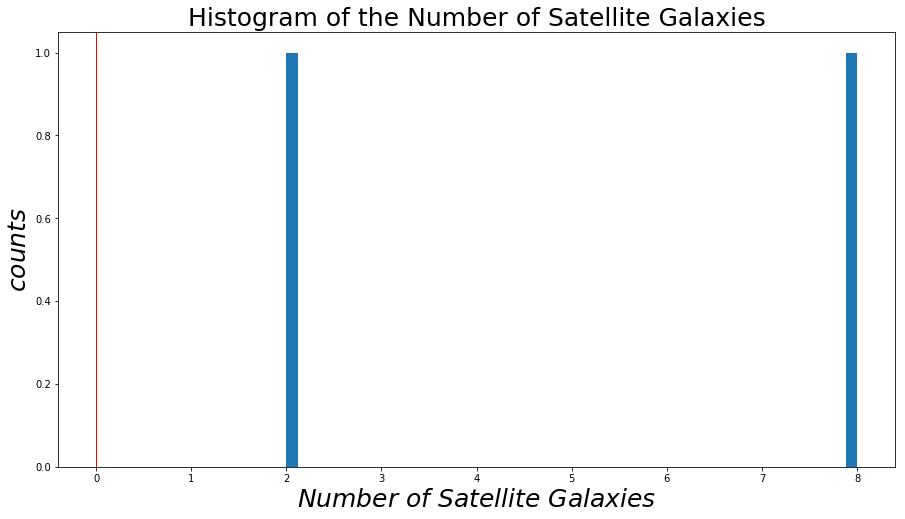

----
[[[7. 3.]
  [0. 0.]]

 [[0. 3.]
  [2. 0.]]]
mean number of satellites is 7.5
median number of satellites is 7.5
standard deviation of satellites is 2.5
standard error is 2.5


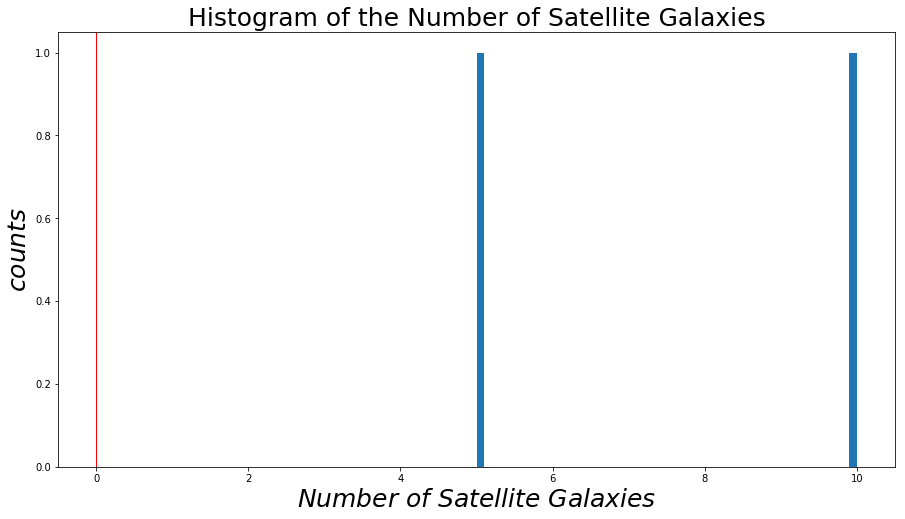

In [34]:
# testing algorithm

# using colors and zmag, place into null result

# create a list of indices that matches ra_BKG

index_array = np.arange(len(raBKG[0:10]))
print(len(index_array))
print(type(index_array))
# print(type(index_array[0]))

# randomly choose N number of indices (N being the number chosen by the number drawn from a gaussian distribution)

# import random

rand1 = np.random.choice(index_array, size=5)

print(rand1)
print('----')


arr, edges = np.histogramdd((rzcolorBKG[0:10], grcolorBKG[0:10], zmagBKG[0:10]), bins=(2,2,2), density=False)

rz_edges = edges[0]
gr_edges = edges[1]
zmag_edges = edges[2]

print(rz_edges)
print(gr_edges)
print(zmag_edges)

print('----')

gr_rand = grcolorBKG[rand1]
rz_rand = rzcolorBKG[rand1]
zmag_rand = zmagBKG[rand1]


print(rz_rand)
print(gr_rand)
print(zmag_rand)

print('----')

print(arr)
print(arr.shape)
totalNsat(arr)
plt.show()

print('----')

for i in range(len(rz_edges)-1):
    for j in range(len(gr_edges)-1):
        for k in range(len(zmag_edges)-1):
            for m in range(len(rz_rand)):
                if ((rz_rand[m] >= rz_edges[i]) & (rz_rand[m] <= rz_edges[i + 1]) & (gr_rand[m] >= gr_edges[j]) & (gr_rand[m] <= gr_edges[j + 1]) & (zmag_rand[m] >= zmag_edges[k]) & (zmag_rand[m] <= zmag_edges[k + 1])):
                    arr[i][j][k] = arr[i][j][k] + 1
                    
print(arr)

totalNsat(arr)
plt.show()

